### Business Objective

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

### Dataset

This dataset has 3 files as explained below:
1. 'application_data.csv' 
    --- contains all the information of the client at the time of application. The data is about whether aclient has payment difficulties.
2. 'previous_application.csv' 
    --- contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
3. 'columns_description.csv' 
    --- is a data dictionary which describes the meaning of the variables.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [2]:
#Reading dataset
path = r"Dataset/"

curr_df = pd.read_csv(path+"application_data.csv")
prev_df = pd.read_csv(path+"previous_application.csv")
desc_df = pd.read_csv(path+"columns_description.csv")

### Overview

In [3]:
curr_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0      100002       1         Cash loans           M            N  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0               Y             0          202500.0    406597.5      24700.5  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE   
0         351000.0   Unaccompanied          Working  \
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE   
0  Secondary / secondary special  Single / not married  House / apartment  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION   
0                    0.018801       -9461           -637            -3648.0  \
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE   
0            -2120          NaN           1               1                0  \
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS   
0                 1           1           0        Laborers              1.0  \
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY   
0                     2                            2  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START   
0                  WEDNESDAY                       10  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION   
0                           0                           0  \
1                           0                           0   
2                        

Target Variable = TARGET	

1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample

0 - all other cases

In [4]:
prev_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION   
0     2030495      271877     Consumer loans     1730.430          17145.0  \
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START   
0     17145.0               0.0          17145.0                   SATURDAY  \
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT   
0                       15                           Y  \
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY   
0                       1                0.0               0.182832  \
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS   
0                  0.867336                    XAP             Approved  \
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE   
0            -73  Cash through the bank                XAP              NaN  \
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE   
0         Repeater              Mobile            POS               XNA  \
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY   
0             Country-wide                35         Connectivity  \
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING   
0         12.0           middle  POS mobile with interest            365243.0  \
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [5]:
curr_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

There are 122 columns with 307511 records with quite a few columns having null values.

In [6]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

There are 122 columns with 1670214 records with quite a few columns having null values.

In [7]:
def get_desc(row):
    return desc_df.loc[desc_df['Row'] == row, 'Description'].values

### Application Data EDA

#### Null value handling

In [8]:
null_percentage = curr_df[curr_df.columns[curr_df.isnull().any()]].isnull().sum()/curr_df.shape[0]*100
null_percentage

AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50

Many columns have more than 40% missing values. Therefore, we will drop them to avoid potential bias from simple imputation methods like replication or mode. We chose a 40% threshold because replicating data with high missing values can introduce imbalance and bias. While most other columns have missing value percentages above 40%, "Occupation_Type" sits at 31%. We will temporarily leave "Occupation_Type" for further analysis.

In [9]:
curr_df.drop(list(null_percentage[null_percentage>40].index),axis=1,inplace=True)
curr_df.isnull().sum()/len(curr_df)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [10]:
numerical_features = curr_df.select_dtypes(include=[np.number]).columns
categorical_features = curr_df.select_dtypes(exclude=[np.number]).columns
print(numerical_features)
print(categorical_features)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [11]:
def kde_plot(df,feature_lst):
    
    for feature in feature_lst:
        plt.figure()  # Create a new figure for each plot
        sns.kdeplot(data=df[feature], label=feature)
        plt.title(f"KDE Plot of {feature}")
        plt.xlabel(f"{feature} Value")
        plt.ylabel("Density")
        plt.show()

In [12]:
num_with_null_features = ['AMT_ANNUITY', 'AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
                          'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                          'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                          'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 
                          'AMT_REQ_CREDIT_BUREAU_YEAR']


#kde_plot(curr_df,num_with_null_features)

Creating a copy of dataframe to be used to compare before and after null handling to ensure no bias is introduced into the dataset

In [13]:
curr_df_copy = curr_df.copy(deep=True)

In [14]:
def f_fill(df,feature_lst):
    
    for i in feature_lst:
        df[i].fillna(method='ffill',inplace=True)

In [15]:
from sklearn.impute import KNNImputer

to_use_knn = ['AMT_ANNUITY', 'AMT_GOODS_PRICE','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE',
              'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
              'DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS']
                          
to_use_median = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 
                 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_3']
    
imputer = KNNImputer(n_neighbors=3)  # Set the number of neighbors (n_neighbors)
curr_df[to_use_knn] = imputer.fit_transform(curr_df[to_use_knn])

f_fill(curr_df,to_use_median)

In [16]:
# Iterate through features and DataFrames numerical
def compare_df(curr_df,curr_df_copy, feature_lst, num):

    df_name = ["Before Modification", "After Modification"]
    for i, feature in enumerate(feature_lst):
        # Create subplots for each feature
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

        for j, df in enumerate([curr_df_copy, curr_df]):
            data = df[feature]
            ax = axs[j]
            
            if num == True:
                sns.kdeplot(data=data, ax=ax, label=f"{feature}")
                ax.set_title(f"KDE Plot of {feature} - {df_name[j]}")
                ax.set_ylabel("Density")
            else:
                counts = data.value_counts()  # Count occurrences of each category
                sns.barplot(x=counts.index, y=counts.values, ax=ax, label=f"{feature}")
                ax.set_title(f"Count of {feature} - {df_name[j]}")
                ax.set_ylabel("Count")
                ax.tick_params(axis='x', rotation=90)
                
            ax.set_xlabel(feature)
            ax.legend()  # Add legend in each subplot

        plt.show()

In [17]:
#compare_df(curr_df,curr_df_copy, num_with_null_features, True)

We can see that using KNNimpute, and Forward fill, the shape of the data remains unchanged. Median fill was also explored at first; however, significant changes in the graph were noticed for "EXT_SOURCE_3" and "AMT_REQ_CREDIT_BUREAU_YEAR".

While KNNimpute is preferred for all features, it is computationally expensive for features with more missing values. Therefore, an alternative, faster, and effective forward fill was tested.

In [18]:
null_percentage = curr_df[curr_df.columns[curr_df.isnull().any()]].isnull().sum()/curr_df.shape[0]*100
null_percentage

NAME_TYPE_SUITE     0.420148
OCCUPATION_TYPE    31.345545
dtype: float64

#### Only categorical Null values left to be handled

In [19]:
feature_names = ["NAME_TYPE_SUITE", "OCCUPATION_TYPE"]

f_fill(curr_df,feature_names)

In [20]:
#compare_df(curr_df,curr_df_copy, feature_names,False)

The distribution has not changed after using forward fill for the categorical variable

In [21]:
curr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

All null values have been filled while maintaining a similar distirbution to the original dataset making the following analysis not prone to bias

### Univariate Analysis

In [22]:
def count_plot(df,feature_lst, rotate=False,desc_df=desc_df):

    for feature in feature_lst:
        plt.figure(figsize=(6,4))  # Create a new figure for each plot
        counts = df[feature].value_counts()  # Count occurrences of each category
        sns.barplot(x=counts.index, y=counts.values, label=f"{feature}")
        plt.title(f"Count Plot of {feature}")
        plt.xlabel(f"{feature} Value")
        plt.ylabel("Count")
        if rotate:
            plt.xticks(rotation=90)
            
        try:
            description = desc_df.loc[desc_df['Row'] == feature, 'Description'].values
            plt.figtext(0.5, 0.99, f"Description: {description[0]}", ha="center", fontsize=10)
        except IndexError:
            # Handle the case where the index is out of range (e.g., description not found)
            print("Description not found for the given feature.")

        plt.tight_layout
        plt.show()

In [23]:
curr_df.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN

First Lets start with the flag documents which indicate if a client provided mentioned document

In [24]:
flag = [
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
]

#count_plot(curr_df,flag)

From the above barplots, we can see that most documents are not submitted at all, therefore we will create a new variable total number of documents submitted.

But, we will also keep document 3,5,6,8 for now, as they seems to have more submissions.

In [25]:
curr_df['NUM_DOCS_SUBMITTED'] = curr_df['FLAG_DOCUMENT_2'] + curr_df['FLAG_DOCUMENT_3'] + curr_df['FLAG_DOCUMENT_4'] + curr_df['FLAG_DOCUMENT_5'] + curr_df['FLAG_DOCUMENT_6'] + curr_df['FLAG_DOCUMENT_7'] + curr_df['FLAG_DOCUMENT_8'] + curr_df['FLAG_DOCUMENT_9'] + curr_df['FLAG_DOCUMENT_10'] + curr_df['FLAG_DOCUMENT_11'] + curr_df['FLAG_DOCUMENT_12'] + curr_df['FLAG_DOCUMENT_13'] + curr_df['FLAG_DOCUMENT_14'] + curr_df['FLAG_DOCUMENT_15'] + curr_df['FLAG_DOCUMENT_16'] + curr_df['FLAG_DOCUMENT_17'] + curr_df['FLAG_DOCUMENT_18'] + curr_df['FLAG_DOCUMENT_19'] + curr_df['FLAG_DOCUMENT_20'] + curr_df['FLAG_DOCUMENT_21']

columns_to_drop = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9',
                   'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                   'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
                   'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
                   'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

curr_df = curr_df.drop(columns=columns_to_drop)


curr_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0      100002       1         Cash loans           M            N  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0               Y             0          202500.0    406597.5      24700.5  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE   
0         351000.0   Unaccompanied          Working  \
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE   
0  Secondary / secondary special  Single / not married  House / apartment  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION   
0                    0.018801       -9461           -637            -3648.0  \
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE   
0            -2120           1               1                0  \
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS   
0                 1           1           0        Laborers              1.0  \
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY   
0                     2                            2  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START   
0                  WEDNESDAY                       10  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION   
0                           0                           0  \
1                           0                           0   
2                           0                           0   
3                           0             

Now lets see the remaining flag based features

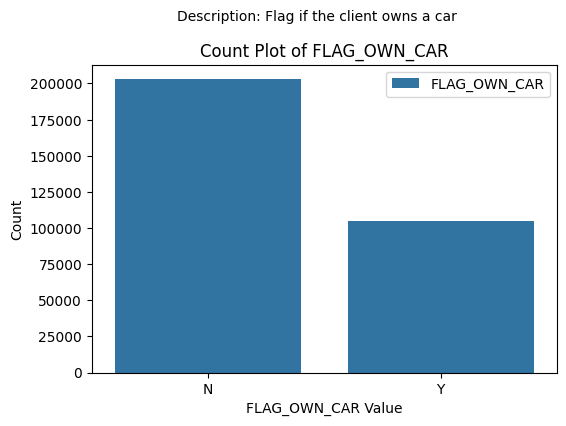

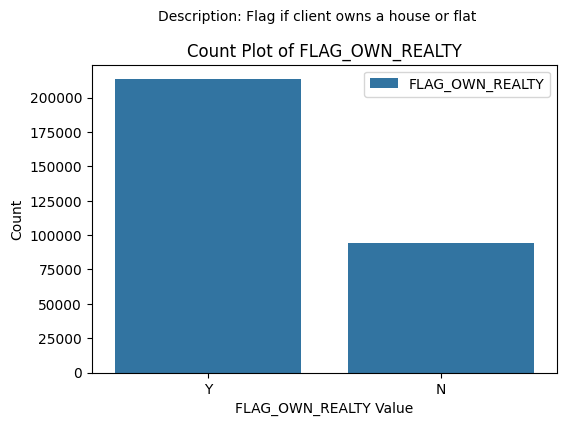

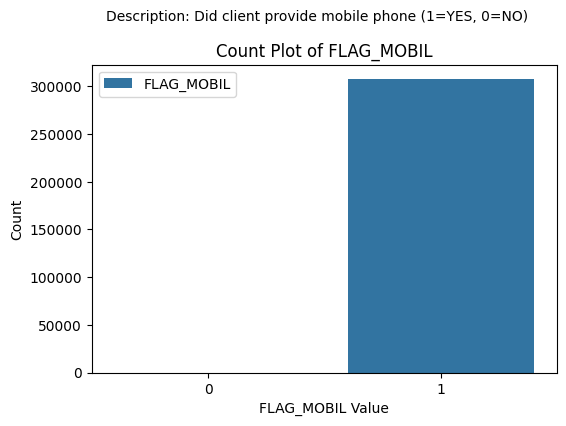

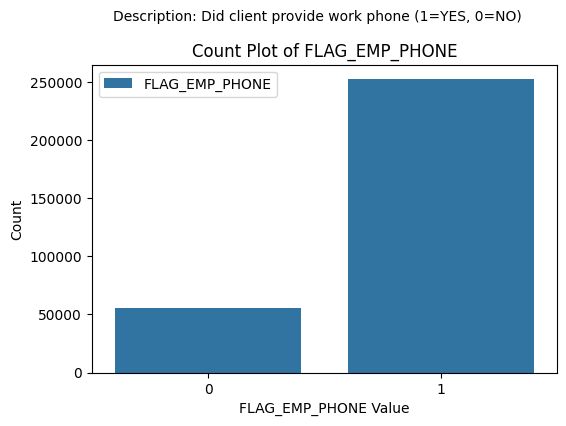

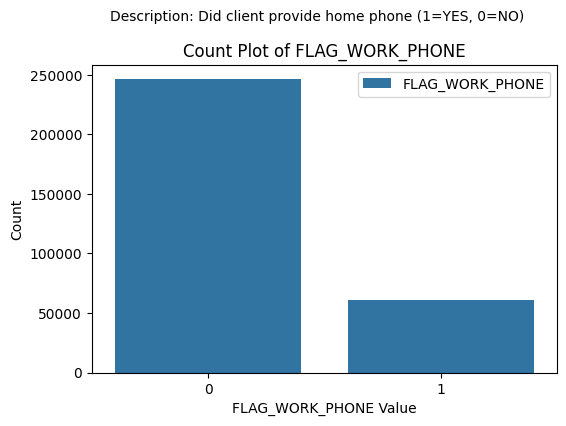

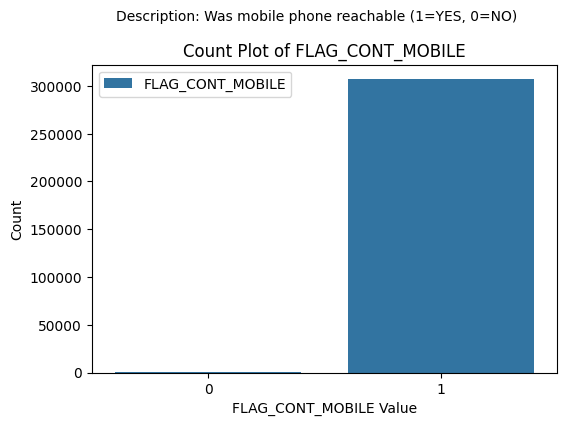

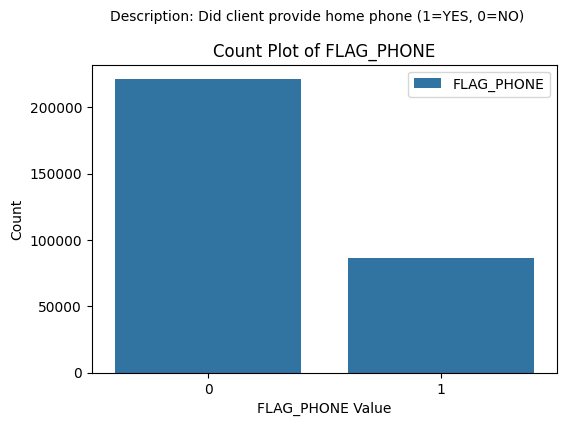

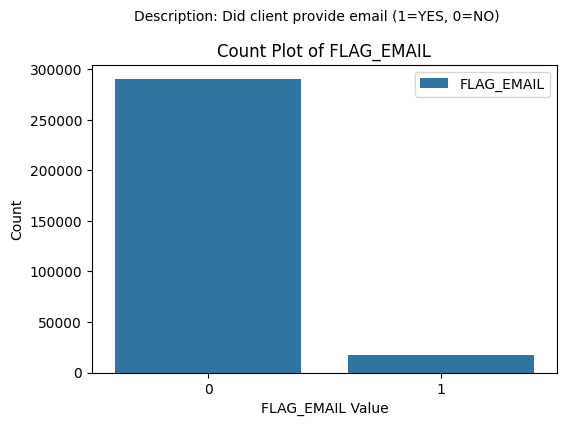

In [26]:
column_names = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
                'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']

count_plot(curr_df,column_names)

From the above plots, we can see that 'FLAG_CONT_MOBILE' & 'FLAG_MOBIL' have minor to no values in 0, therefore they will not be able to provide a good comparison later on and will be dropped now.

In [27]:
columns_to_drop = ['FLAG_MOBIL','FLAG_CONT_MOBILE']

curr_df = curr_df.drop(columns=columns_to_drop)


Next lets check columns starting with "NAME_"

In [28]:
column_names = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
#count_plot(curr_df,column_names,True)

From the above, we can see that all the "NAME" based columns seem to have values and could be meaningful later on.

It is worth noting that:

    -NAME_TYPE_SUITE has categories "Other_A" and "Other_B," whose referents are unclear.
    -NAME_FAMILY_STATUS has an "Unknown" category.
    

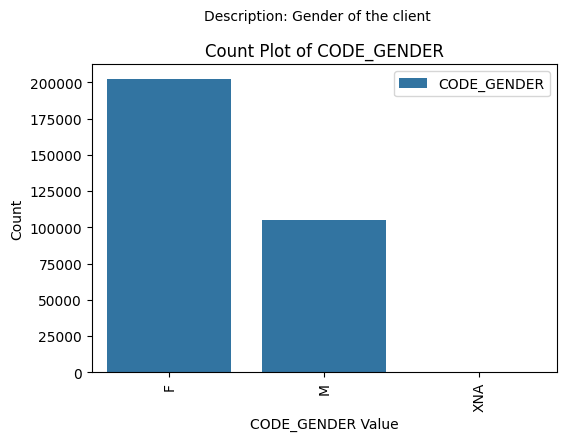

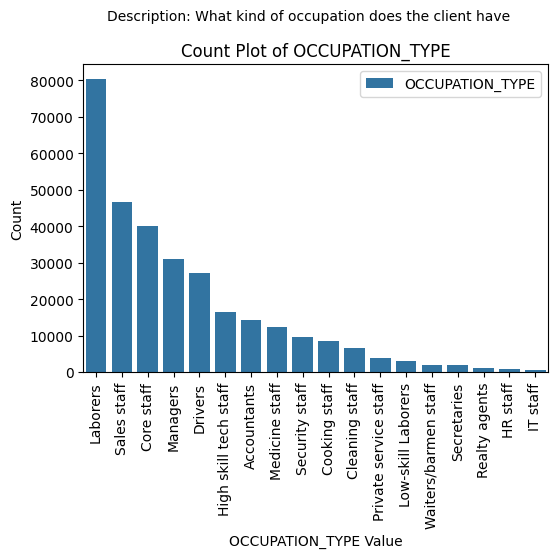

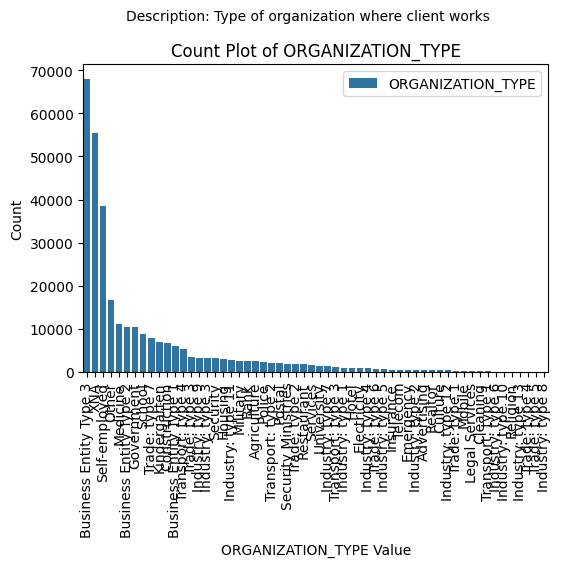

In [29]:
column_names = [ 'CODE_GENDER', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
count_plot(curr_df,column_names,True)

From the above columns, we can see that

    -CODE_GENDER has type "XNA" and having more female applicants in total
    -OCCUPATION_TYPE shows that a significant number of applicants are "Labourers'
    -ORGANIZATION_TYPE has "XNA" which will need to be treated.
    

In [30]:
print(curr_df.CODE_GENDER.value_counts())
print()
print(curr_df.ORGANIZATION_TYPE.value_counts())

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Servi

We can see that 

    - CODE_GENDER only has 4 XNA values, which we can convert to the domninant value "Female"
    - ORGANIZATION_TYPE has 55k XNA values, this will be converted to Unknown.
    

In [31]:
curr_df["CODE_GENDER"] = curr_df['CODE_GENDER'].replace('XNA', 'F')
curr_df["ORGANIZATION_TYPE"] = curr_df['ORGANIZATION_TYPE'].replace('XNA', 'Unknown')

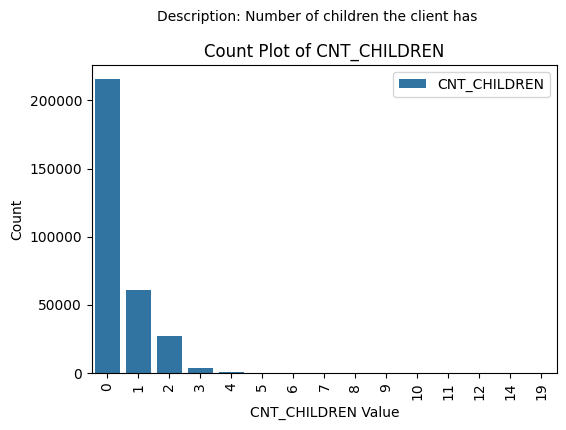

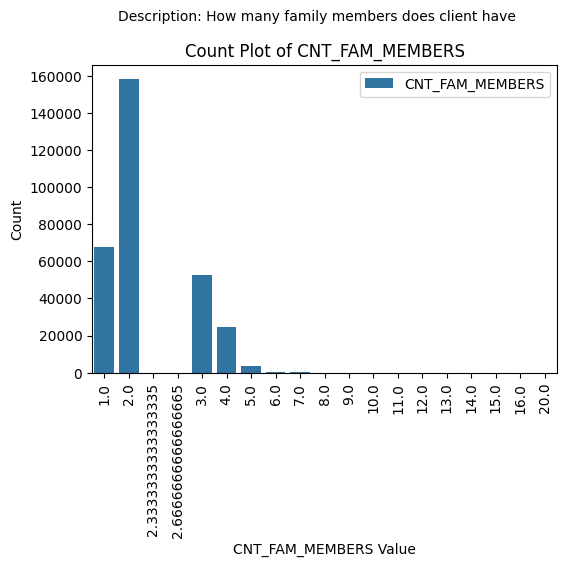

In [32]:
column_names = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']
count_plot(curr_df,column_names,True)

From the above columns, we can see that

    -CNT_CHILDREN has high 0 value indicating many applicants do not have kids.
    -CNT_FAM_MEMBERS has "2.333" and "2.665" values which can be dropped and also this column should be integer type and not float type

CNT_CHILDREN will be grouped into applicant with kids, and without kids
CNT_FAM_MEMBERS will be grouped into 0,1,2,3,4,and more than equal 5
    

In [33]:
def group_values(num, threshold=4):
    if num <= threshold:
        return str(num)
    else:
        return f"more than {threshold}"

In [34]:
curr_df['CNT_CHILDREN'] = curr_df['CNT_CHILDREN'].apply(lambda x: 'Yes' if x > 0 else 'No')

curr_df['CNT_FAM_MEMBERS'] = curr_df['CNT_FAM_MEMBERS'].apply(lambda x : group_values(x,4))

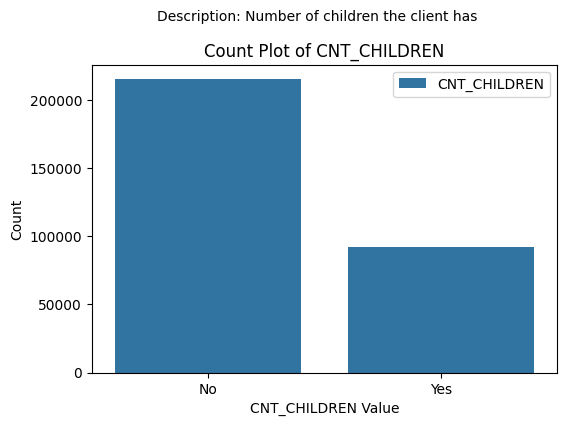

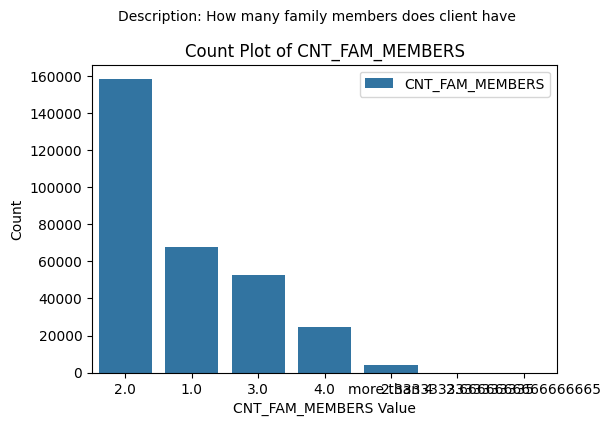

In [35]:
column_names = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']
count_plot(curr_df,column_names)

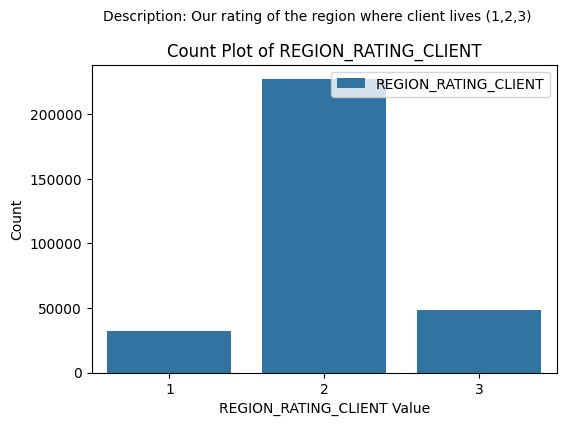

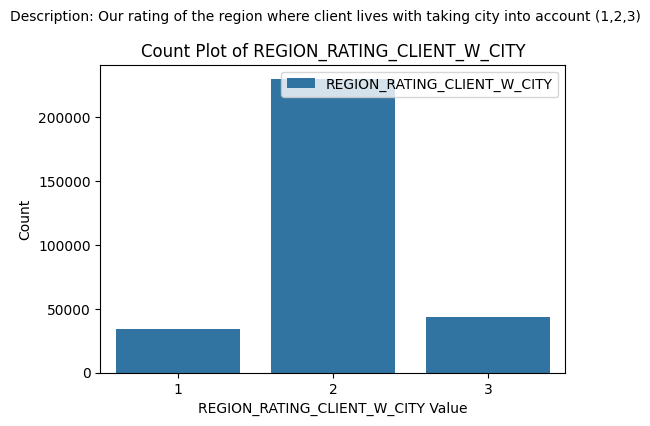

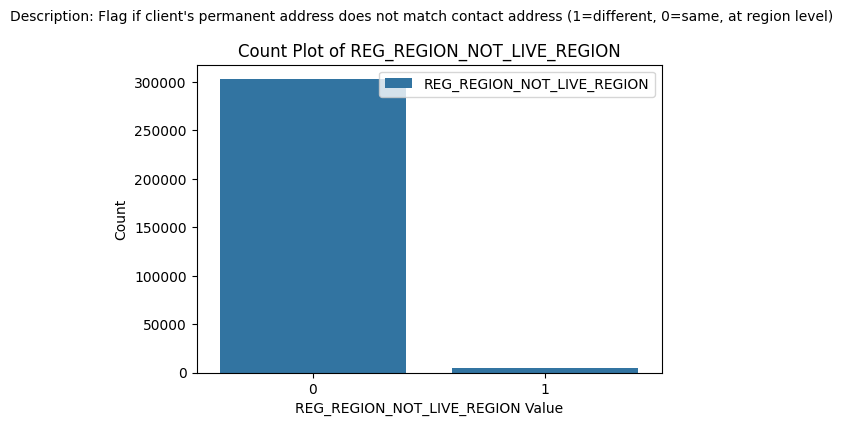

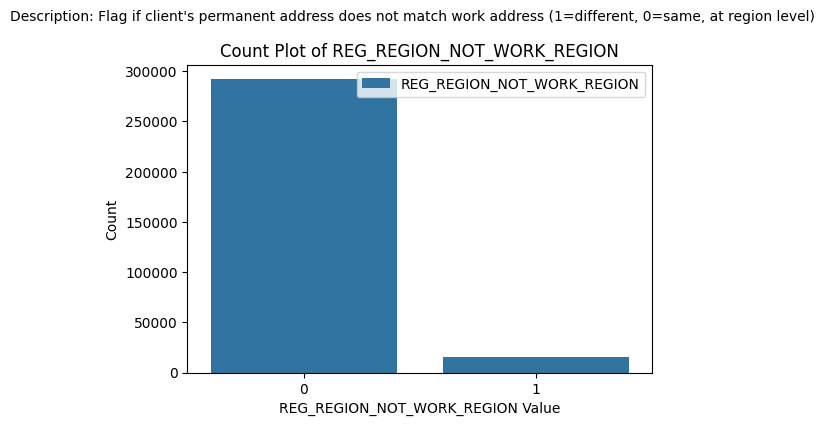

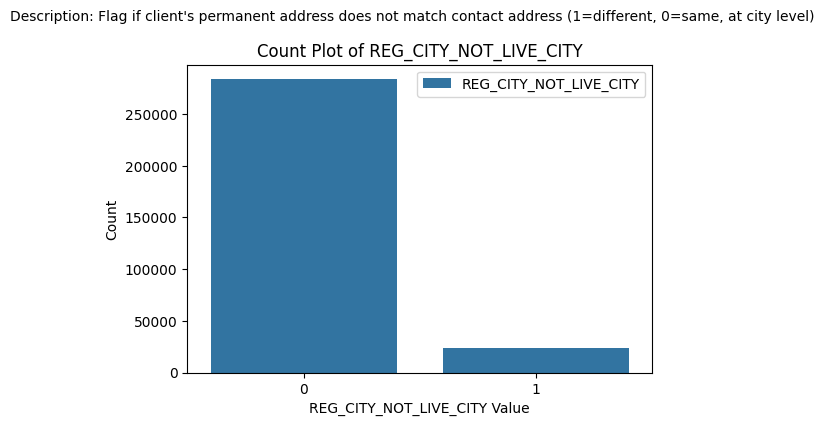

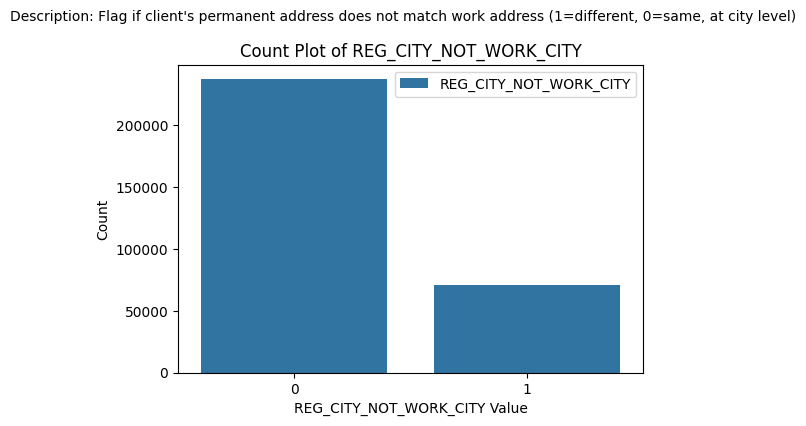

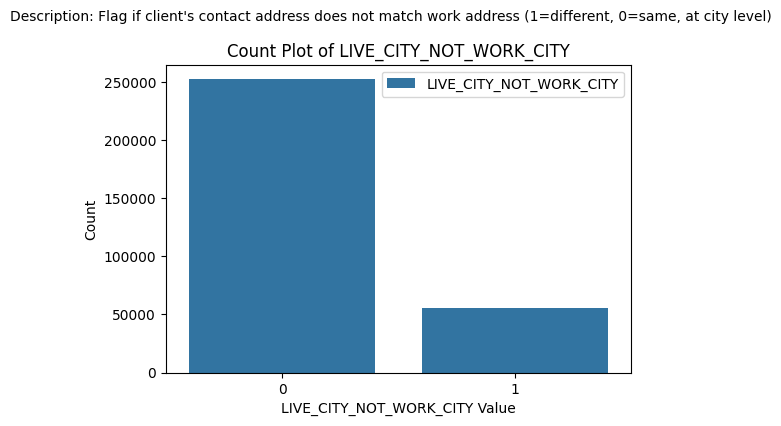

In [36]:
column_names = ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
                'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
                'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
count_plot(curr_df,column_names)

From the above columns, we can see that

    -We will be dropping the region level matchings as they seems to provided less detail than the city level matchings
    

In [37]:
columns_to_drop = ['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT']

curr_df = curr_df.drop(columns=columns_to_drop)

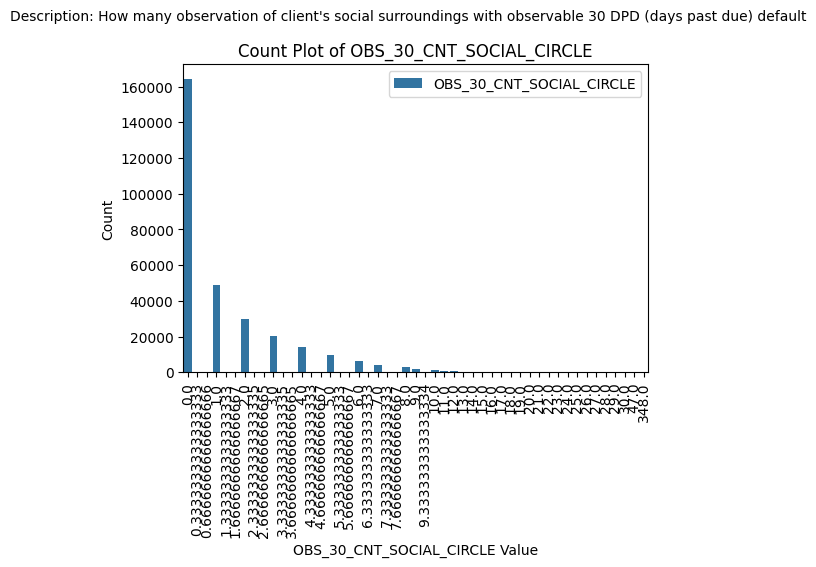

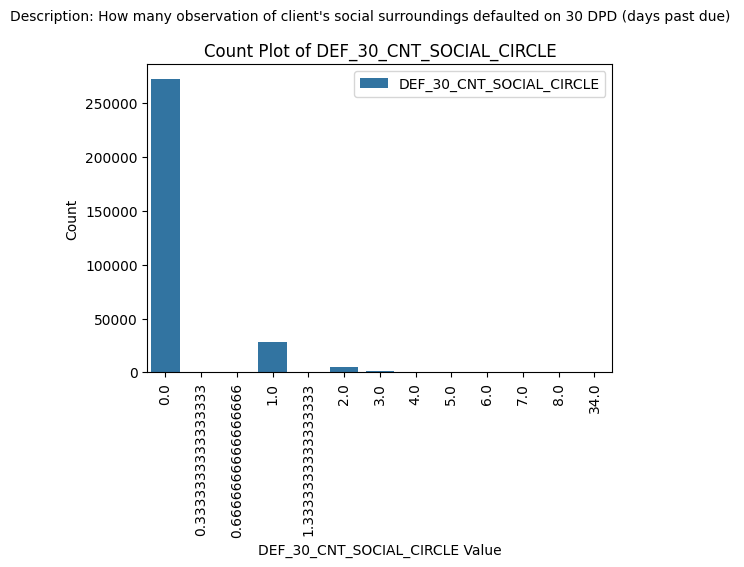

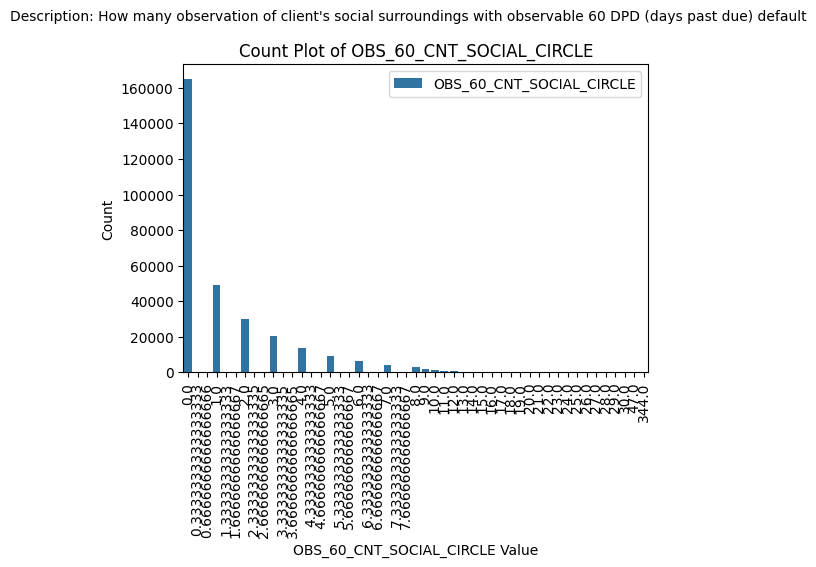

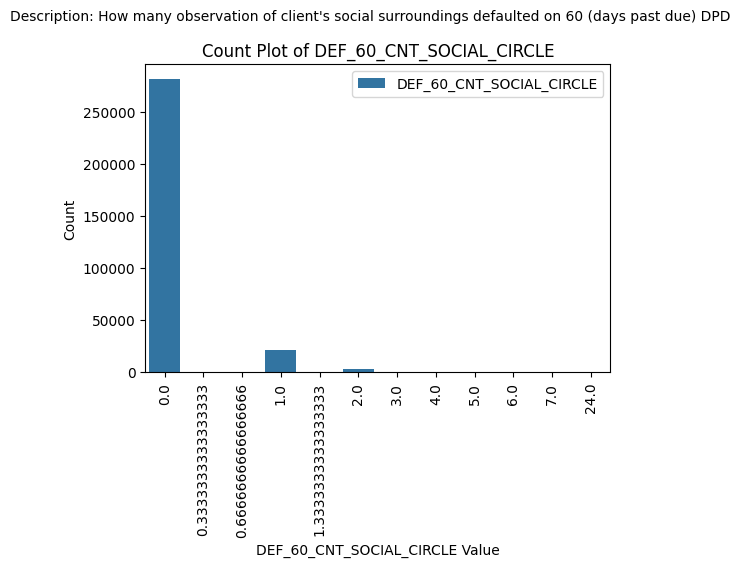

In [38]:
column_names = [ 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
count_plot(curr_df,column_names,True)

The above columns seems to provide no valubale data especially the "DEF_30_CNT_SOCIAL_CIRCLE" and "DEF_60_CNT_SOCIAL_CIRCLE". These 2 will be dropped while the other 2 columns will be grouped into 2 categories, "0" and "more than 0"

In [39]:
columns_to_drop = ['DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']

curr_df = curr_df.drop(columns=columns_to_drop)

curr_df['OBS_30_CNT_SOCIAL_CIRCLE'] = curr_df['OBS_30_CNT_SOCIAL_CIRCLE'].apply(lambda x: 'Yes' if x > 0 else 'No')
curr_df['OBS_60_CNT_SOCIAL_CIRCLE'] = curr_df['OBS_60_CNT_SOCIAL_CIRCLE'].apply(lambda x: 'Yes' if x > 0 else 'No')

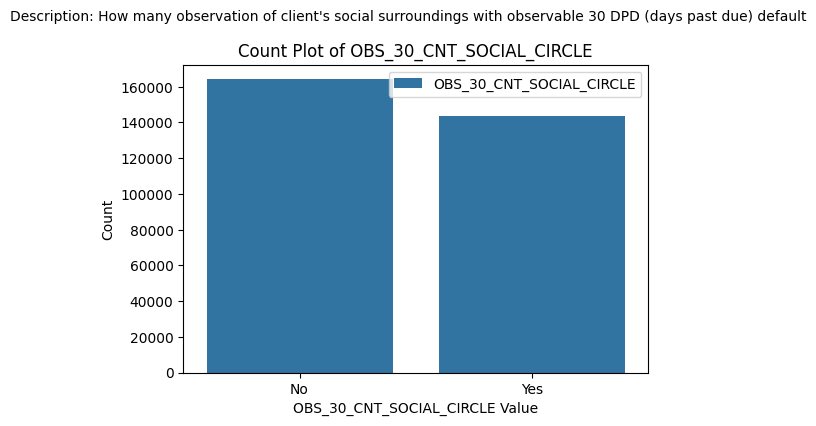

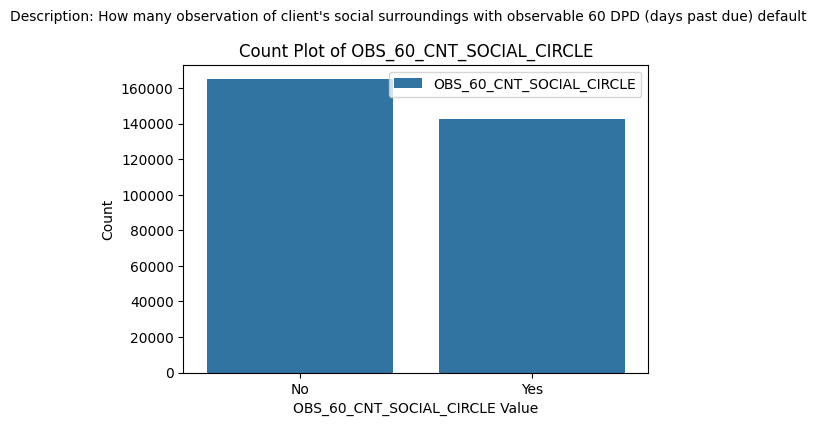

In [40]:
column_names = [ 'OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']
count_plot(curr_df,column_names)

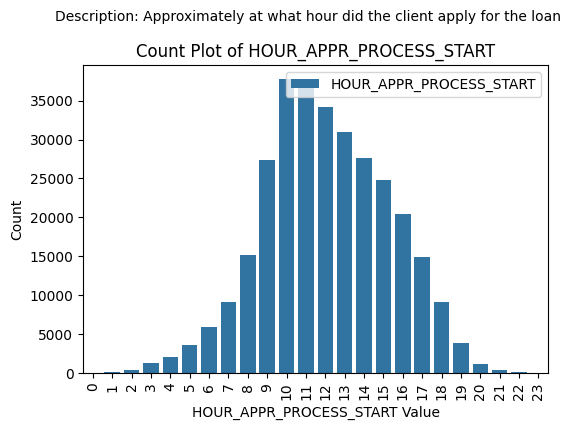

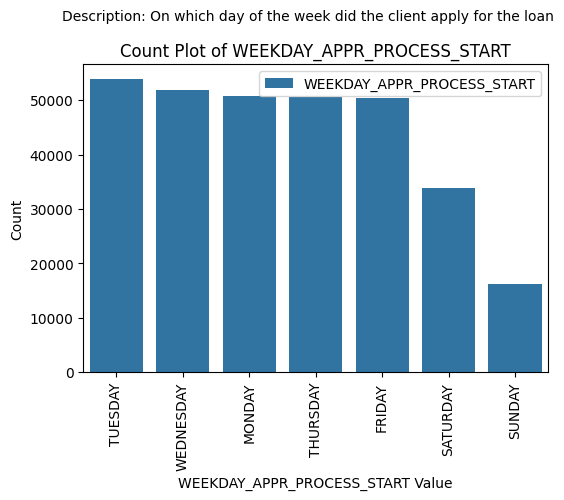

In [41]:
column_names = [ 'HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START']
count_plot(curr_df,column_names,True)

From the above columns, we can see that
    
    -HOUR_APPR_PROCESS_START shows most application being submmited from 10am to 12pm in the day andslight more towards afternoon as compared to morning
    -WEEKDAY_APPR_PROCESS_START shows more applications on weekdays as compared to weekends


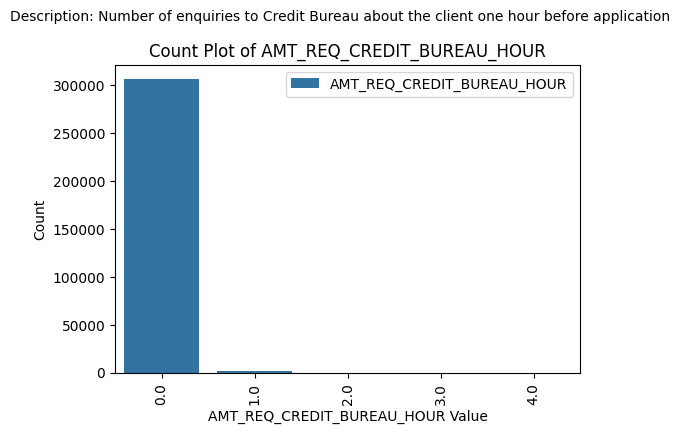

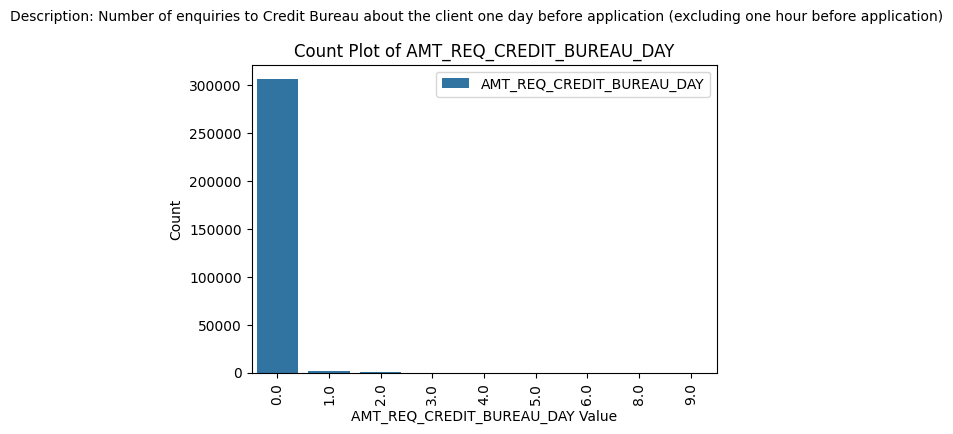

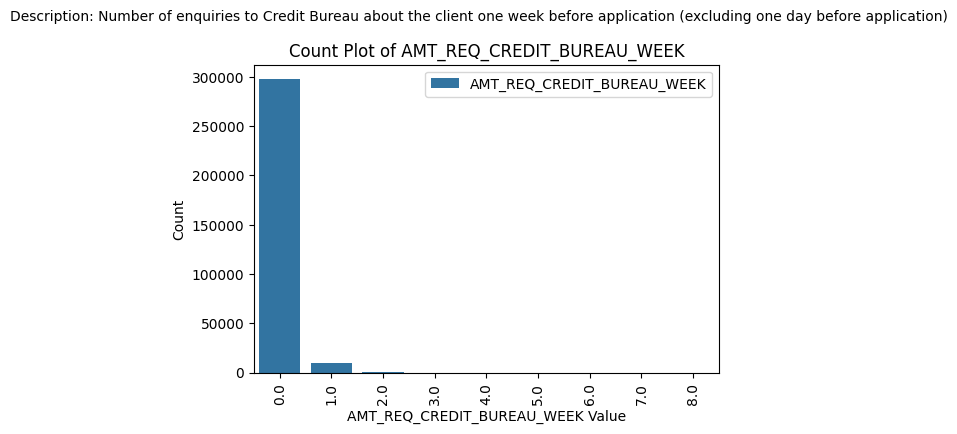

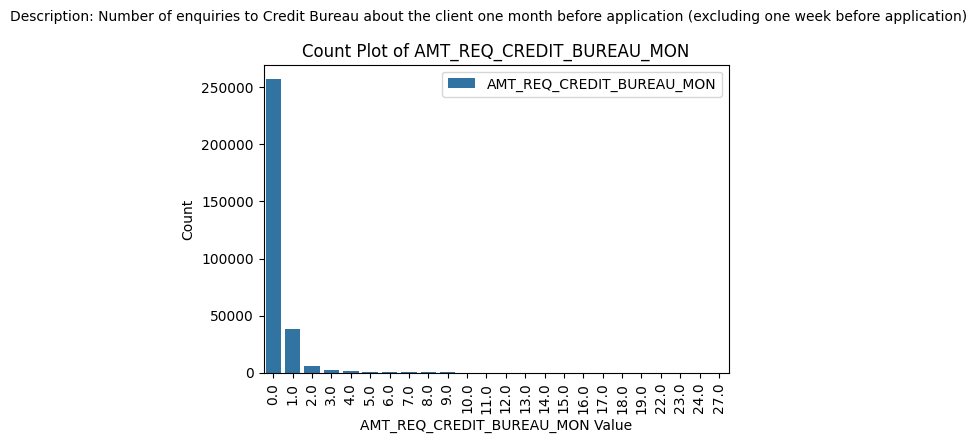

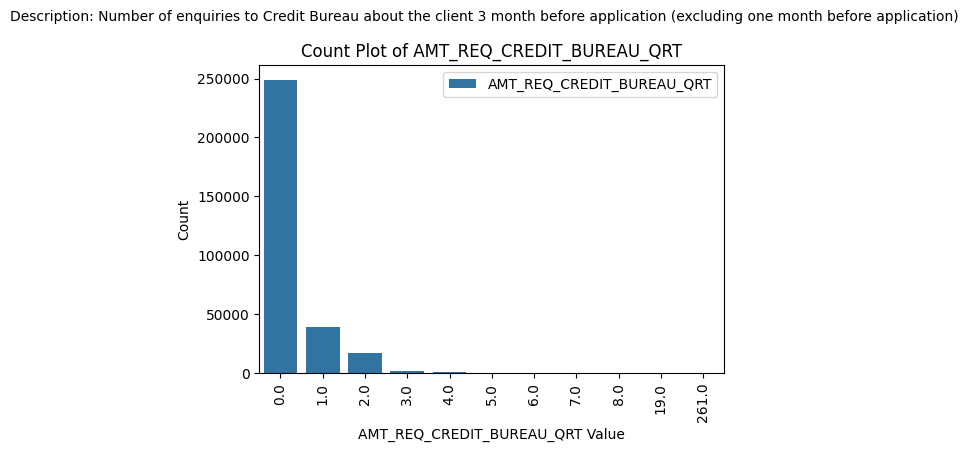

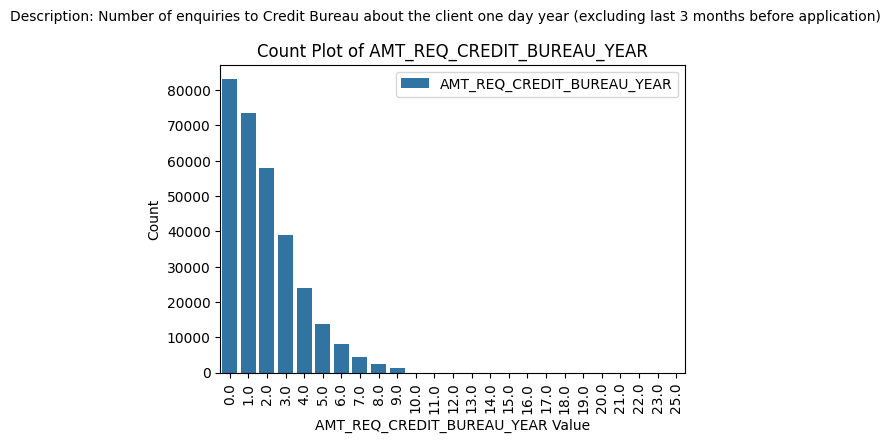

In [42]:
column_names = [ 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'
]
count_plot(curr_df,column_names,True)

The values above are grouped to reduce number of categories as values after a threshold are minor and 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK' are dropped.

In [43]:
columns_to_drop = [ 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK']
curr_df = curr_df.drop(columns=columns_to_drop)

In [44]:
curr_df['AMT_REQ_CREDIT_BUREAU_MON'] = curr_df['AMT_REQ_CREDIT_BUREAU_MON'].apply(lambda x: group_values(x, threshold=3))
curr_df['AMT_REQ_CREDIT_BUREAU_QRT'] = curr_df['AMT_REQ_CREDIT_BUREAU_QRT'].apply(lambda x: group_values(x, threshold=4))
curr_df['AMT_REQ_CREDIT_BUREAU_YEAR'] = curr_df['AMT_REQ_CREDIT_BUREAU_YEAR'].apply(lambda x: group_values(x, threshold=10))

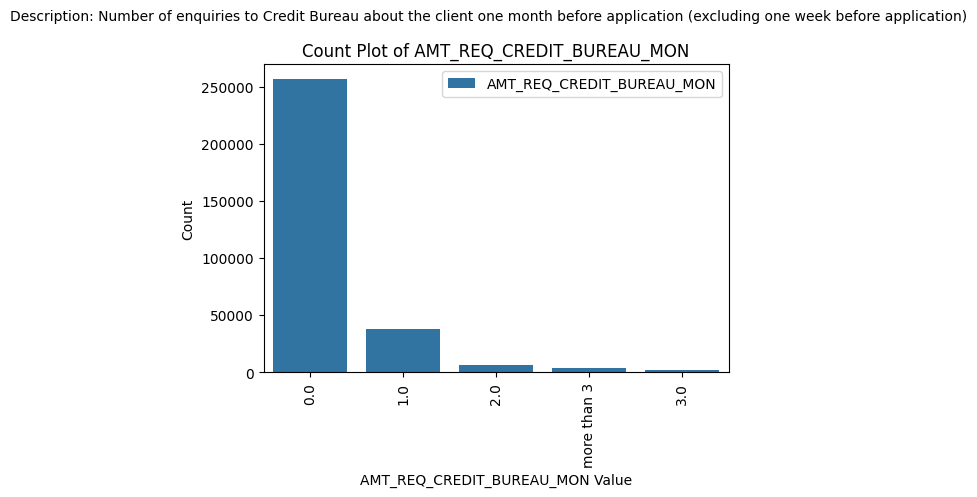

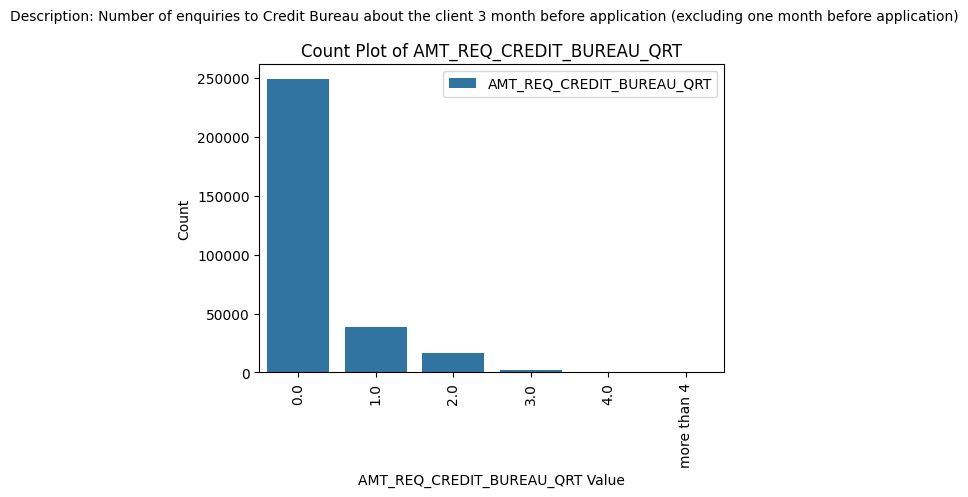

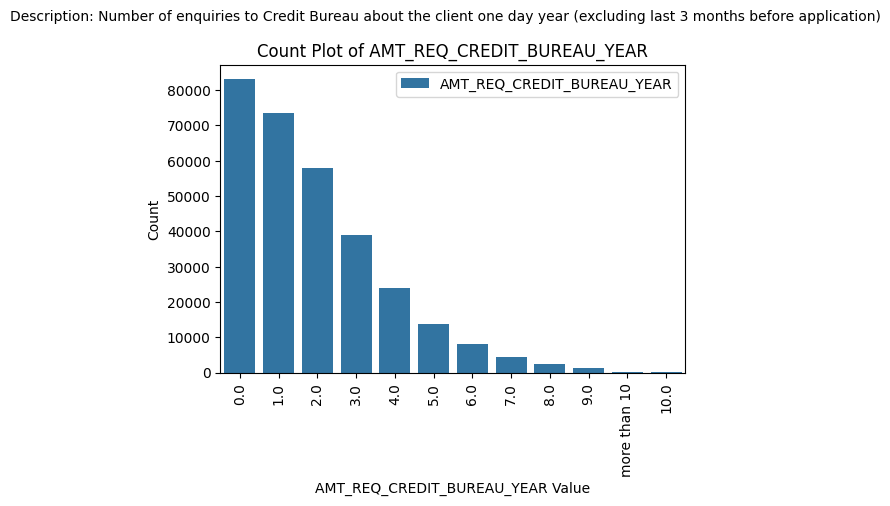

In [45]:
column_names = [ 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
count_plot(curr_df,column_names,True)

#### Creating bins for continous AMT_INCOME_TOTAL, AMT_CREDIT and AMT_GOODS_PRICE

In [46]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

curr_df['AMT_INCOME_RANGE']=pd.cut(curr_df['AMT_INCOME_TOTAL'],bins,labels=slot)


Description not found for the given feature.


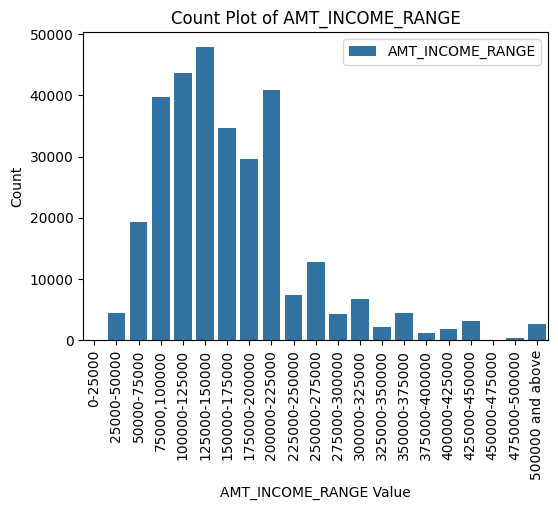

In [47]:
column_names = ['AMT_INCOME_RANGE']
count_plot(curr_df,column_names,True)

In [48]:

bins = [0, 150000, 300000, 450000, 600000, 750000, 900000, 1050000, 1200000, 1350000, 1500000, 1650000, 1800000, 1950000, 2000000,10000000]
slots = ['0-150k', '150k-300k', '300k-450k', '450k-600k', '600k-750k', '750k-900k', '900k-1050k', '1050k-1200k', '1200k-1350k', 
         '1350k-1500k', '1500k-1650k', '1650k-1800k', '1800k-1950k', '1950k-2M', '2M and above']

curr_df['AMT_CREDIT_RANGE'] = pd.cut(curr_df['AMT_CREDIT'], bins=bins, labels=slots)


Description not found for the given feature.


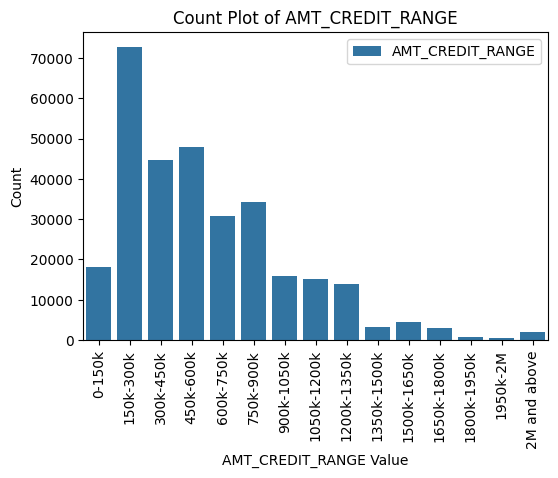

In [49]:
column_names = ['AMT_CREDIT_RANGE']
count_plot(curr_df,column_names,True)

In [50]:
curr_df['AMT_GOODS_PRICE_RANGE'] = pd.cut(curr_df['AMT_GOODS_PRICE'], bins=bins, labels=slots)

Description not found for the given feature.


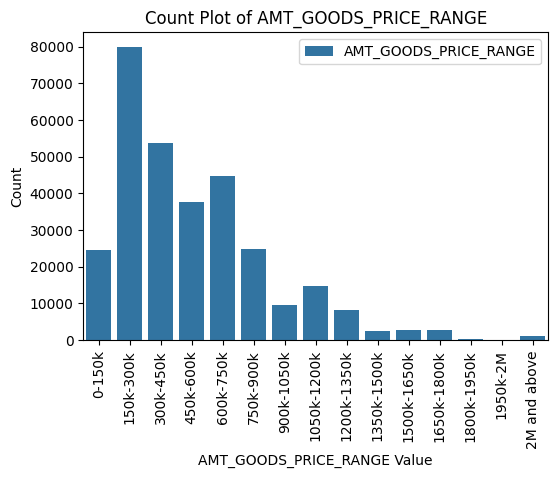

In [51]:
column_names = ['AMT_GOODS_PRICE_RANGE']
count_plot(curr_df,column_names,True)

#### Handling "DAYS_" columns

In [52]:
days_column = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]
curr_df[days_column].describe()


DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH   
count  307511.000000  307511.000000      307511.000000    307511.000000  \
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307511.000000  
mean              -962.857396  
std                826.807503  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

In [53]:
curr_df[days_column]= abs(curr_df[days_column])
curr_df[days_column].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH   
count  307511.000000  307511.000000      307511.000000    307511.000000  \
mean    16036.995067   67724.742149        4986.120328      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307511.000000  
mean               962.857396  
std                826.807503  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

Below we group age and number of years employed into categories

In [54]:
temp =  np.floor(curr_df["DAYS_BIRTH"]/365)
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

curr_df["AGE_GROUP"] =pd.cut(temp, bins=bins, labels=slots)

In [55]:
curr_df["YEARS_EMPLOYED"] = curr_df["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,np.inf]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

curr_df["EMPLOYEMENT_YEARS"] = pd.cut(curr_df["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [56]:
curr_df["EMPLOYEMENT_YEARS"].value_counts(normalize=True)*100

EMPLOYEMENT_YEARS
0-5         44.326833
5-10        21.095968
30 Above    18.984485
10-15        8.958762
15-20        3.528027
20-25        2.030184
25-30        1.075741
Name: proportion, dtype: float64

### Bivariate Analysis

In [57]:
def bivariate(df, feature, target='TARGET', rotate=False):
    
    plt.figure(figsize=(20, 6))
    ax = sns.countplot(x=feature, hue=target, data=df)
    plt.title(f'Bivariate Countplot of {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title=target)
    
    rotation = 0
    if rotate:
            rotation = 90
    for p in ax.patches:
        if p.get_height() > 0:
            total = float(len(df))
            total_category = df[df[feature] == p.get_x()].shape[0]
            if total_category > 0:
                    height = p.get_height() / total_category
            else:
                height = 0
            height = p.get_height() / total
            
            va= 'center'
            if rotate:
                va='bottom'
            ax.annotate(f'{int(p.get_height())}, {100 * height:.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va=va, fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points',rotation=rotation)
    plt.xticks(rotation=rotation)    
    plt.show()
    
    plt.figure(figsize=(10, 6))   
    ax = sns.histplot(x=feature, hue=target, data=df,stat='percent', multiple='fill', legend='auto',discrete=True)
    ylim = ax.get_ylim()
    plt.title(f'Bivariate Countplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    for patch in ax.patches:
        height = patch.get_height() if patch.get_height()<ylim[1]-0.2 else ylim[1]-0.1
        ax.annotate(f'{ patch.get_height()*100:.2f}%', xy=(patch.get_x() + patch.get_width() / 2, height),
                    xytext=(0, 2), textcoords='offset points',
                    ha='center', va='bottom', fontsize=9,rotation=rotation)
    plt.xticks(rotation=rotation)
    plt.show()

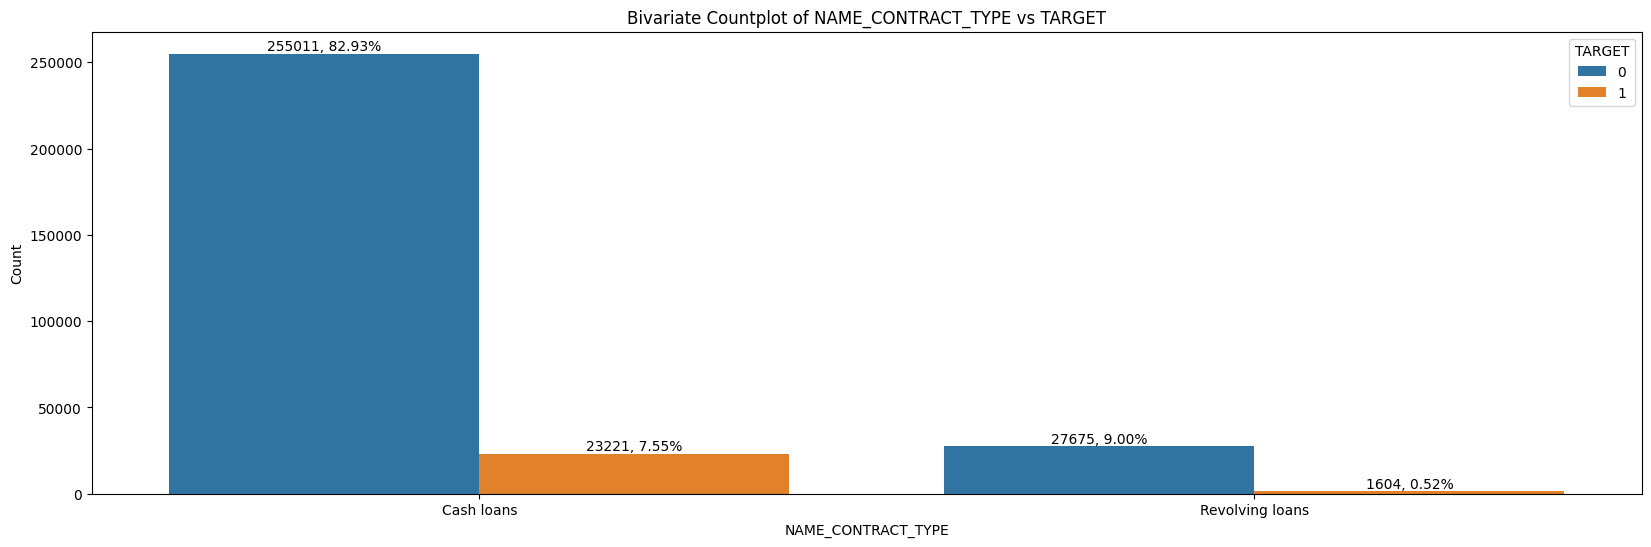

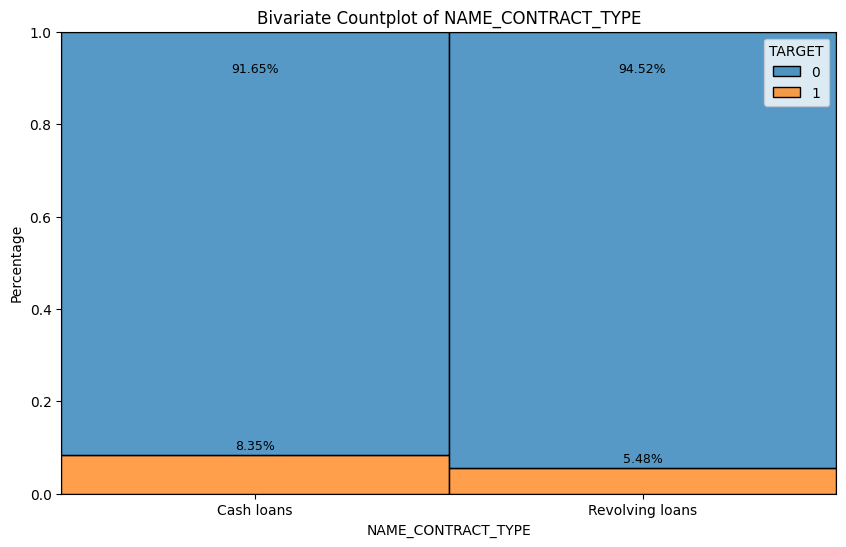

In [58]:
bivariate(curr_df, 'NAME_CONTRACT_TYPE')

From the above 2 plots for NAME_CONTRACT_TYPE, 

    - ~90% are cash loans while only 9.5% are revolving loans
    - Cash loans have a higher defaulting percentage compared to revolving loans

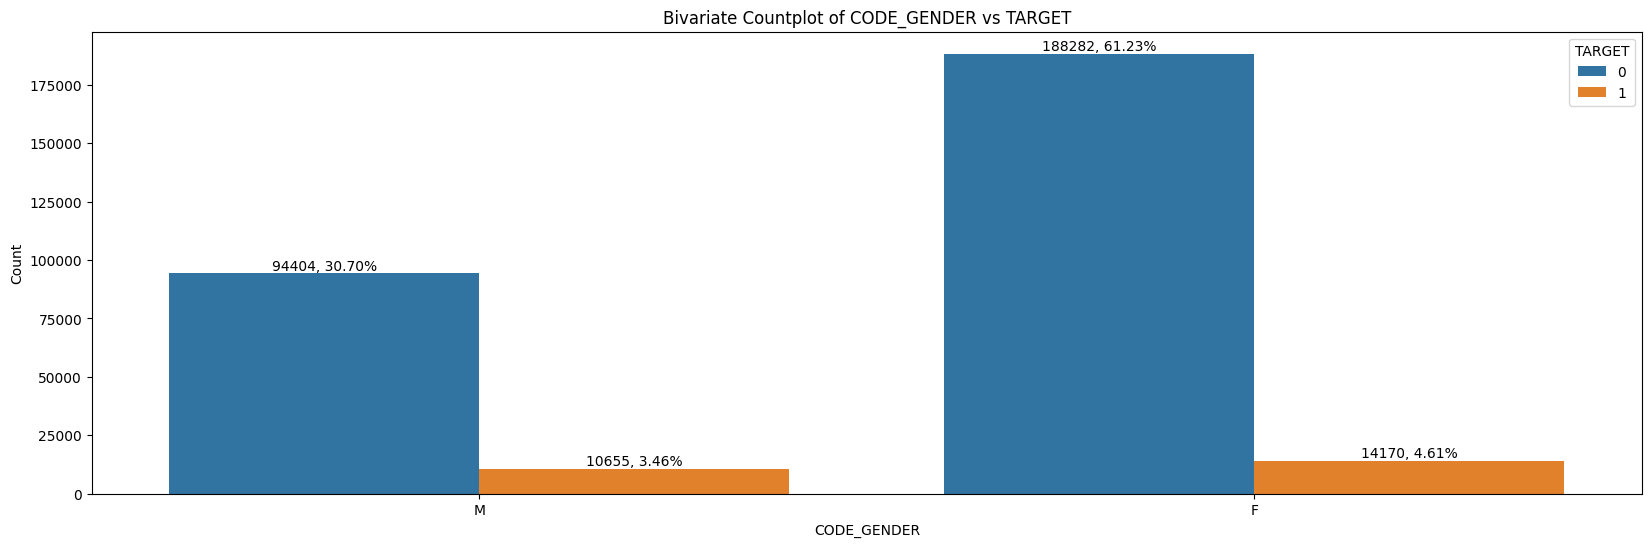

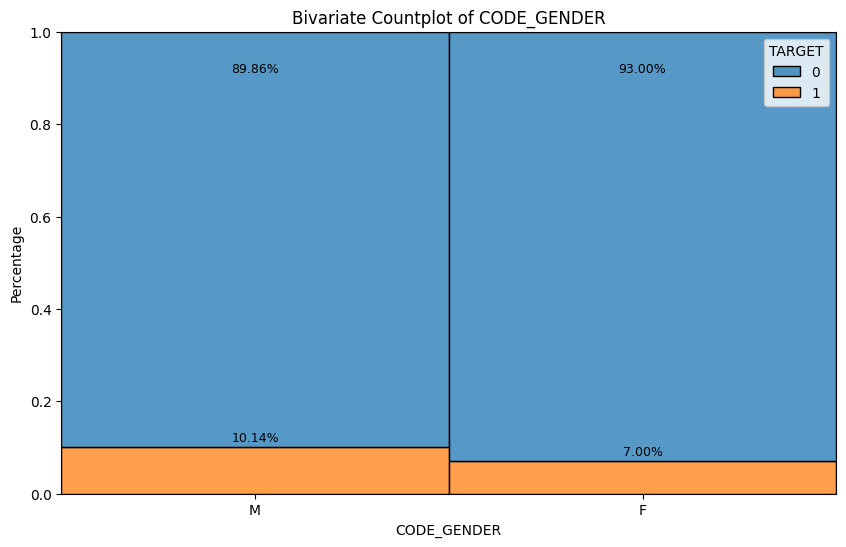

In [59]:
bivariate(curr_df, 'CODE_GENDER')

From the above 2 plots for CODE_GENDER, 
    
    - The applicant ratio is approx 67:33 female to male respectively.
    - Male applications are more like to default as compared to female applicants (10.14% Male as compared to 7% Female applicants)
    - Though in total, 4.61% defaulters are Female as compared to only 3.46% Male.
    

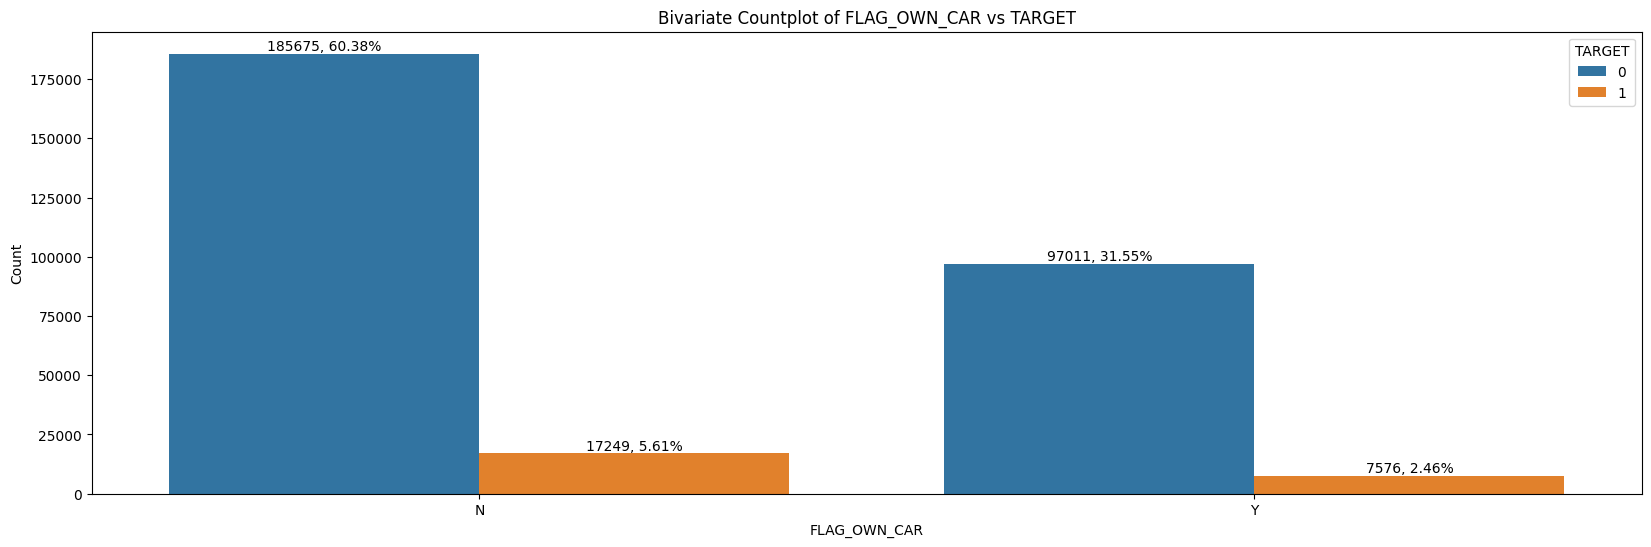

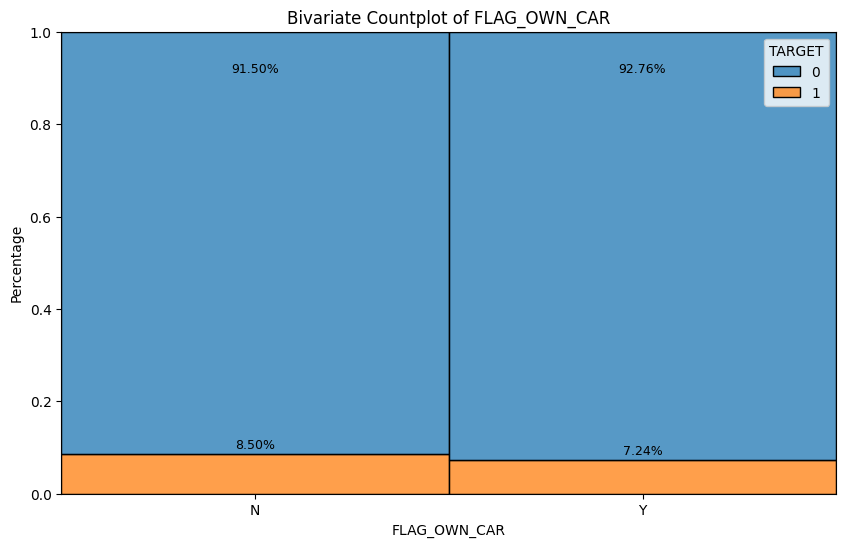

In [60]:
bivariate(curr_df, 'FLAG_OWN_CAR')

From the above 2 plots for FLAG_OWN_CAR, 
    
    - A large number of applicants do not have their own car.
    - Those who own a car have a slightly lower default rate.

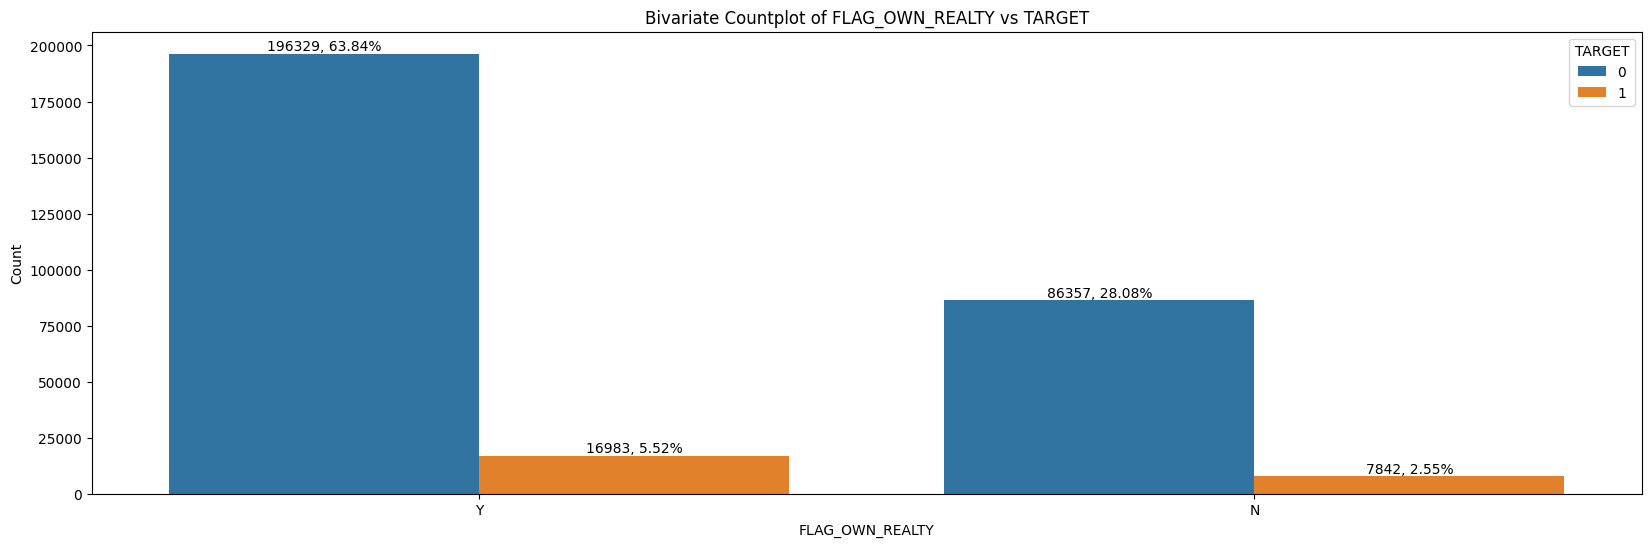

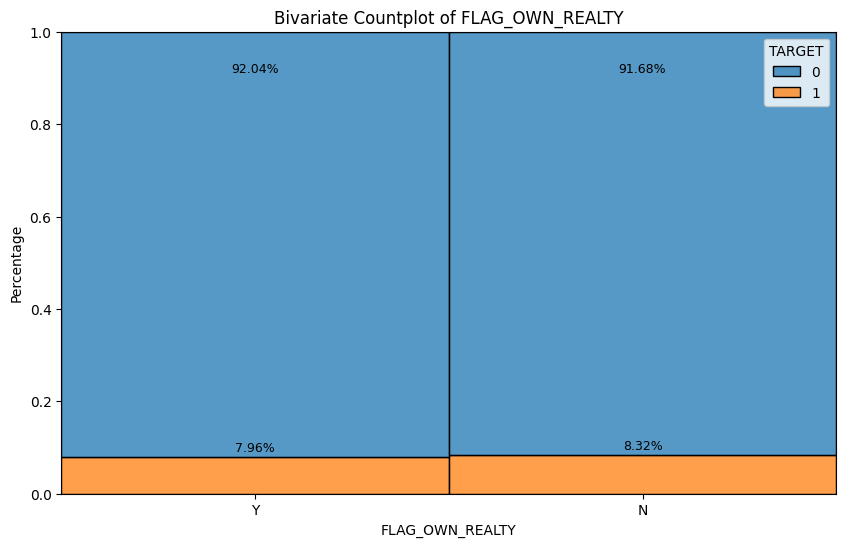

In [61]:
bivariate(curr_df, 'FLAG_OWN_REALTY')

From the above 2 plots for FLAG_OWN_REALTY, 
    
    - A large number of applicants have owns a house or flat.
    - A minor difference between defaul rate.

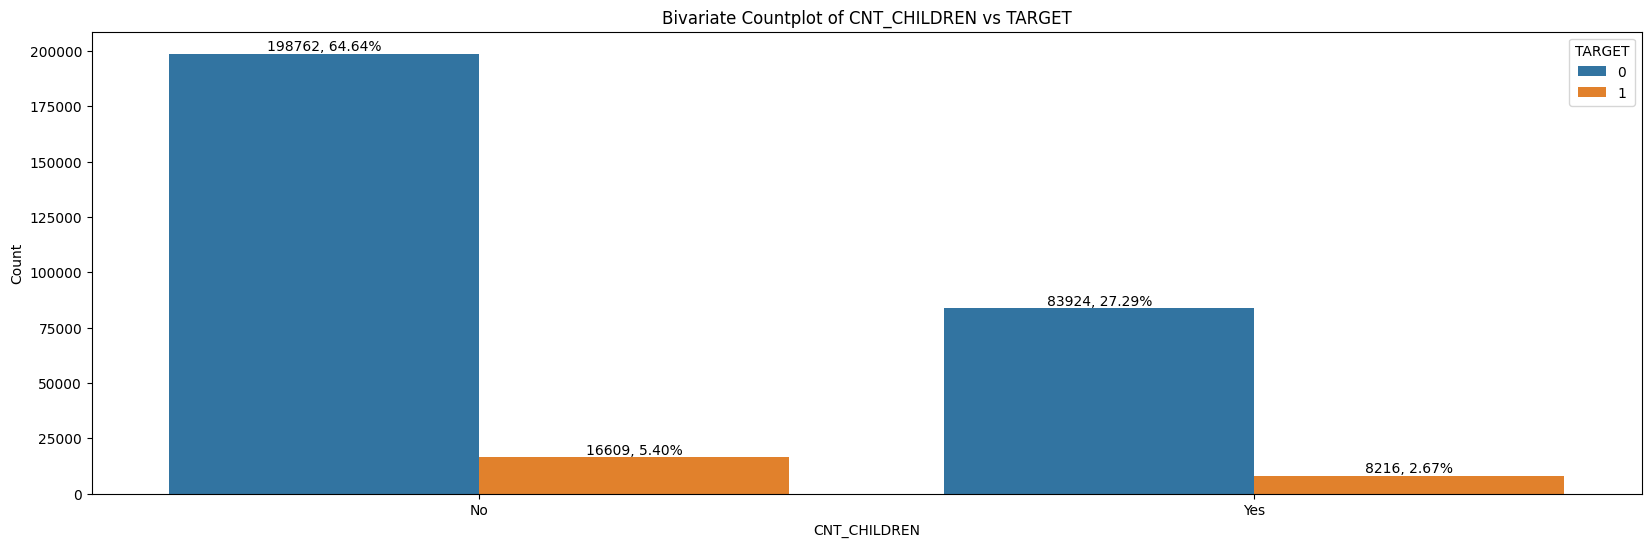

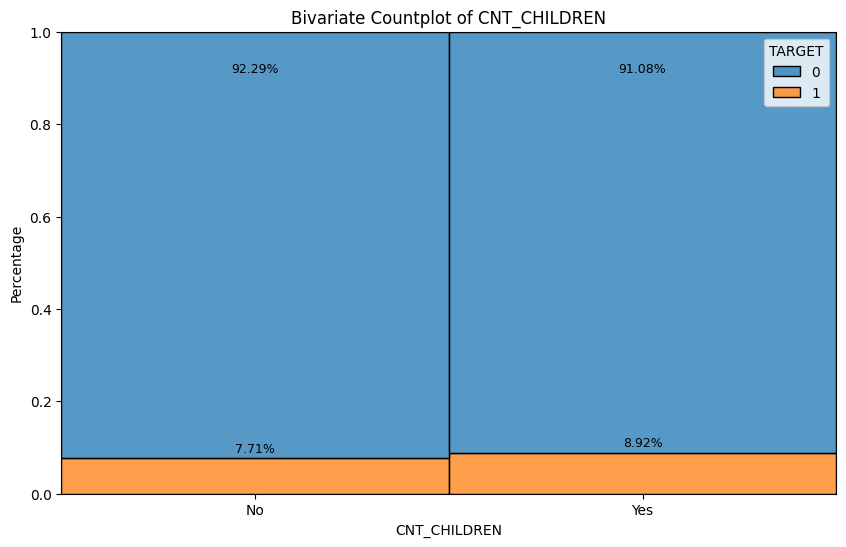

In [62]:
bivariate(curr_df, 'CNT_CHILDREN')

From the above 2 plots for CNT_CHILDREN, 
    
    - A large number of applicants do not have kids
    - Those with children have a 1% higher default rate.

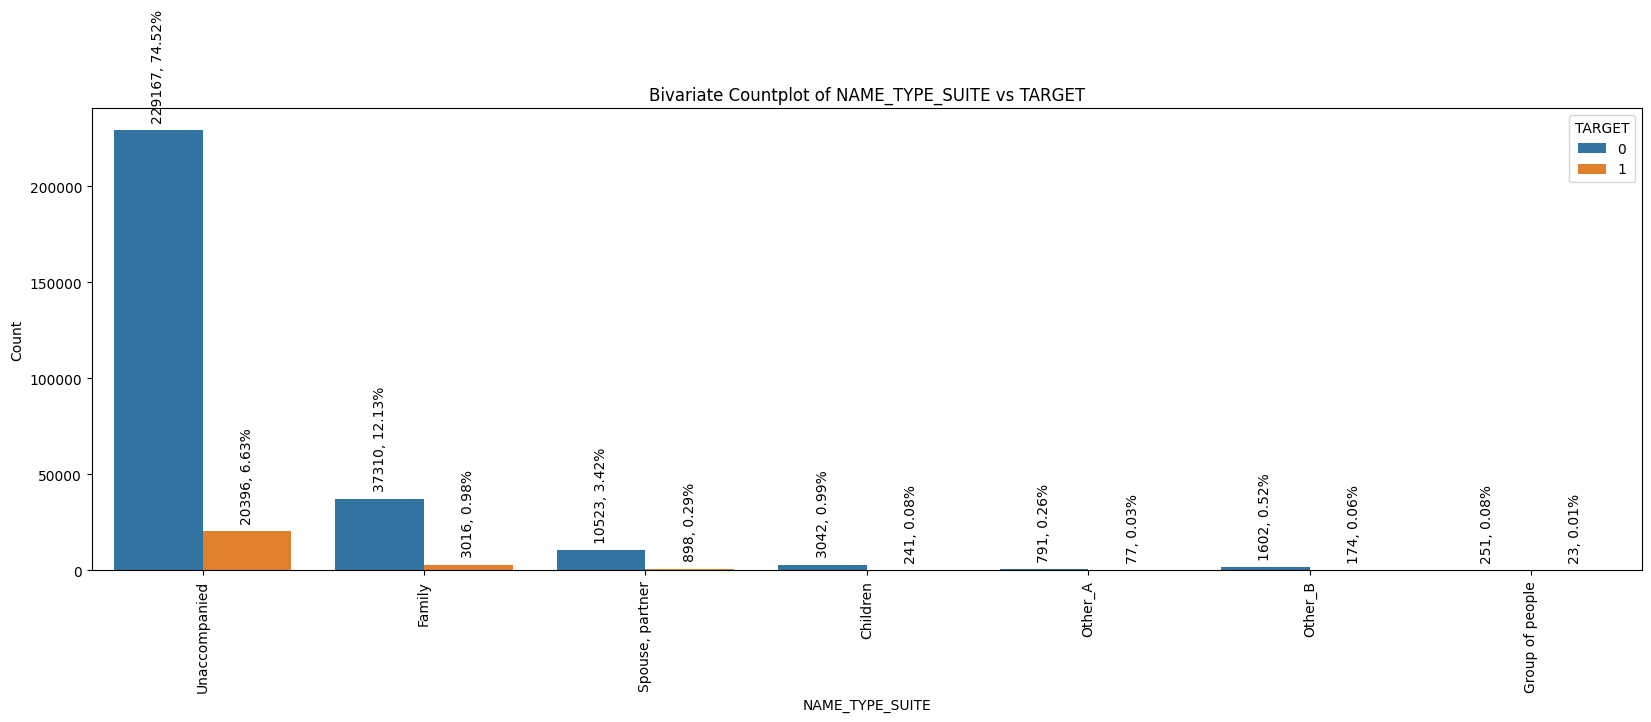

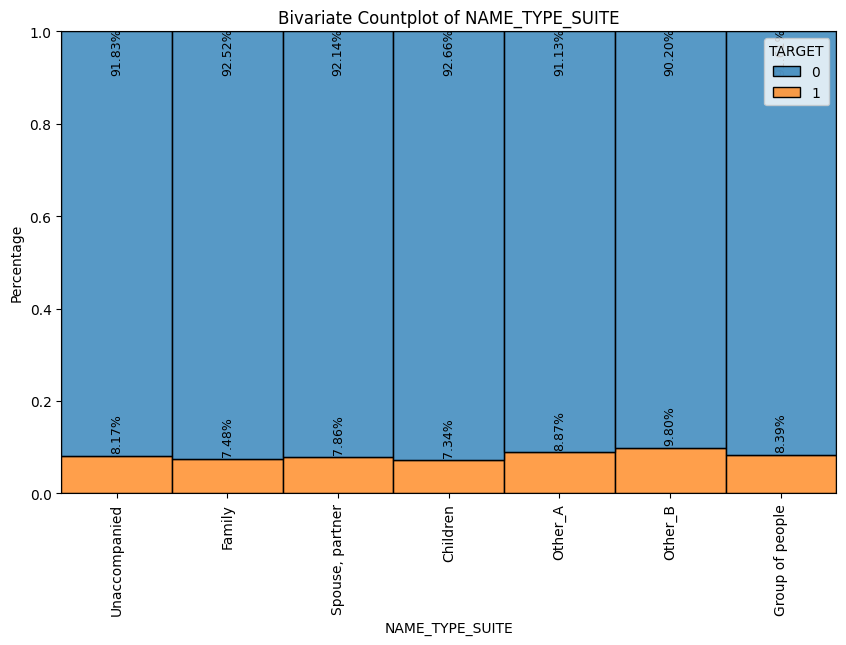

In [63]:
bivariate(curr_df,'NAME_TYPE_SUITE', rotate=True)

From the above 2 plots for NAME_TYPE_SUITE, 
    
    - Most clients are unaccompanied (~81%).
    - Other_B has the highest default rate
    - Clients accompanied by their children have the lowest default rate.

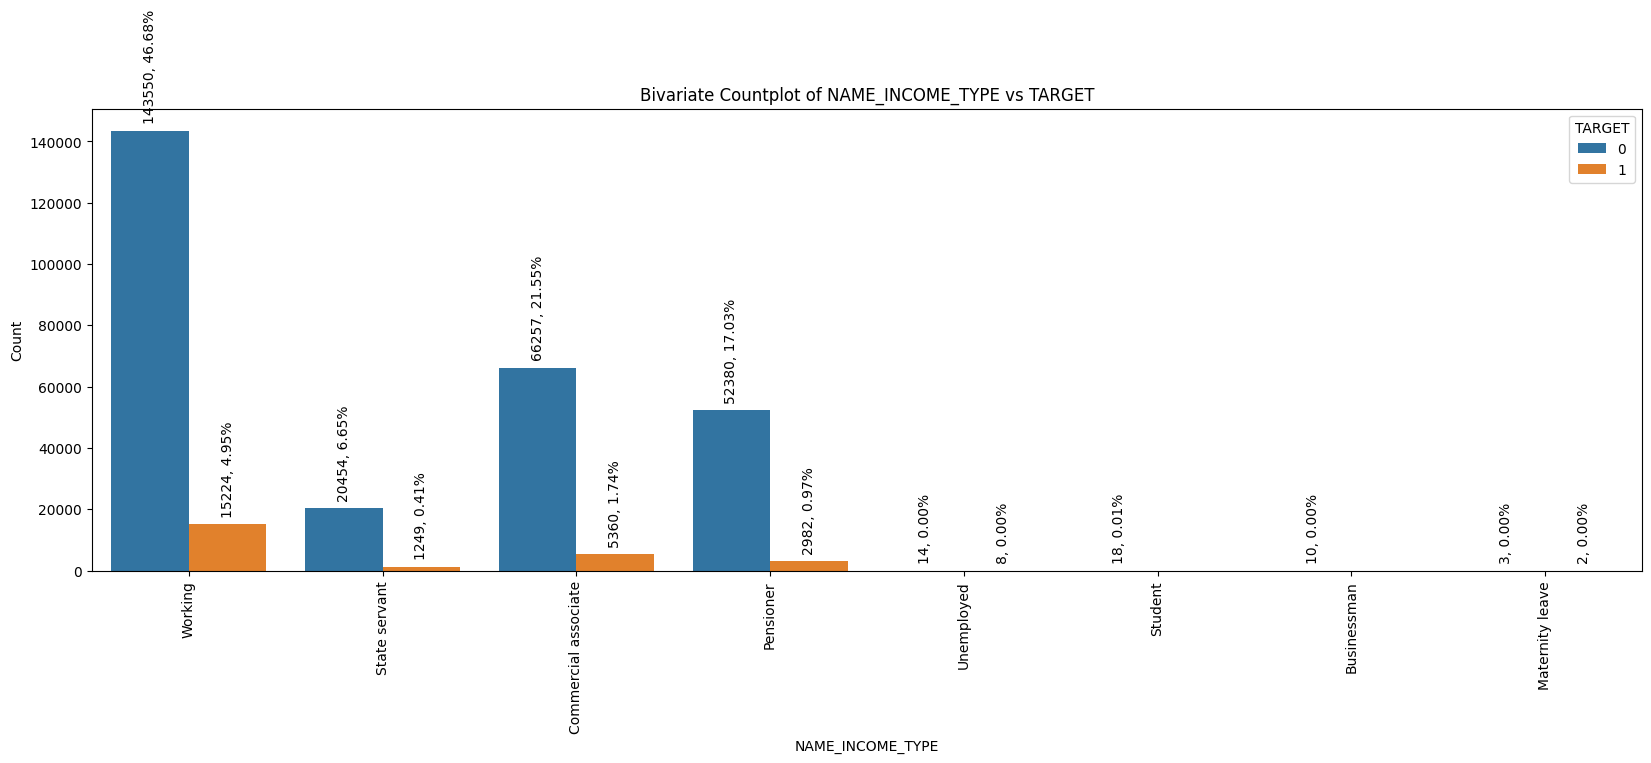

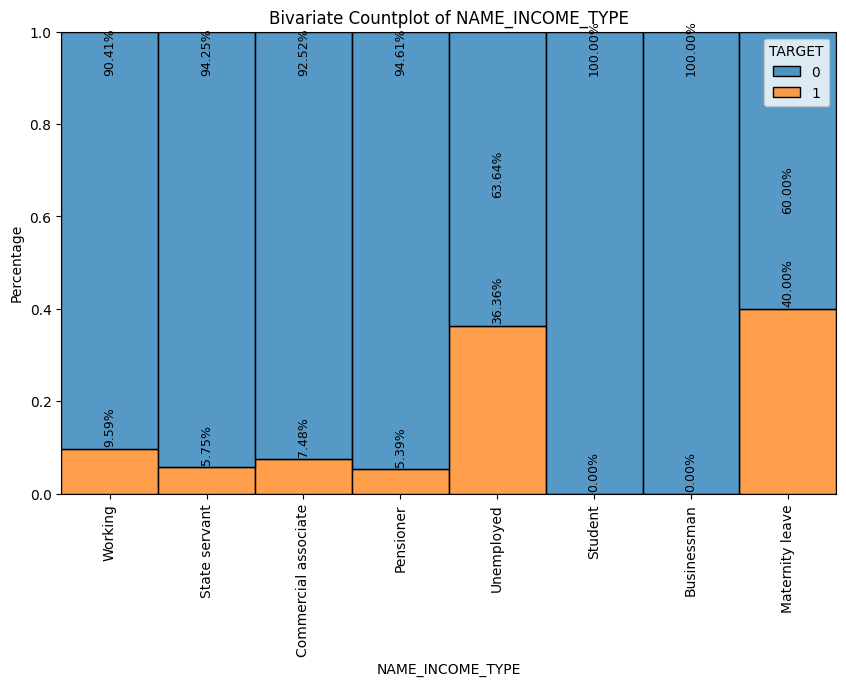

In [64]:
bivariate(curr_df,'NAME_INCOME_TYPE', rotate=True)

From the above 2 plots for NAME_INCOME_TYPE, 
    
    - A large number of clients are working
    - Students and businessman have 0 defaulters
    - Those who are unemployed or on maternity leave have a high default rate.

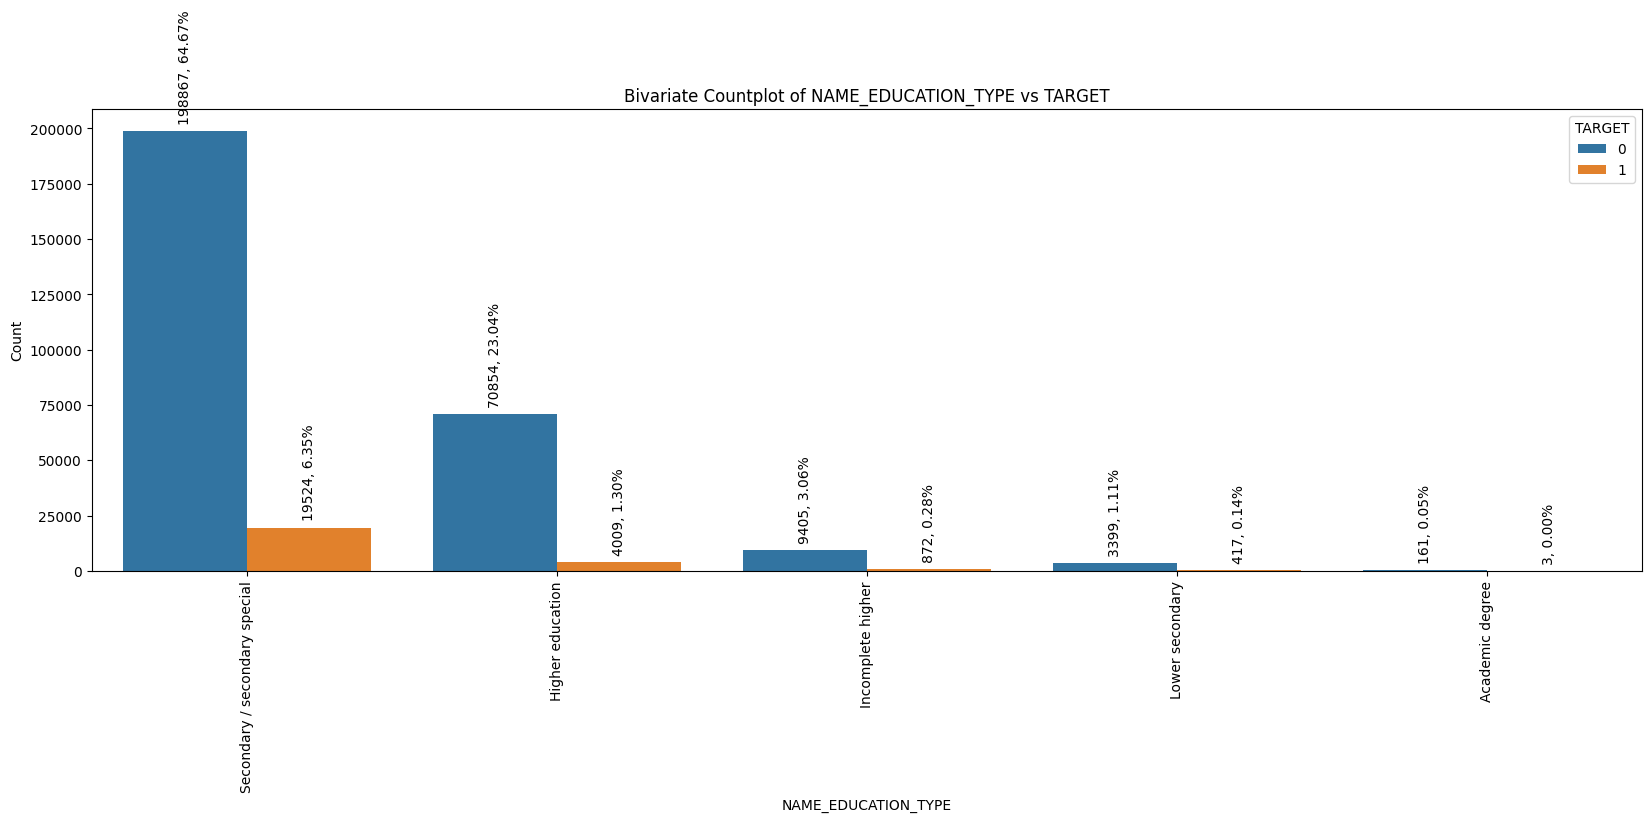

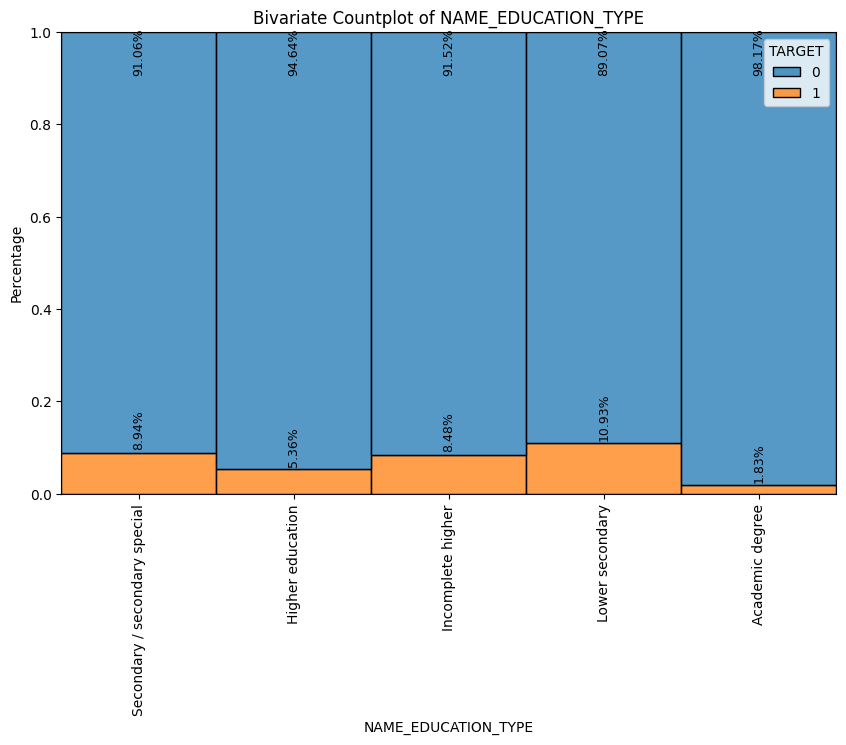

In [65]:
bivariate(curr_df, 'NAME_EDUCATION_TYPE',rotate=True)

From the above 2 plots for NAME_EDUCATION_TYPE, 
    
    - Most clients have a secondary education
    - Those with academic degree only has 1.83% defaulters
    - CLients with lower secondary have the highest default rate followed by those that have secondary education

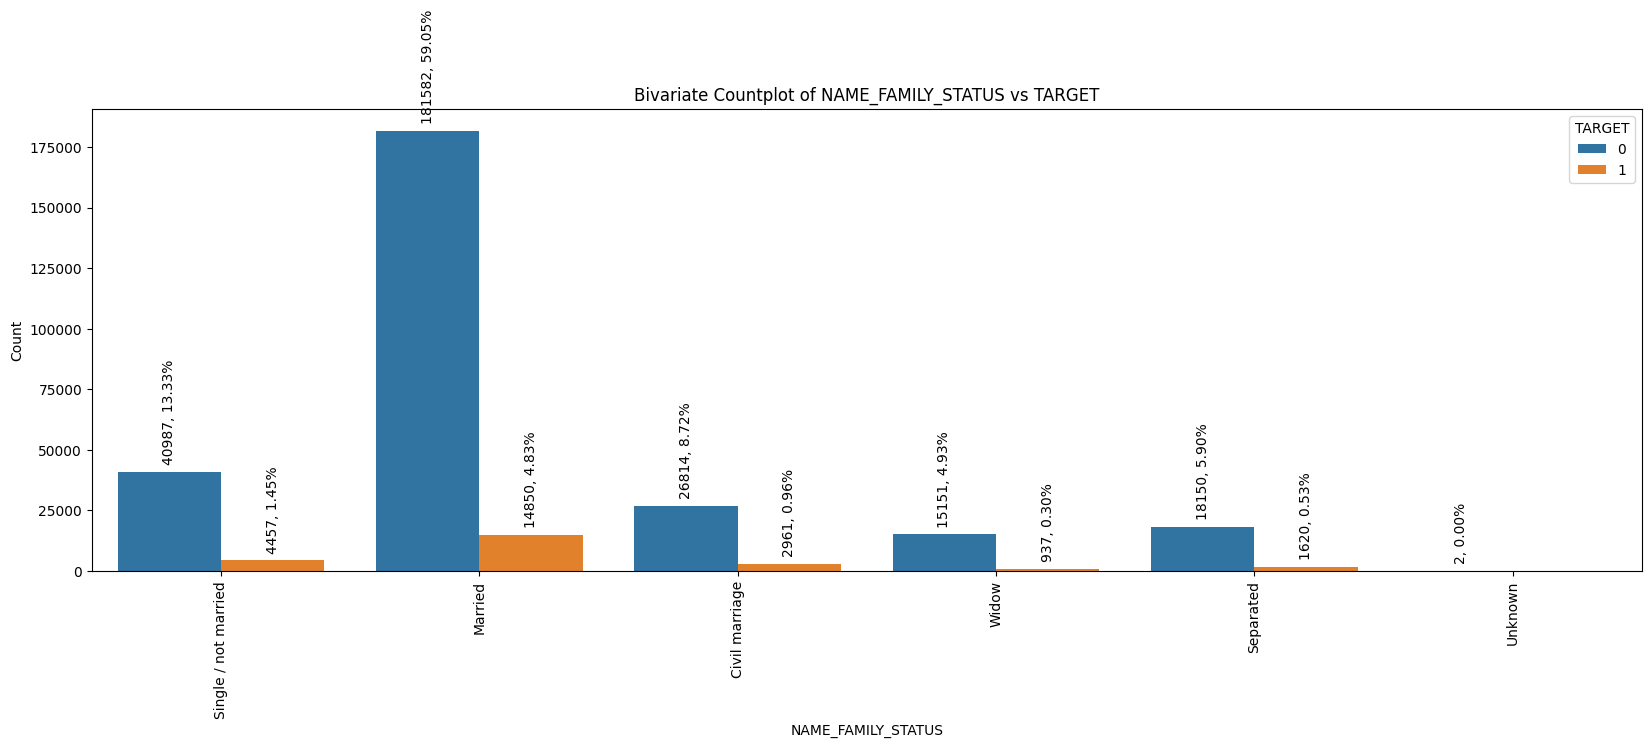

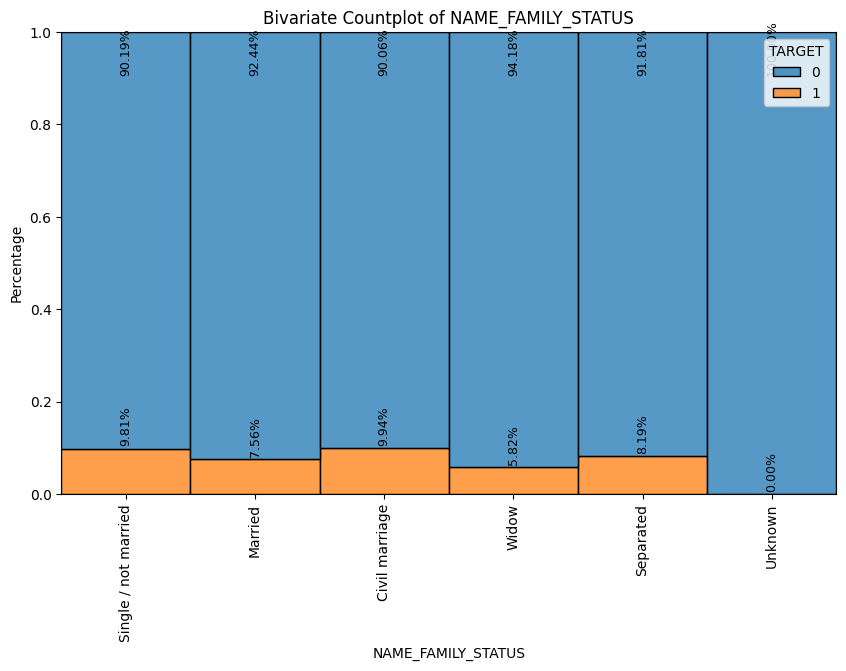

In [66]:
bivariate(curr_df, 'NAME_FAMILY_STATUS',rotate=True)

From the above 2 plots for NAME_FAMILY_STATUS, 
    
    - ~65% clients are married
    - Civil marriage clients have the highest default rate followed by those who are single.
    - Those who are widow have the least issues with payment at 5.82%

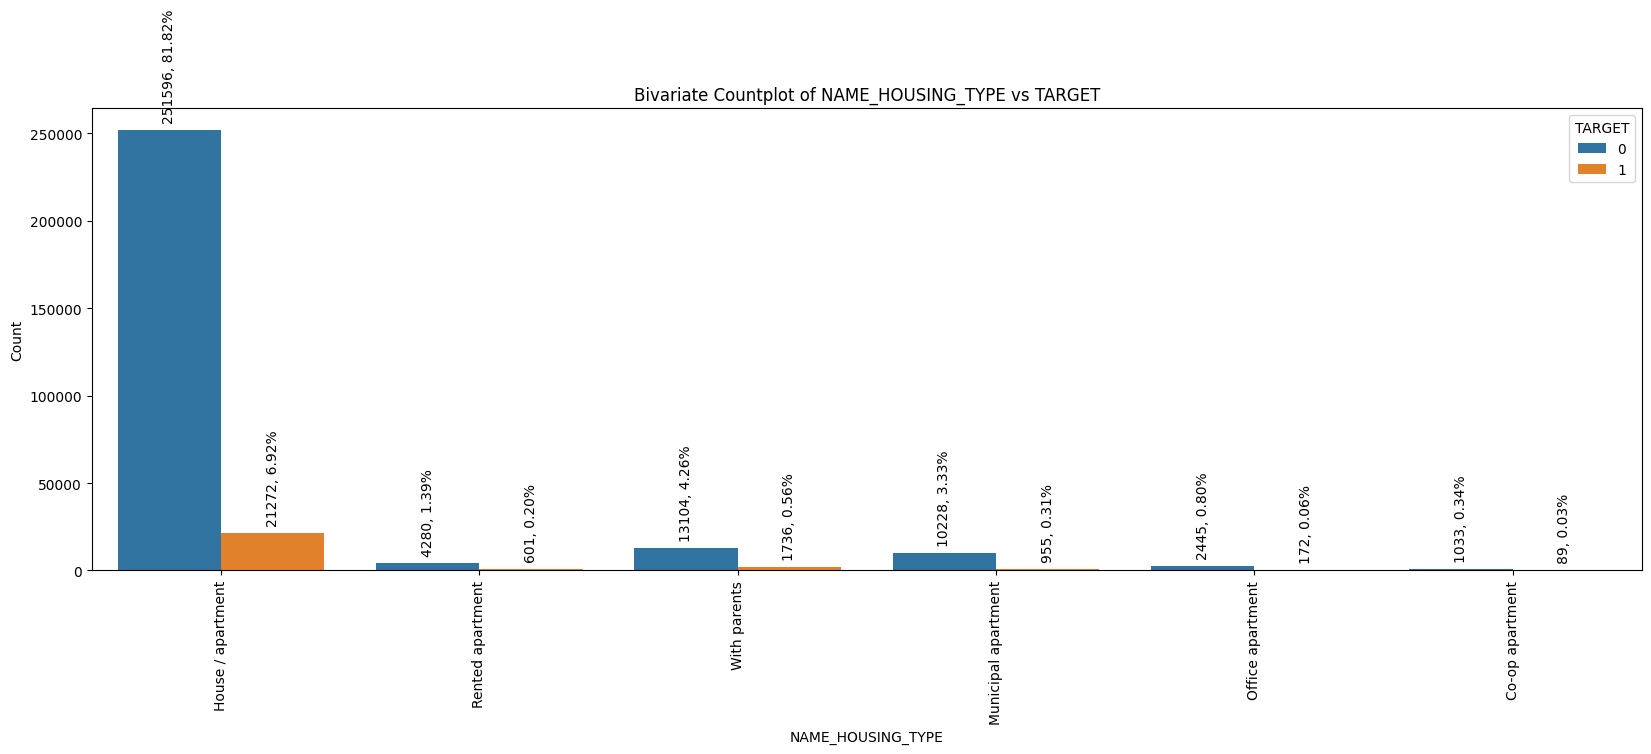

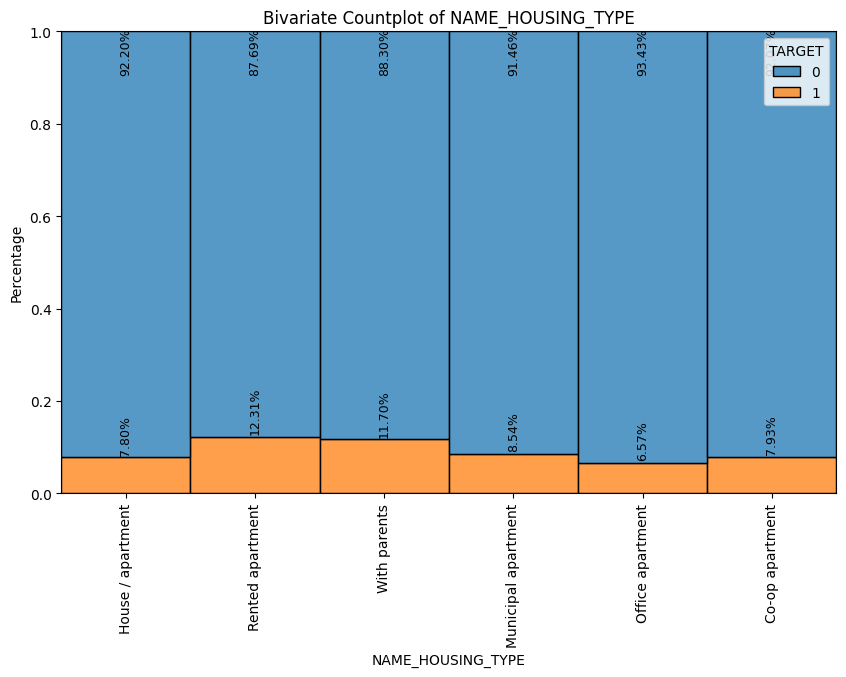

In [67]:
bivariate(curr_df, 'NAME_HOUSING_TYPE',rotate=True)

From the above 2 plots for NAME_HOUSING_TYPE, 
    
    - ~89% clients have a house or an apartment
    - In total, 6.92% of those with house/apartment have defaulted.
    - Clients with rented apartment have the highest chance of defaulting at 12.31%
    - Those who have an office apartment have the least payment issues at 6.75%

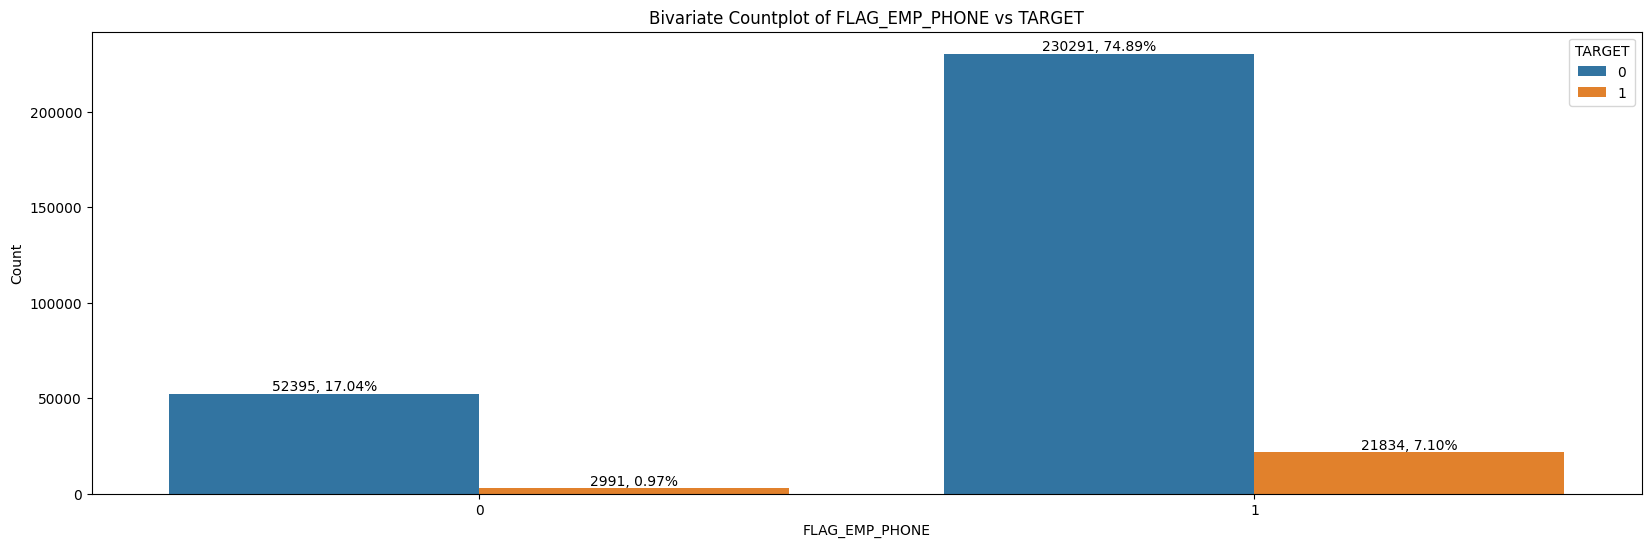

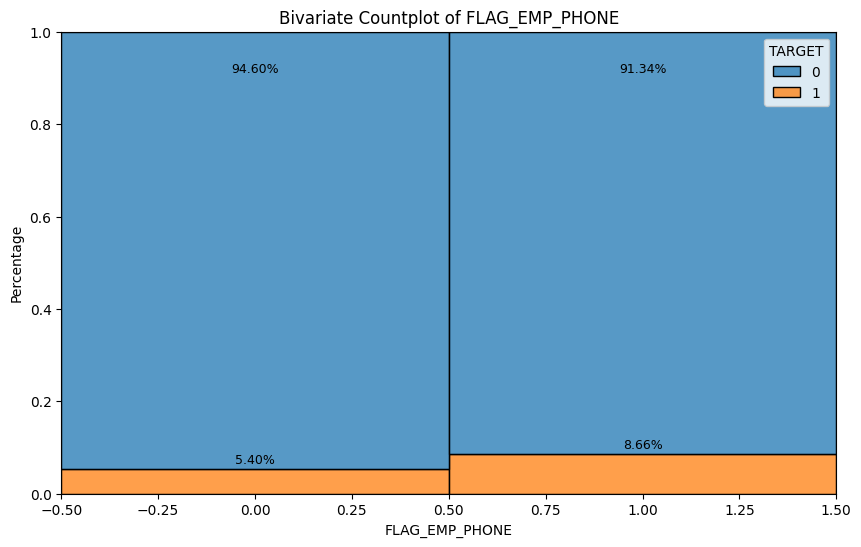

In [68]:
bivariate(curr_df, 'FLAG_EMP_PHONE')

From the above 2 plots for FLAG_EMP_PHONE, 
    
    -Client that give work phone number have a higher default rate at 8.66%
    - Most clients do provide a work phone number

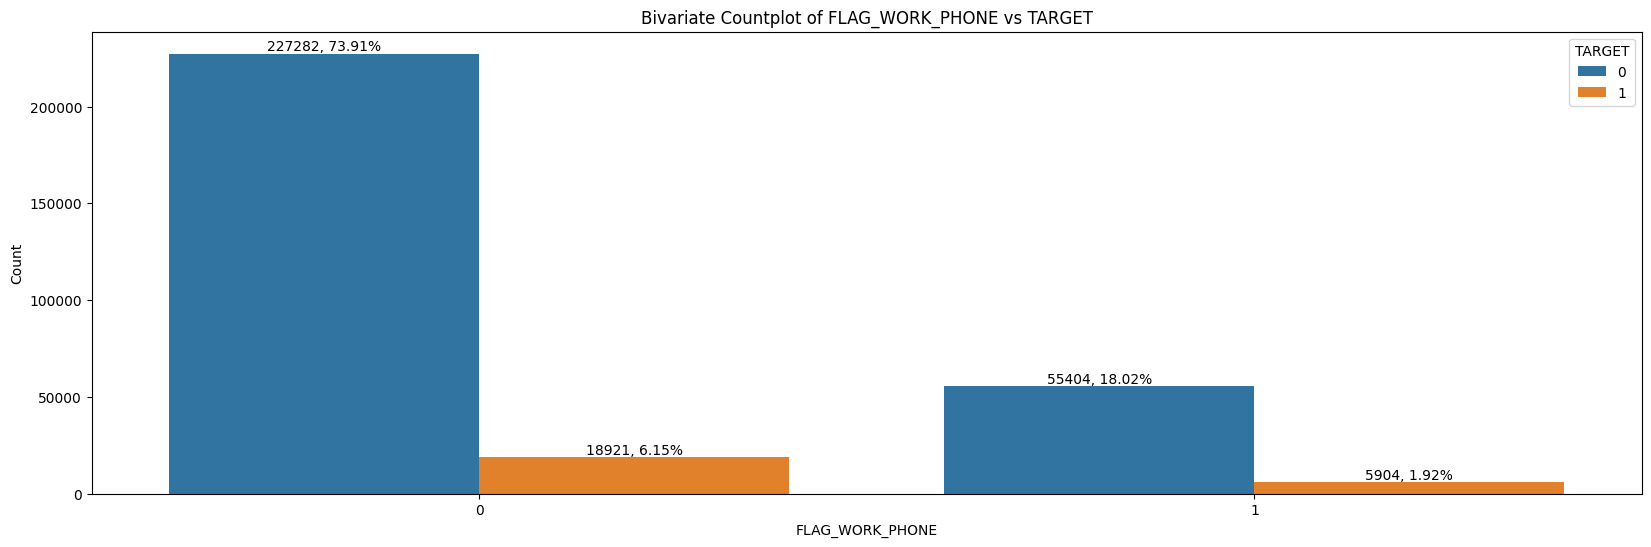

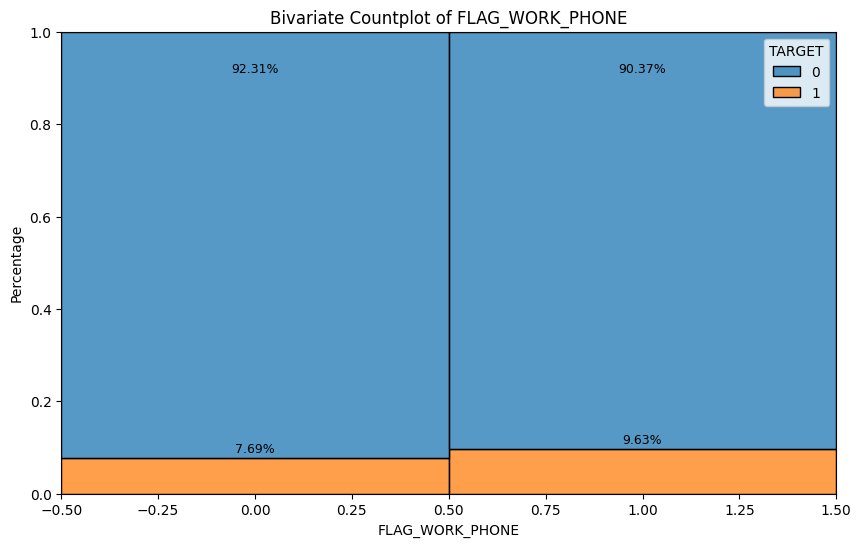

In [69]:
bivariate(curr_df, 'FLAG_WORK_PHONE')

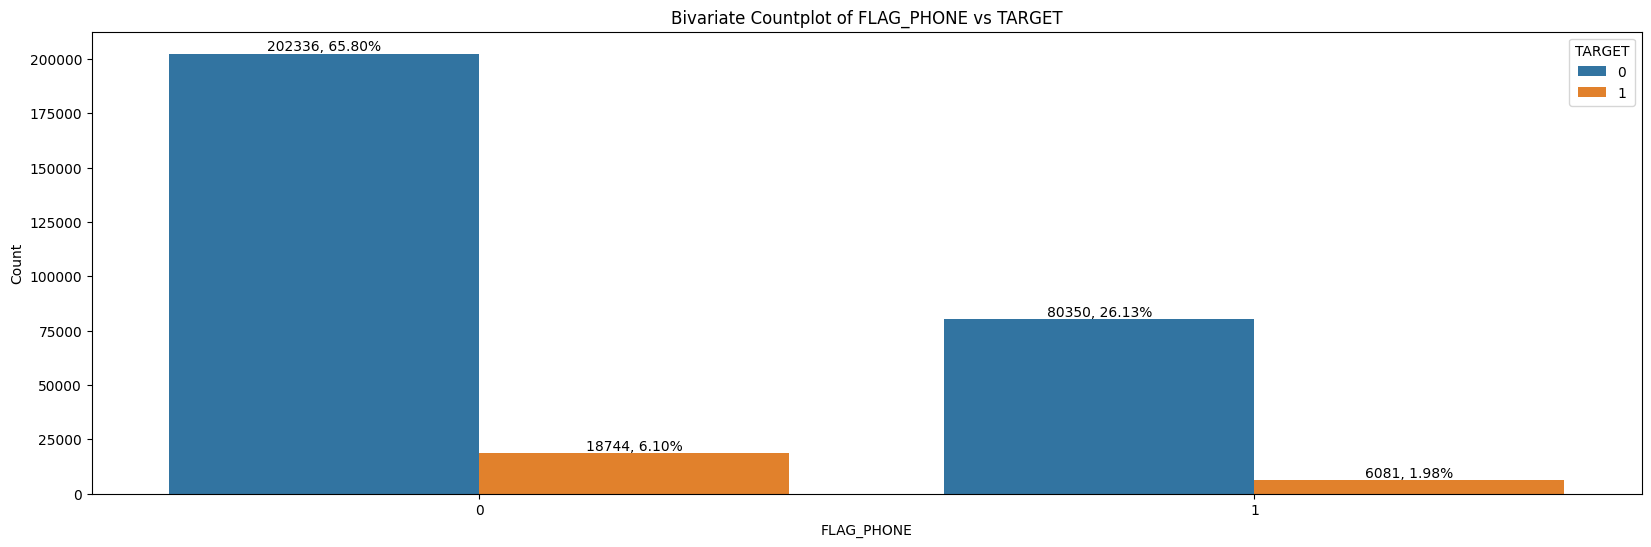

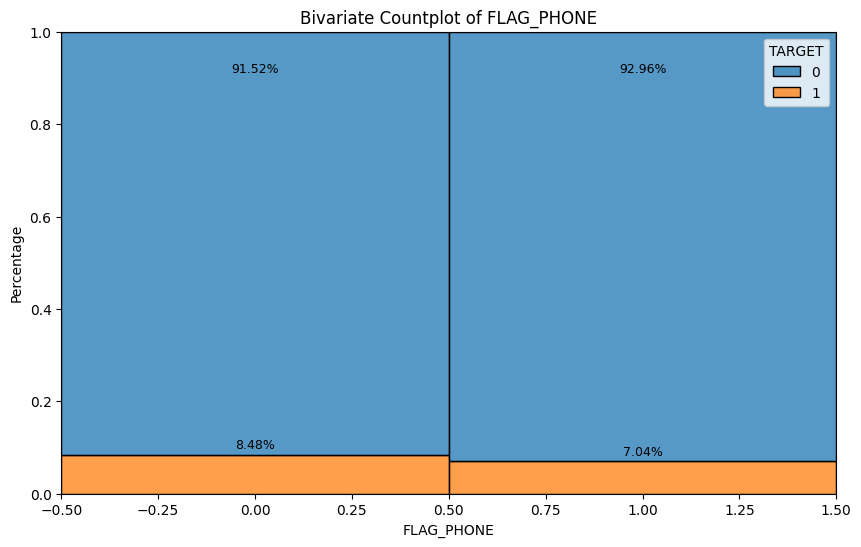

In [70]:
bivariate(curr_df, 'FLAG_PHONE')

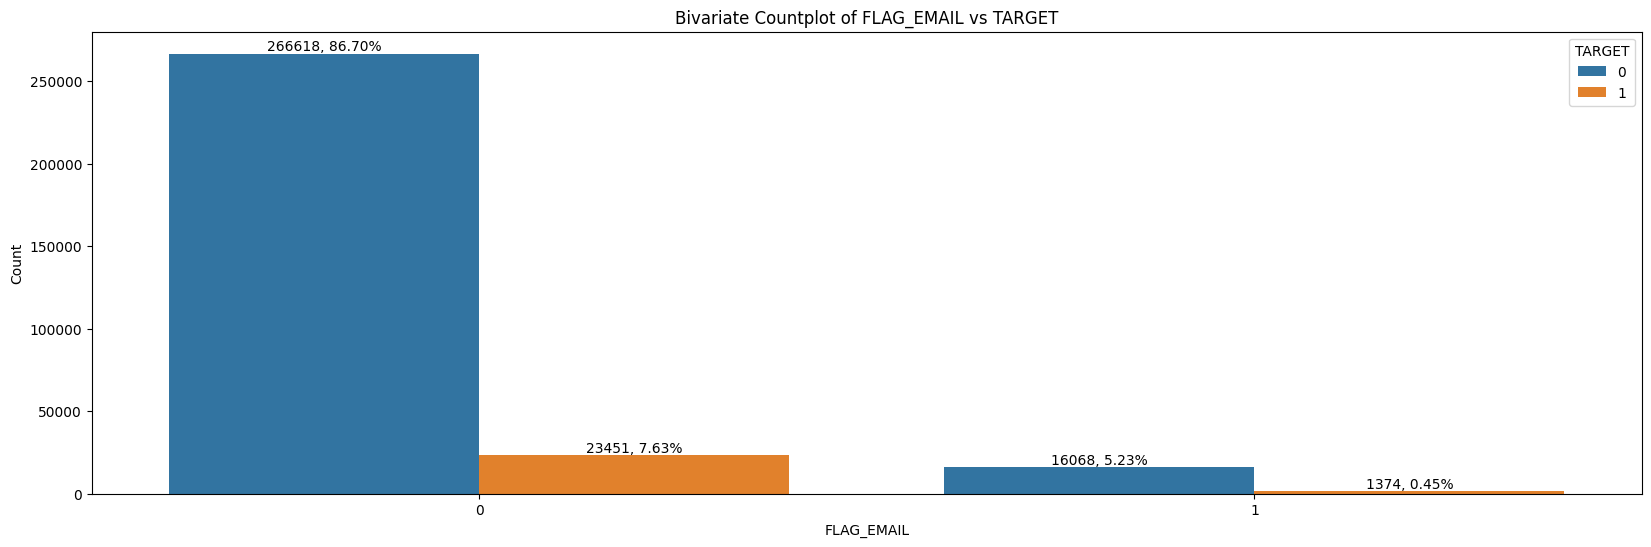

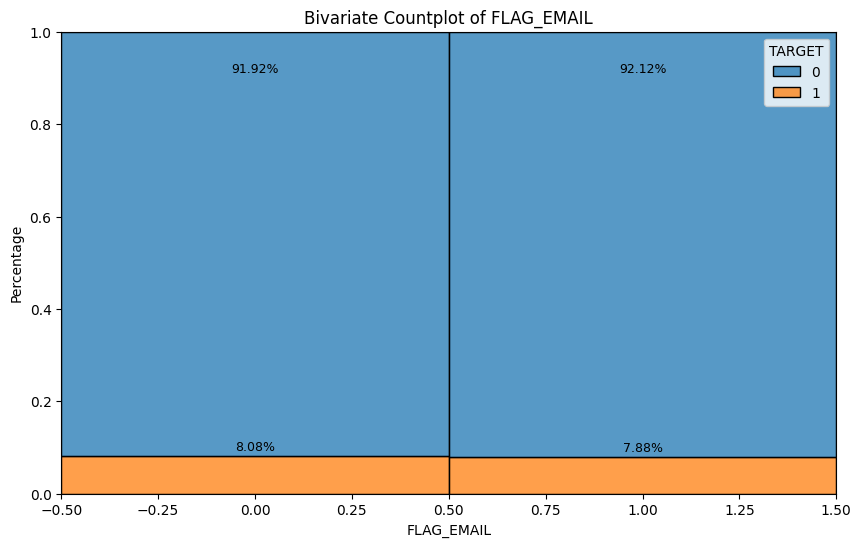

In [71]:
bivariate(curr_df, 'FLAG_EMAIL')

Nothing much to be noted from the above, with slight differences betwen each catgory of up to 1.5%.

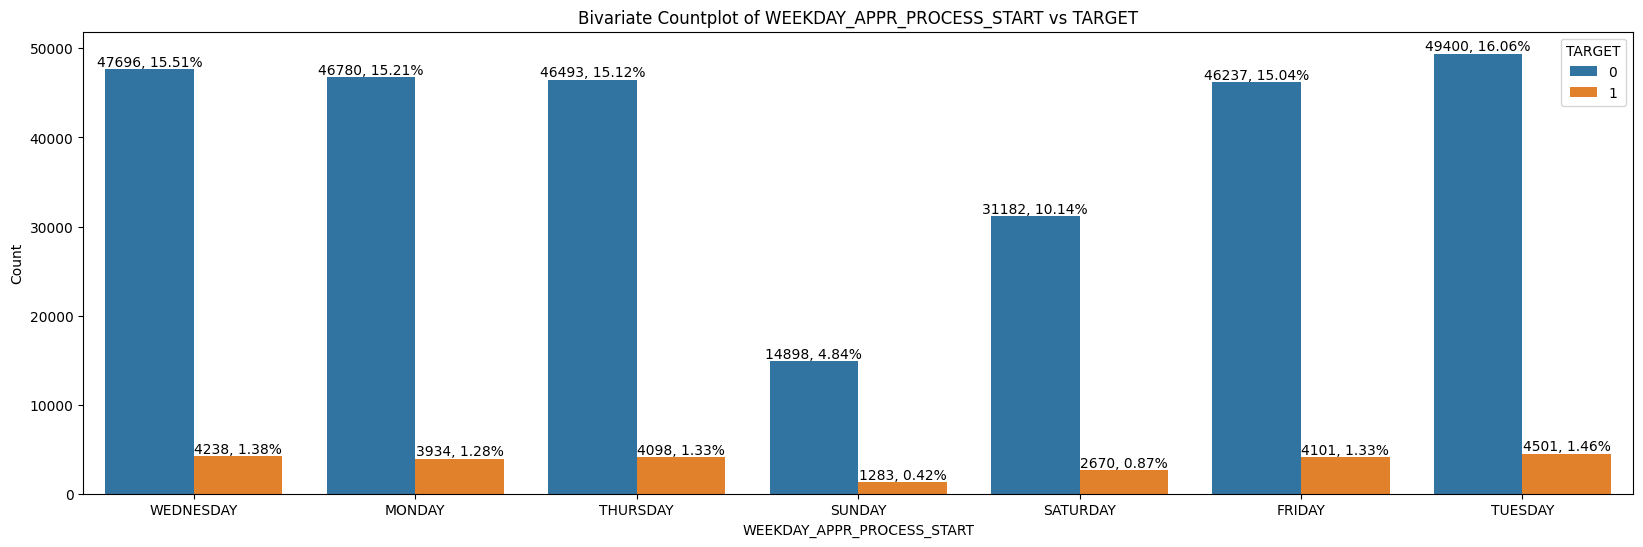

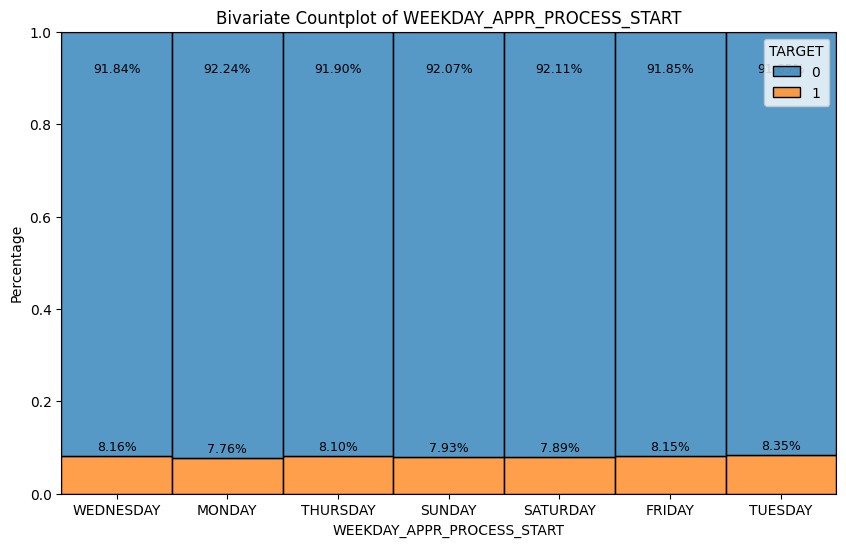

In [72]:
bivariate(curr_df, 'WEEKDAY_APPR_PROCESS_START')

Application day has no effect on default percentage.

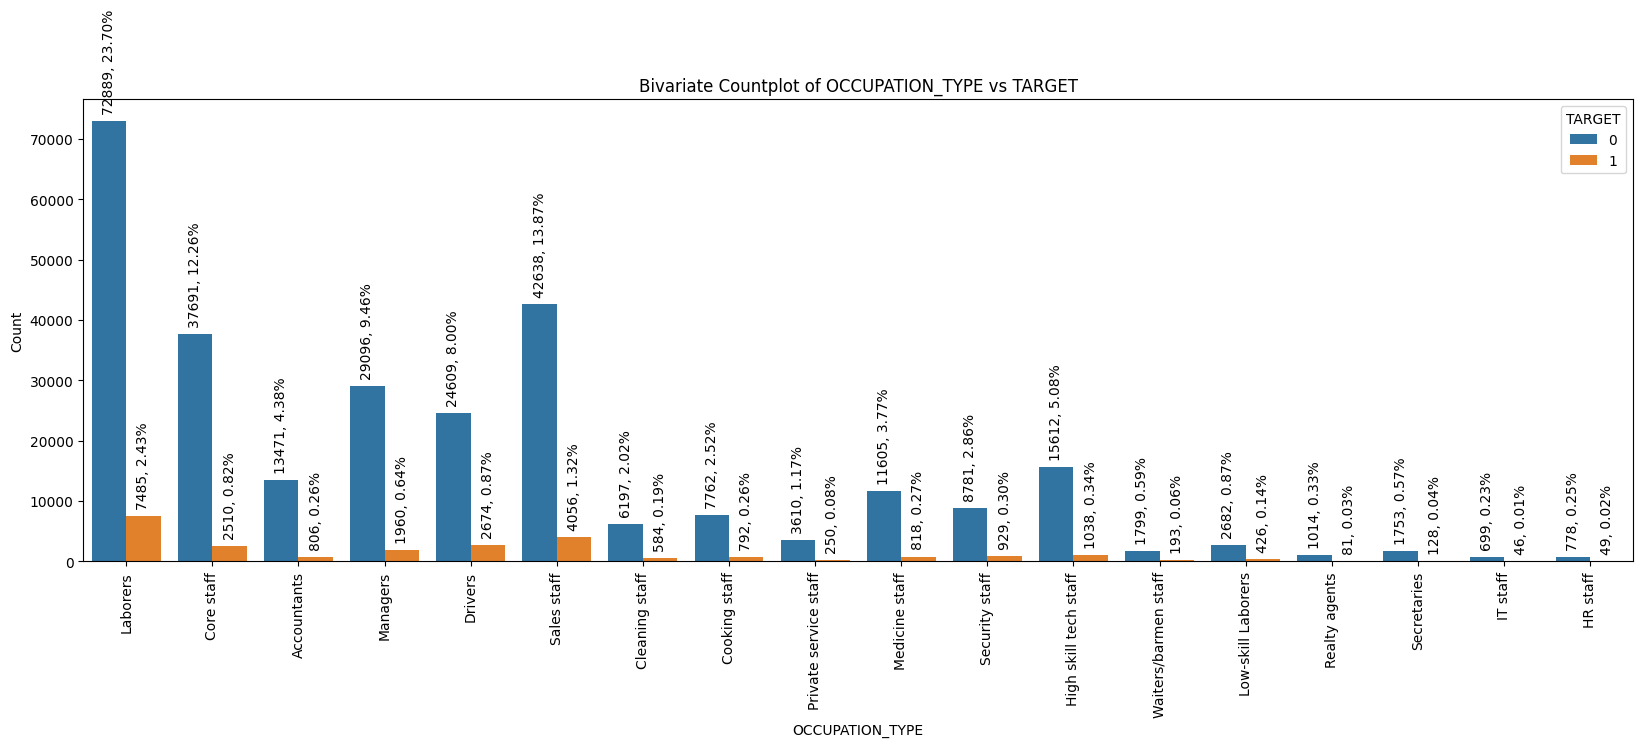

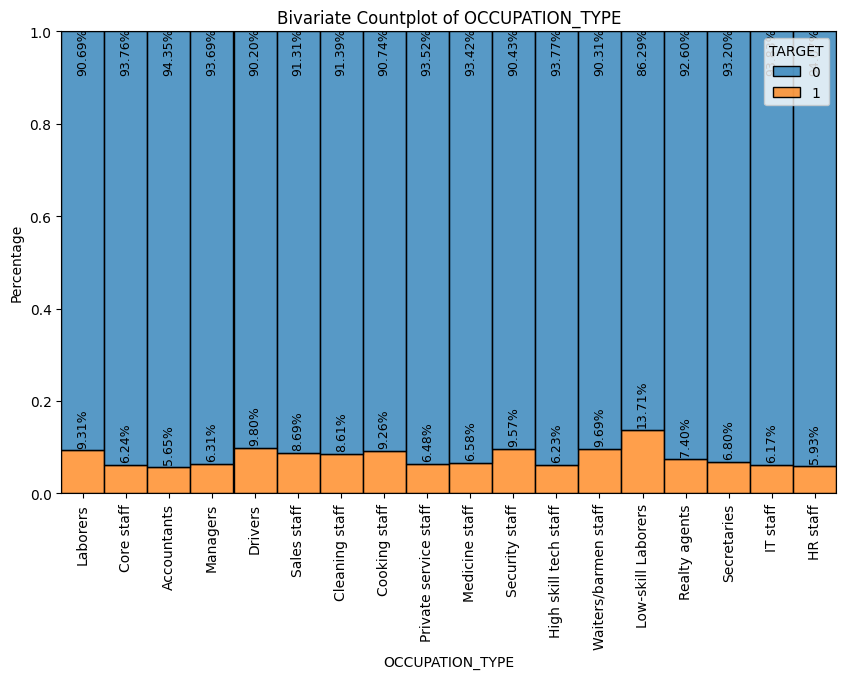

In [73]:
bivariate(curr_df, 'OCCUPATION_TYPE', rotate=True)

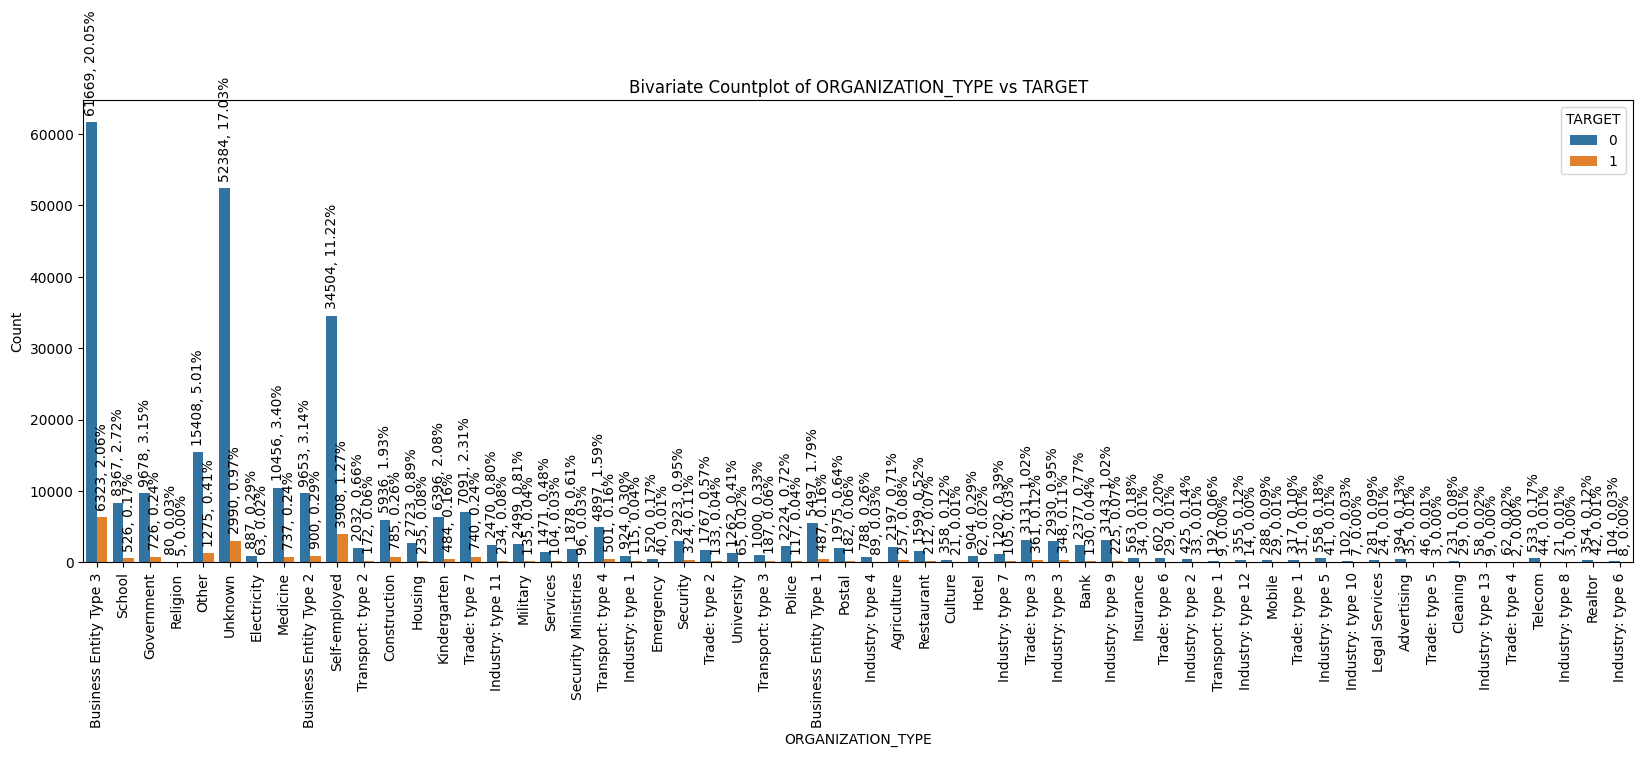

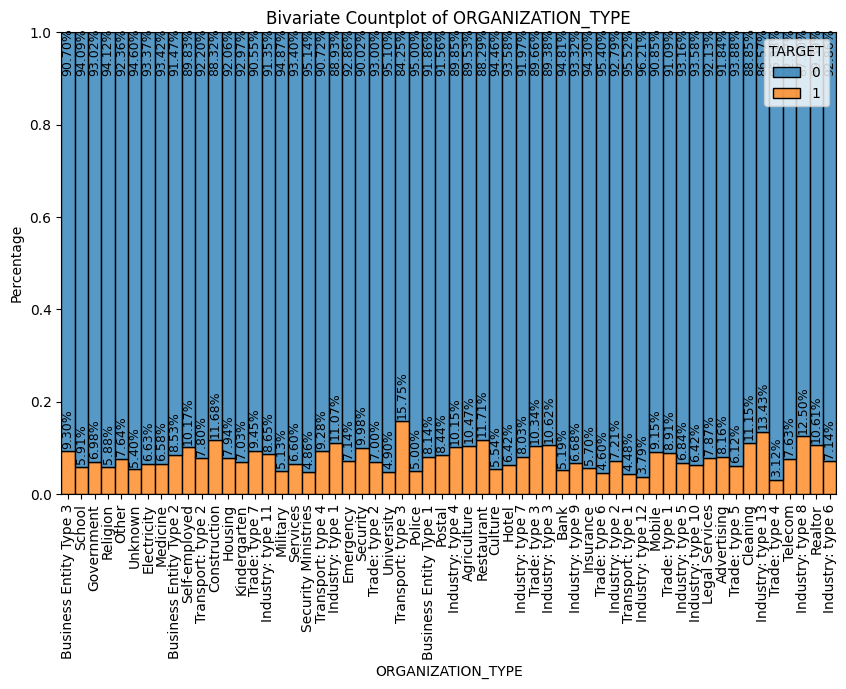

In [74]:
bivariate(curr_df, 'ORGANIZATION_TYPE', rotate=True)

From the above 2 plots for ORGANIZATION_TYPE

    - Organizations with highest percent of defaulters are Transport: type 3 (15.75%), Industry: type 13 (13.43%), Industry: type 8 (12.5%) and Restaurant (11.71%).
    -Self employed people have relative high defaulting rate,to be safer side loan disbursement should be avoided or provide loan with higher interest rate to mitigate the risk of defaulting.
    -Most of the people application for loan are from Business Entity Type 3
    -For a very high number of applications, Organization type information is unavailable(XNA)
    -It can be seen that following category of organization type has lesser defaulters thus safer for providing loans: Trade Type 4 and 5, Industry type 8

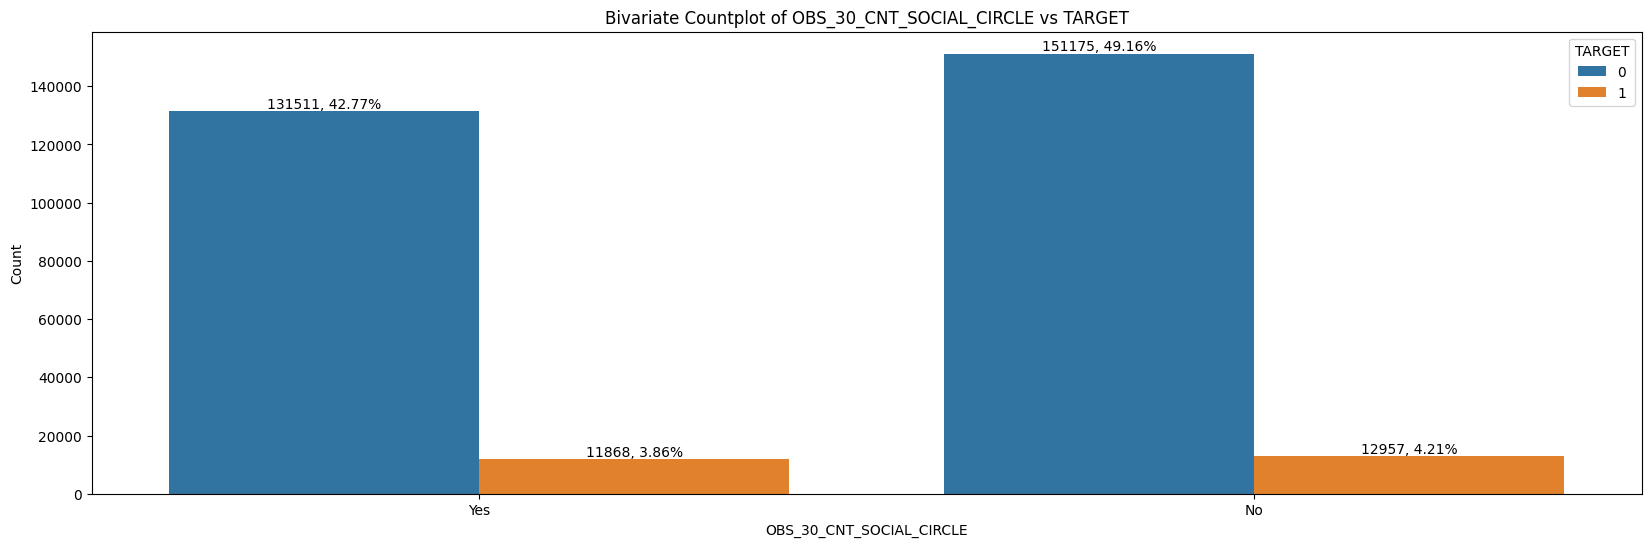

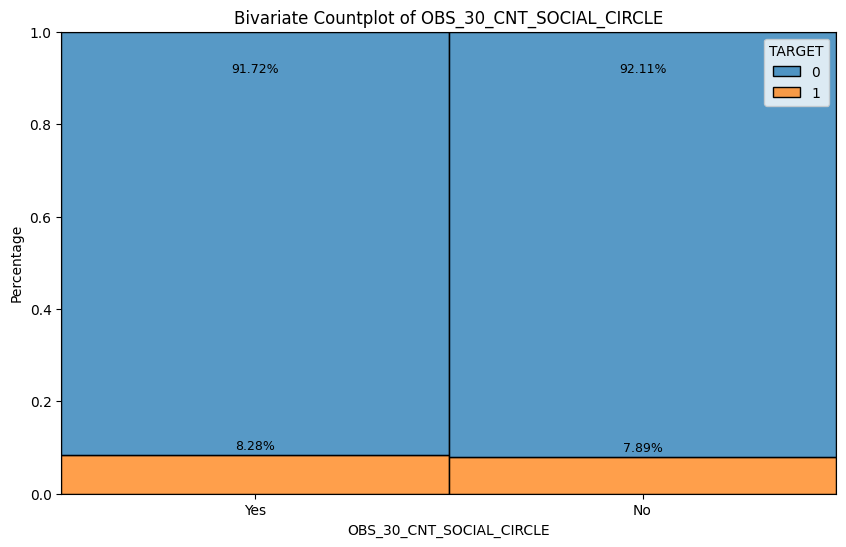

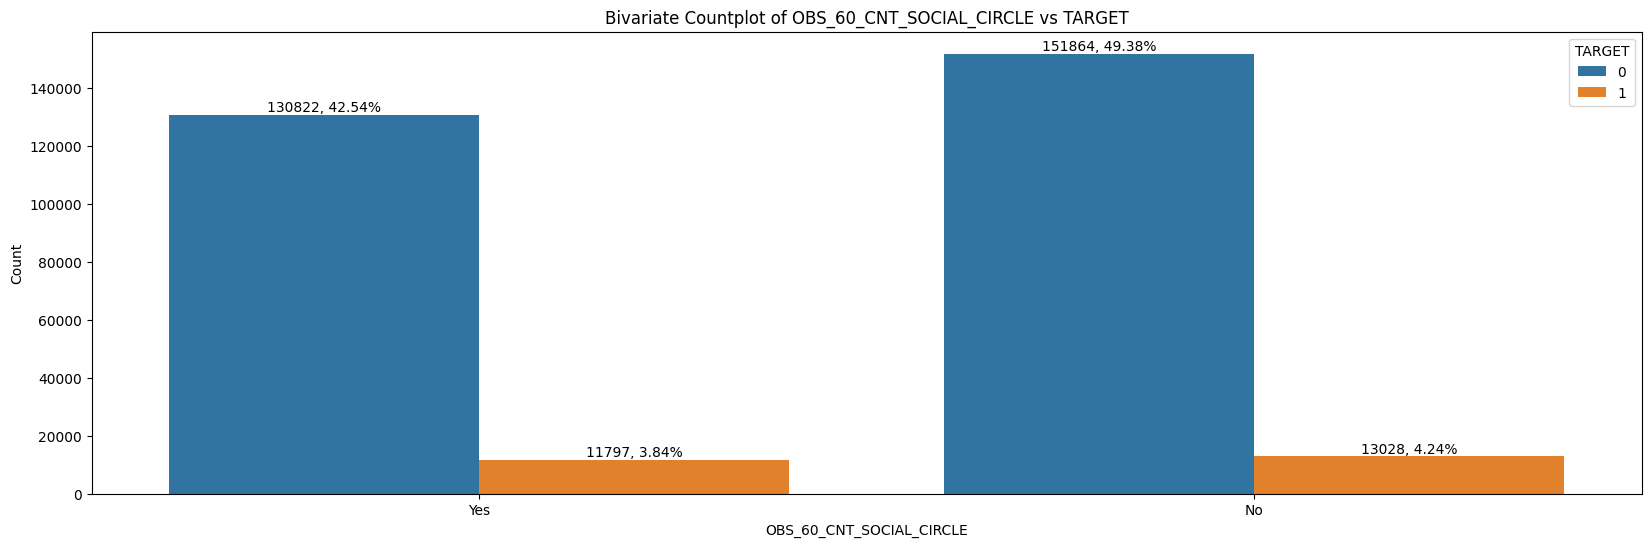

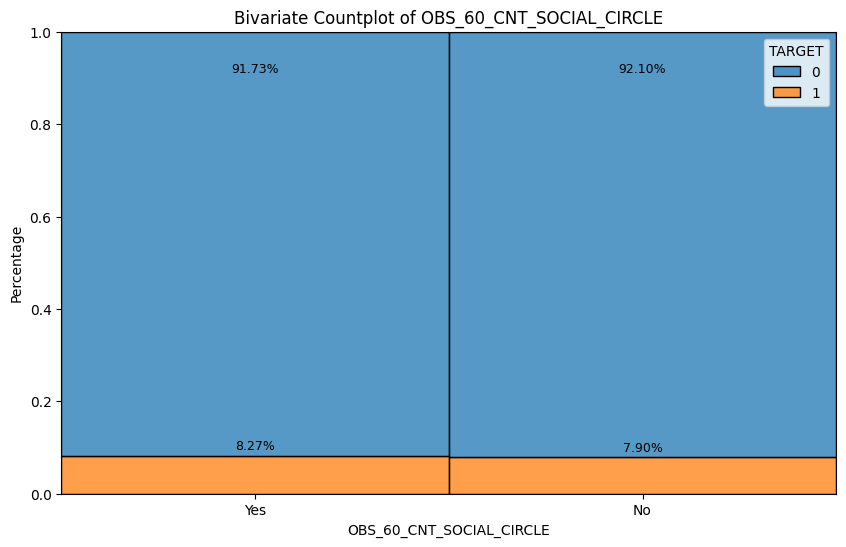

In [75]:
bivariate(curr_df, 'OBS_30_CNT_SOCIAL_CIRCLE')
bivariate(curr_df, 'OBS_60_CNT_SOCIAL_CIRCLE')

The above 2 columns provide no real insights

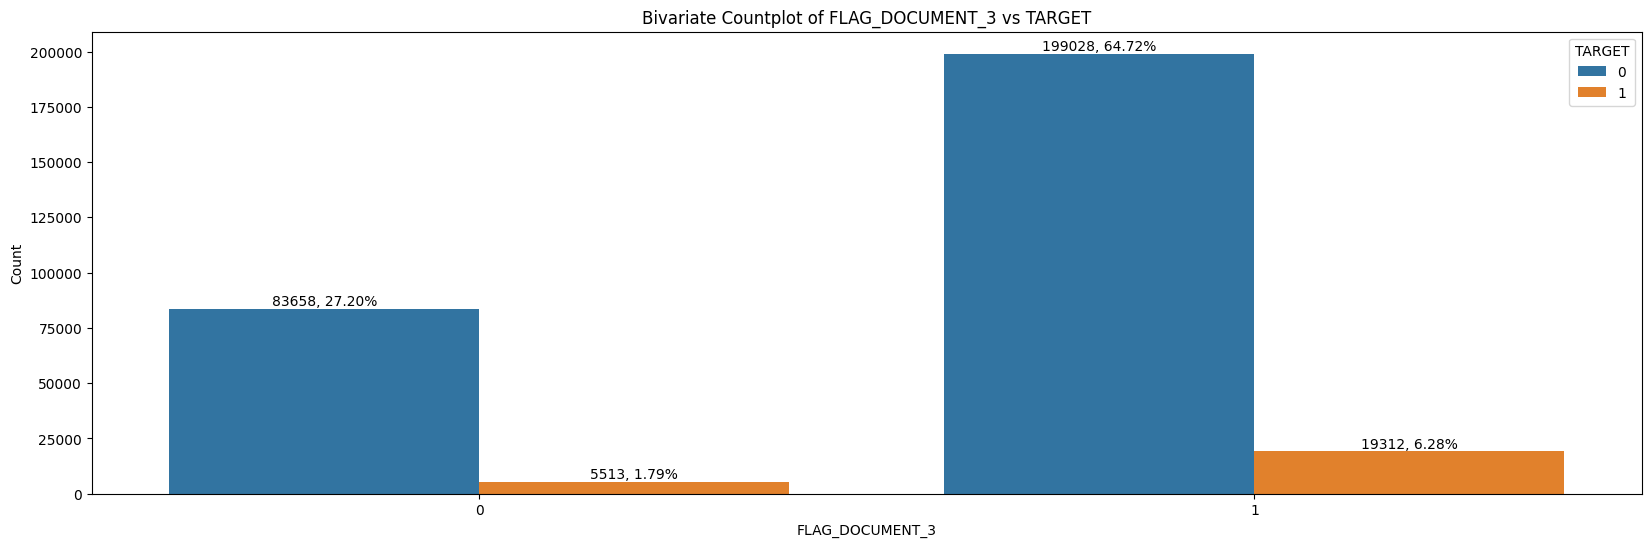

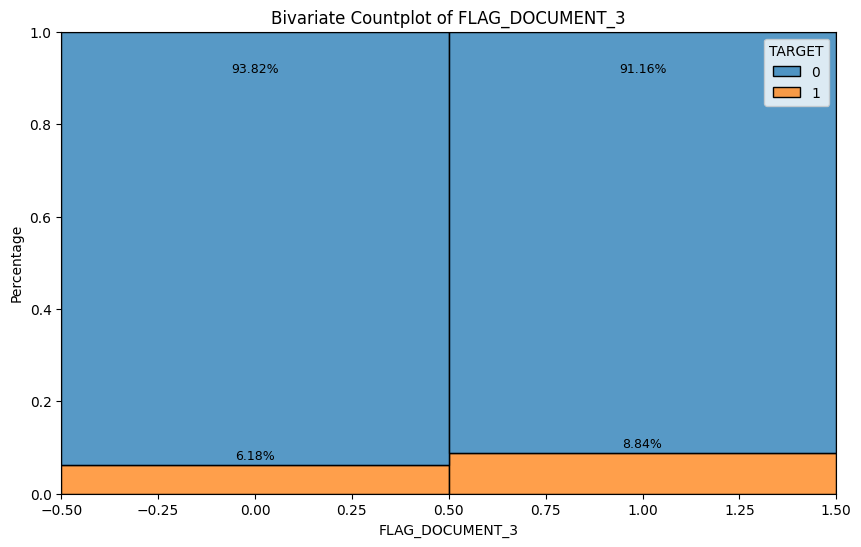

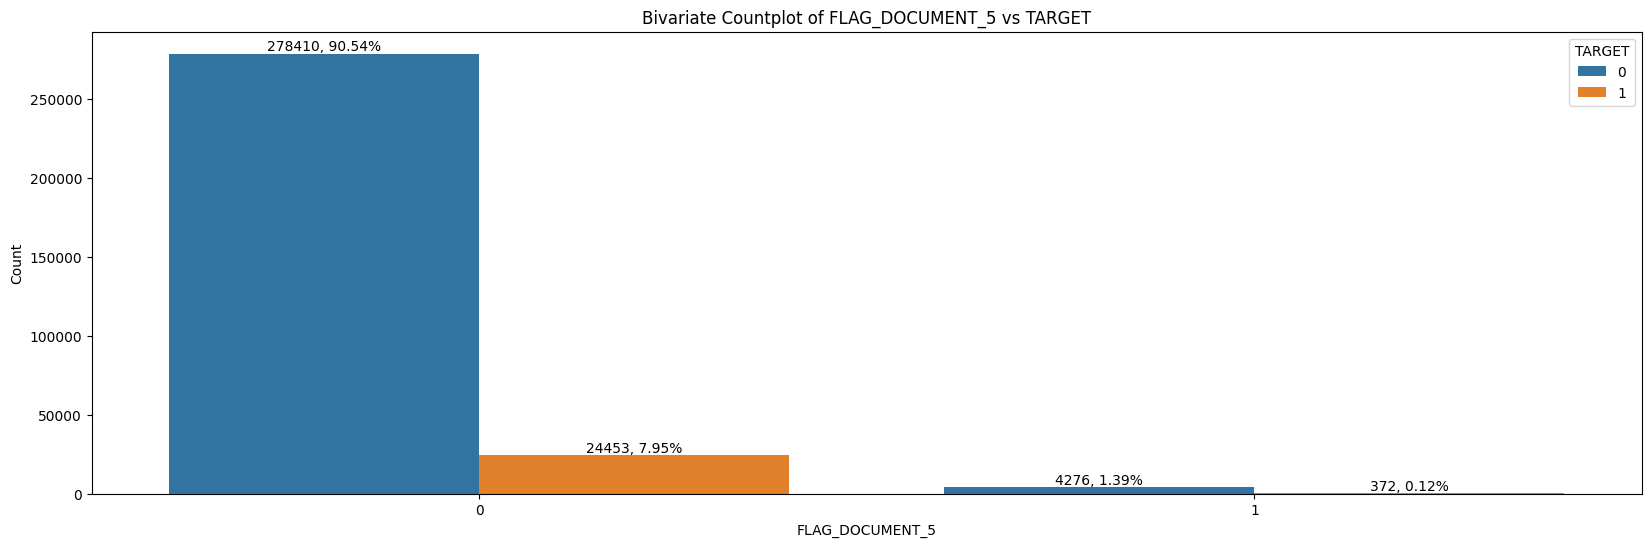

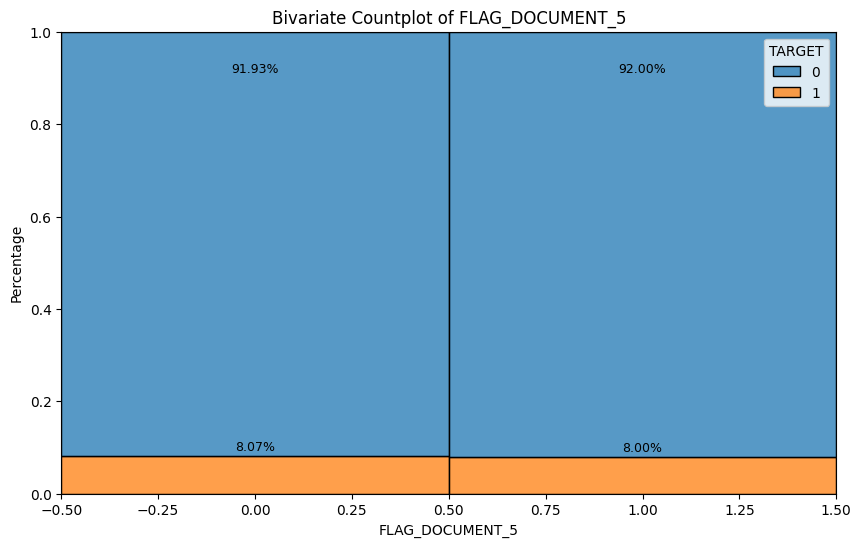

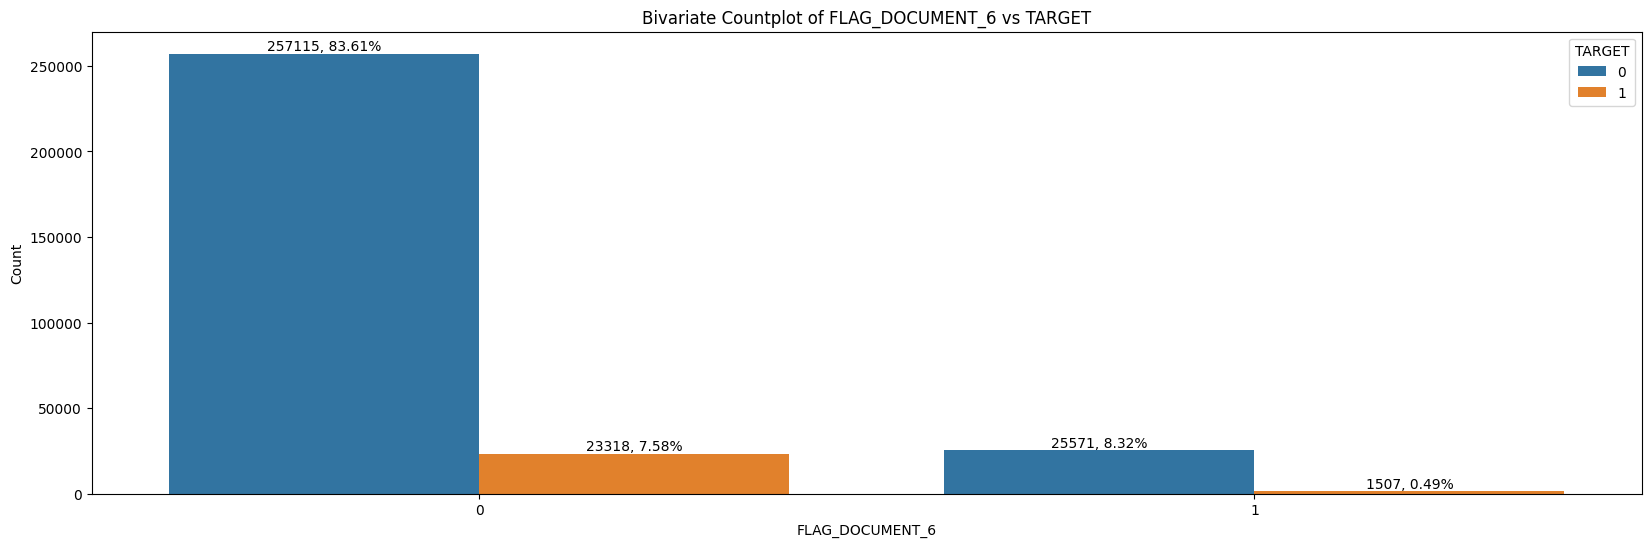

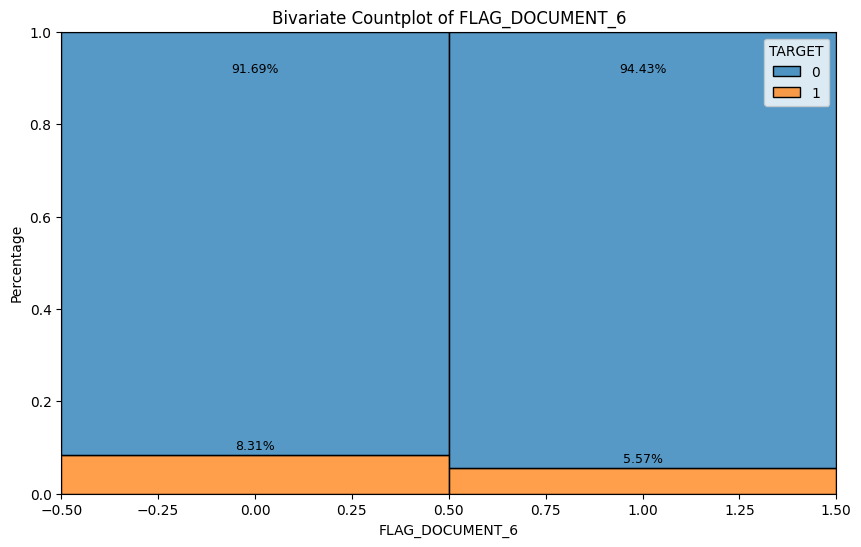

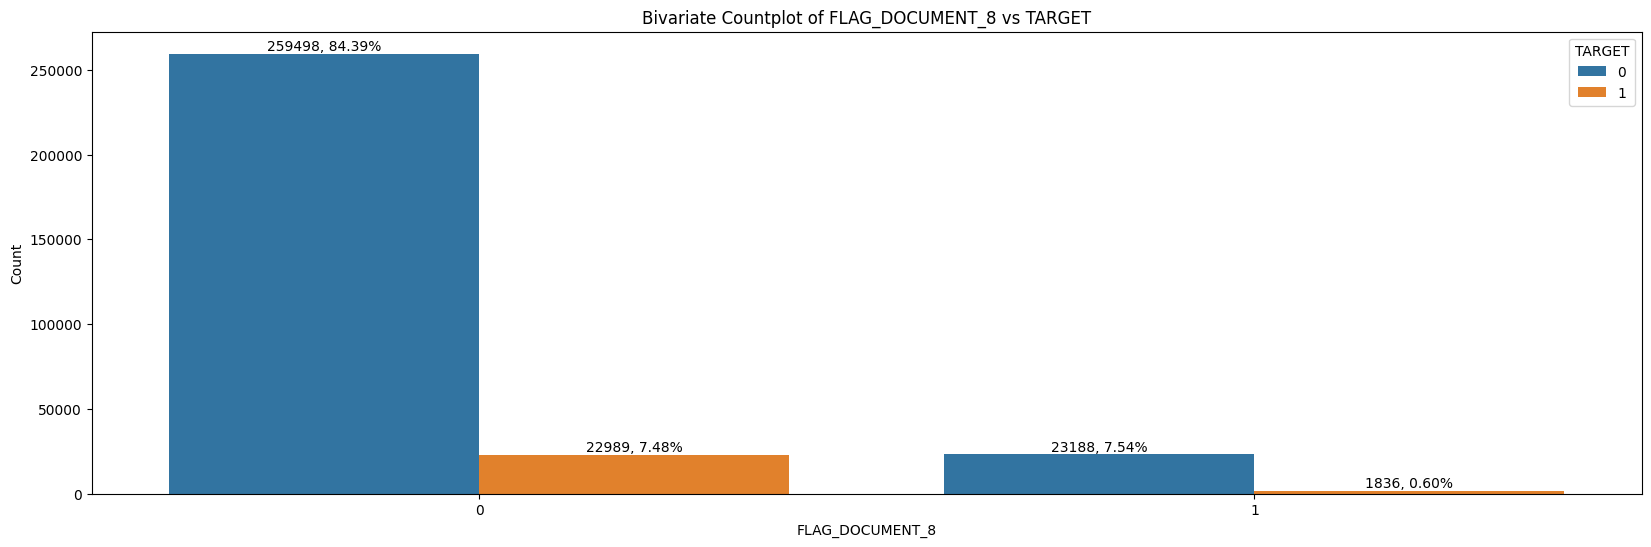

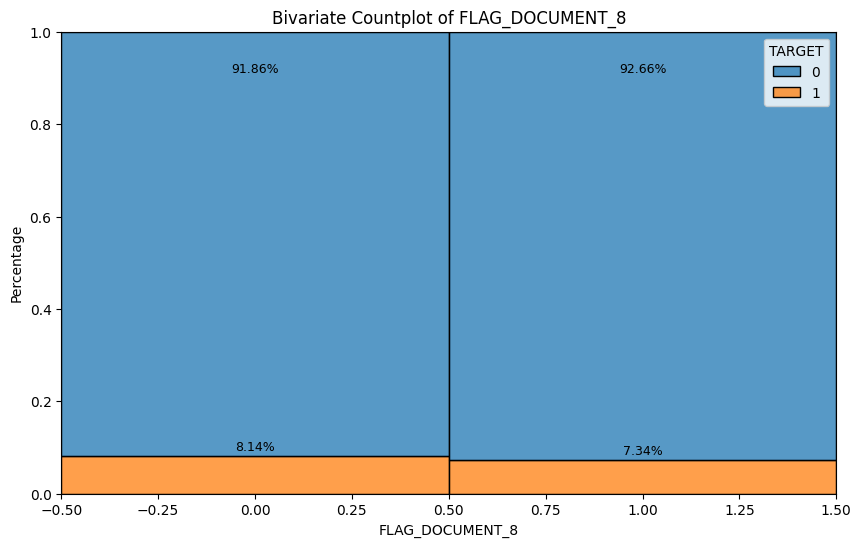

In [76]:
bivariate(curr_df, 'FLAG_DOCUMENT_3')
bivariate(curr_df, 'FLAG_DOCUMENT_5')
bivariate(curr_df, 'FLAG_DOCUMENT_6')
bivariate(curr_df, 'FLAG_DOCUMENT_8')


Inference from the above:

    - Those who provide document 3 or those who dont provide document 6 have a higher chance of default.
    - Document 5 and 8 does not seem to affect the outcome much.

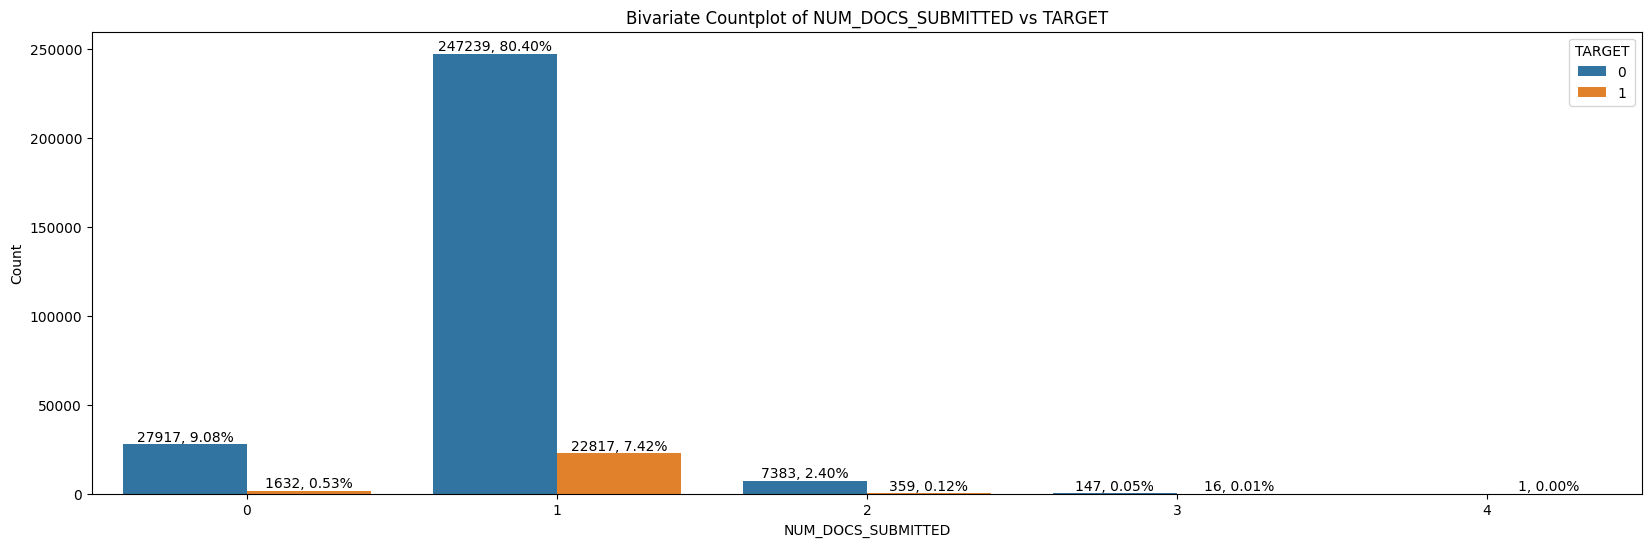

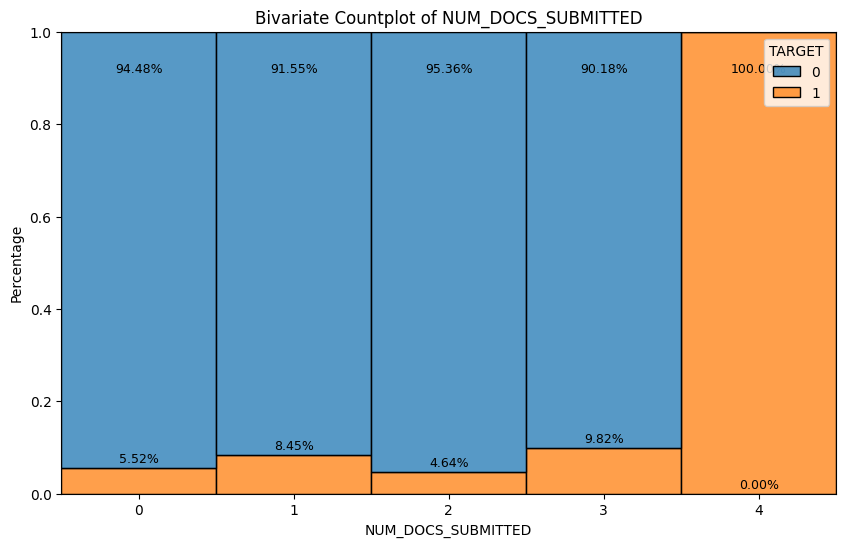

In [77]:
bivariate(curr_df, 'NUM_DOCS_SUBMITTED')

From the above 2 plots for NUM_DOCS_SUBMITTED, 
    
    - Clients that submit 3 documents have the highest default percentage at 9.82% ( 4 or more docs can be ignore due to only 1 data point)
    - Most clients submit 1 document which has a high 8.45% default rate.
    - Clients that submit 2 documents have the least chance of having payment issues.

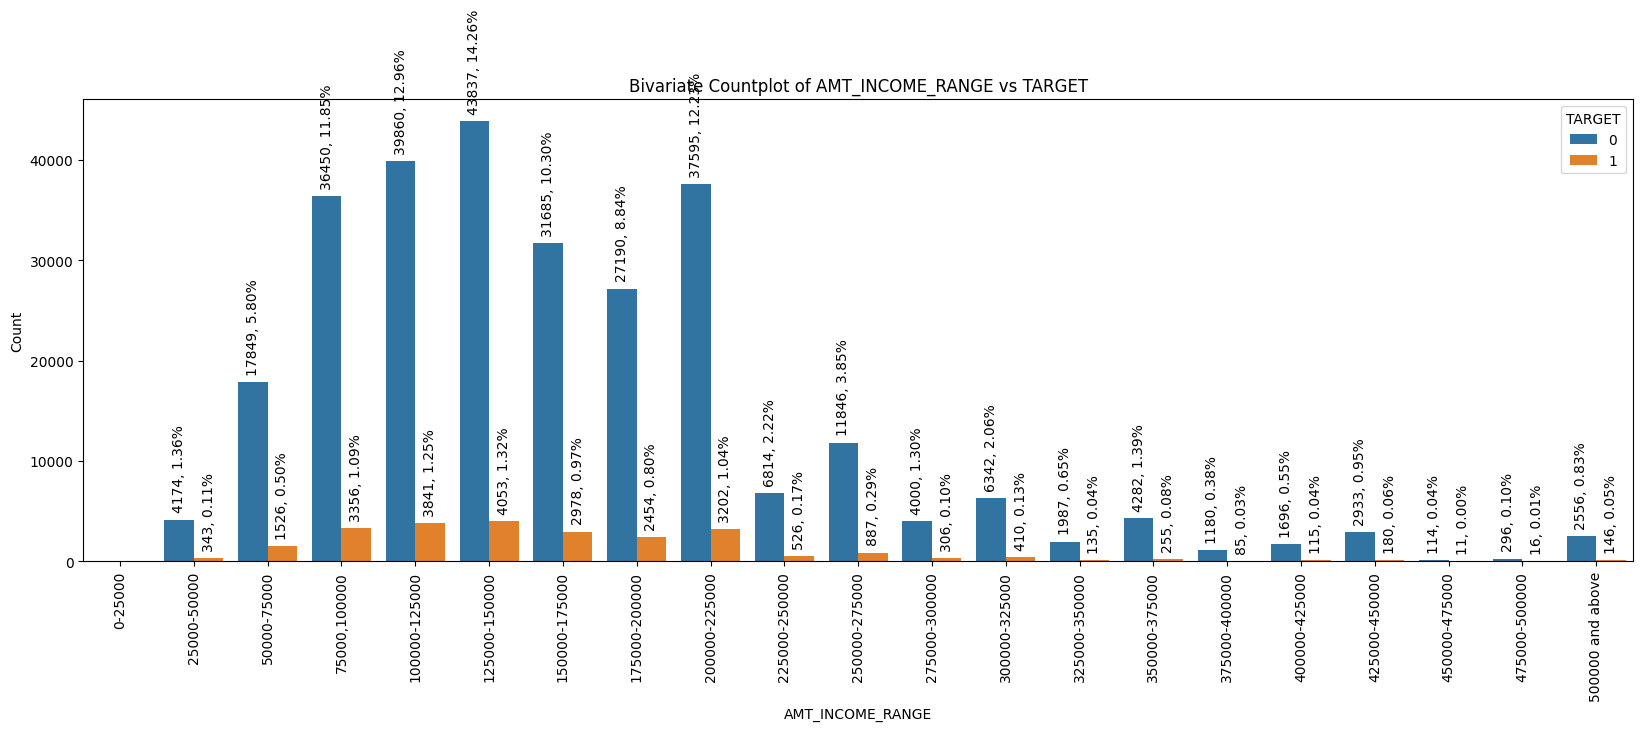

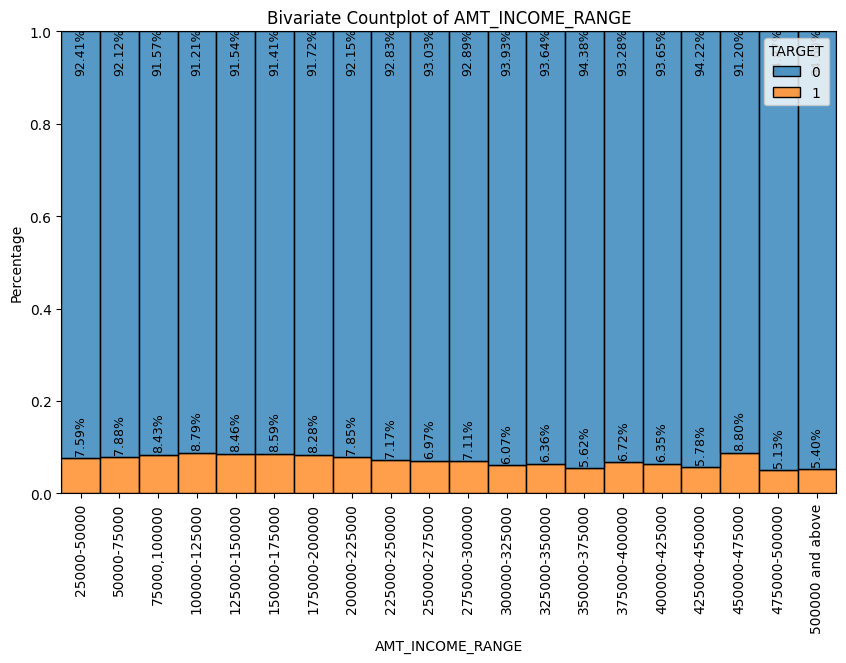

In [78]:
bivariate(curr_df, 'AMT_INCOME_RANGE',rotate=True)

From the above 2 plots for AMT_INCOME_RANGE, 
    
    - Most clients have an income between 50k and 225k
    - Clients with income of 450k to 475k have the highest chance of default at 8.8% followed closely by those with income of 100k to 125k.
    - Clients with income more than 475k have the least default possibility.

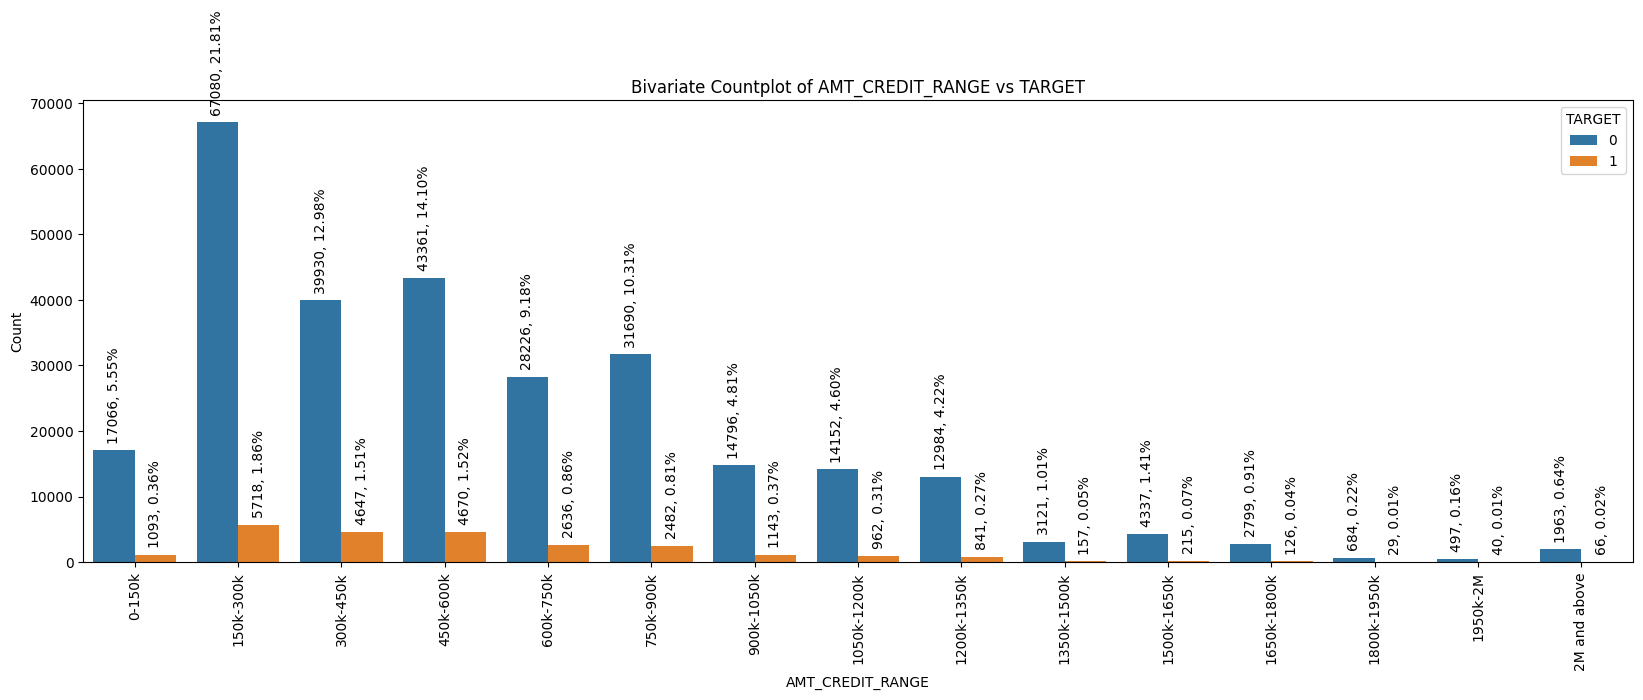

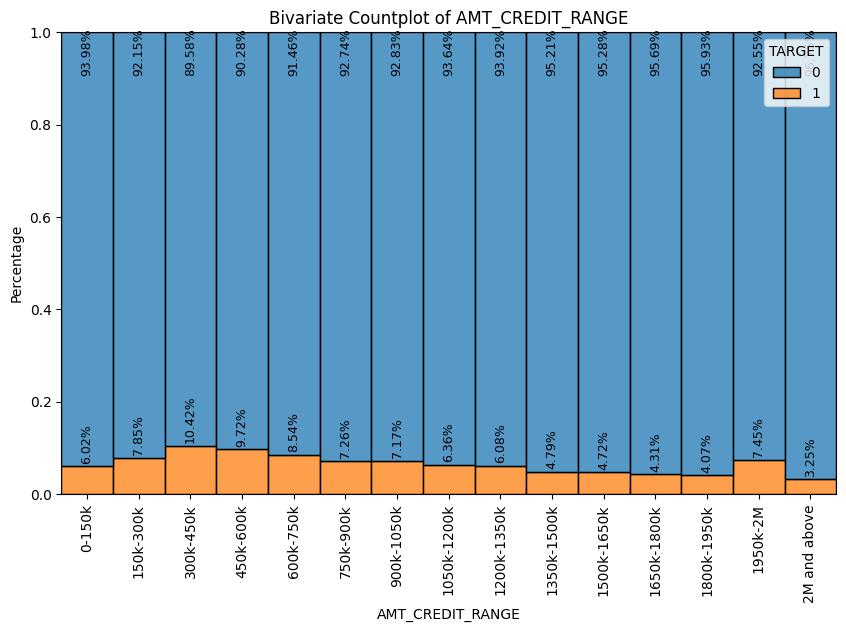

In [79]:
bivariate(curr_df, 'AMT_CREDIT_RANGE',rotate=True)

From the above 2 plots for AMT_CREDIT_RANGE, 
    
    - Most clients have a credit of 150k-300k 
    - Clients with credit of 300k-450k have the highest chance of default at 10.42% followed closely by those with credit of 450k-600k.
    - There is spike of defaulters at 1.95M to 2M to 7.45%, though the number of clients is small
    - In general, the higher the amount, the less chance of default

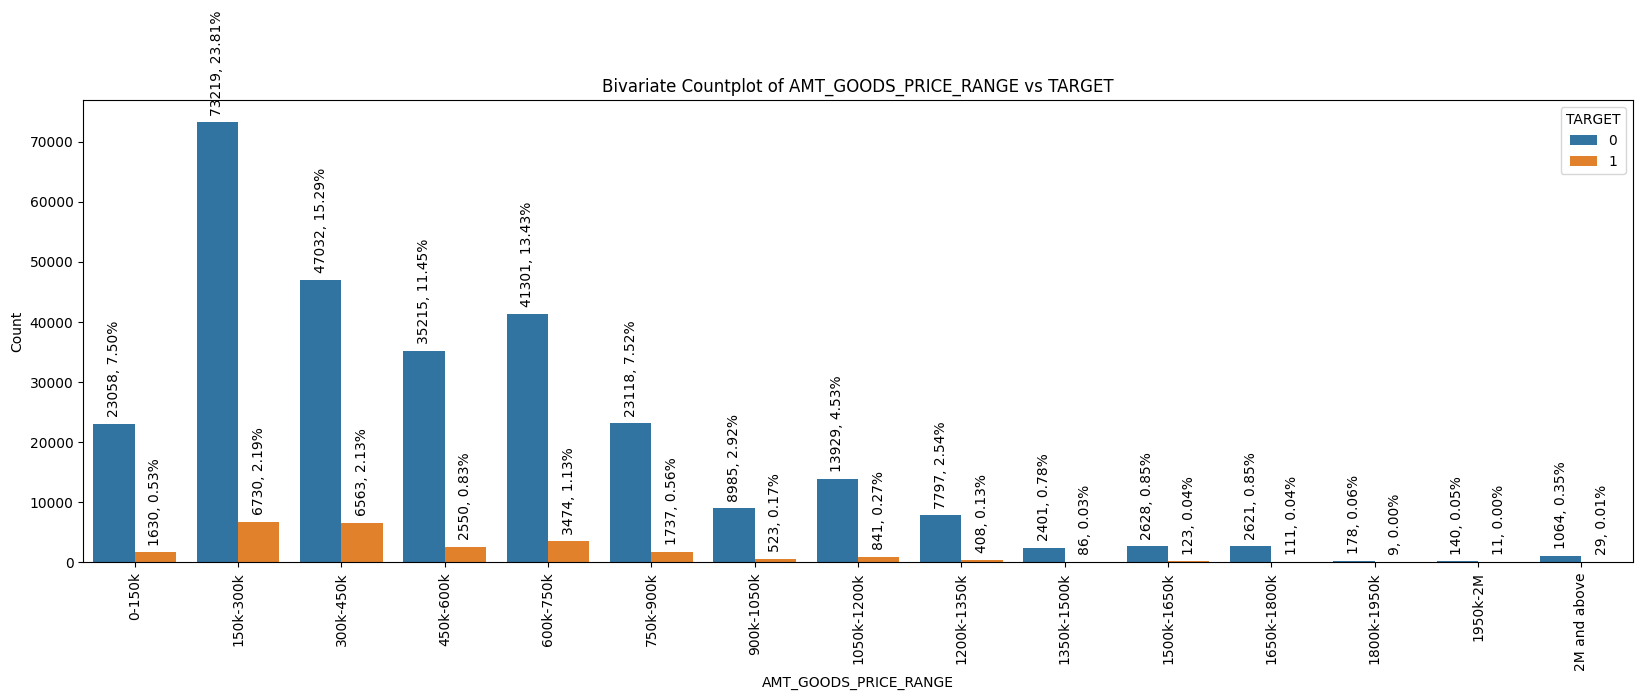

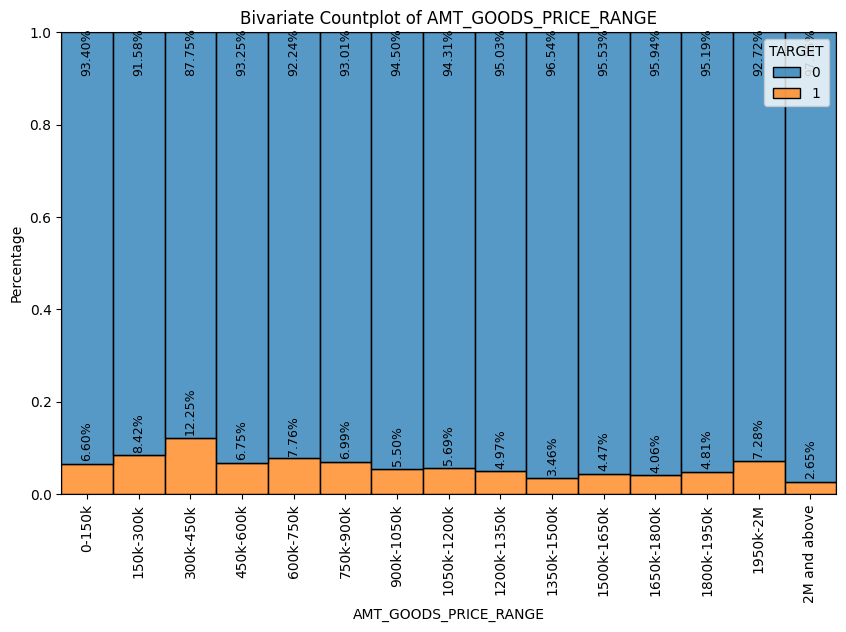

In [80]:
bivariate(curr_df, 'AMT_GOODS_PRICE_RANGE',rotate=True)

From the above 2 plots for AMT_GOODS_PRICE_RANGE, 
    
    - Most goods are at the 150k-300k range 
    - clinet that pruchase goods that are 300k-450k range have the highest chance of default at 10.42% followed closely by 150k-300k range.
    - There is spike of defaulters at 1.95M to 2M to 7.45%, though the number of clients is small.
    - 900k to 1.95M have a lower default rate while 2M and above has the lowest.

In [81]:
curr_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0      100002       1         Cash loans           M            N  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0               Y           No          202500.0    406597.5      24700.5  \
1               N           No          270000.0   1293502.5      35698.5   
2               Y           No           67500.0    135000.0       6750.0   
3               Y           No          135000.0    312682.5      29686.5   
4               Y           No          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE   
0         351000.0   Unaccompanied          Working  \
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE   
0  Secondary / secondary special  Single / not married  House / apartment  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION   
0                    0.018801        9461            637             3648.0  \
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL   
0             2120               1                0           1           0  \
1              291               1                0           1           0   
2             2531               1                1           1           0   
3             2437               1                0           0           0   
4             3458               1                0           0           0   

  OCCUPATION_TYPE CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY   
0        Laborers             1.0                            2  \
1      Core staff             2.0                            1   
2        Laborers             1.0                            2   
3        Laborers             2.0                            2   
4      Core staff             1.0                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY   
0                  WEDNESDAY                       10                       0  \
1                     MONDAY                       11                       0   
2                     MONDAY                        9                       0   
3                  WEDNESDAY                       17                       0   
4                   THURSDAY                       11                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE   
0                       0                        0  Business Entity Type 3  \
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   

   EXT_SOURCE_2  EXT_SOURCE_

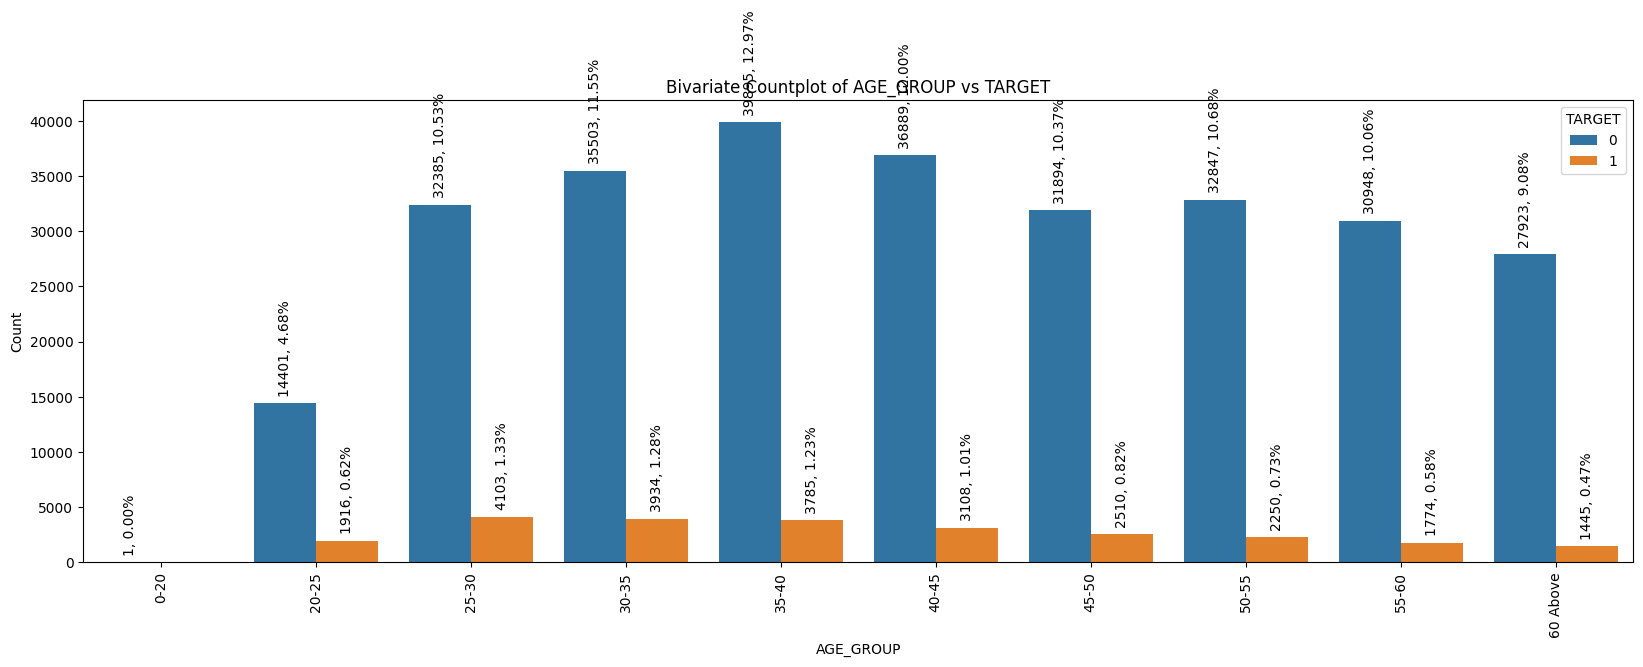

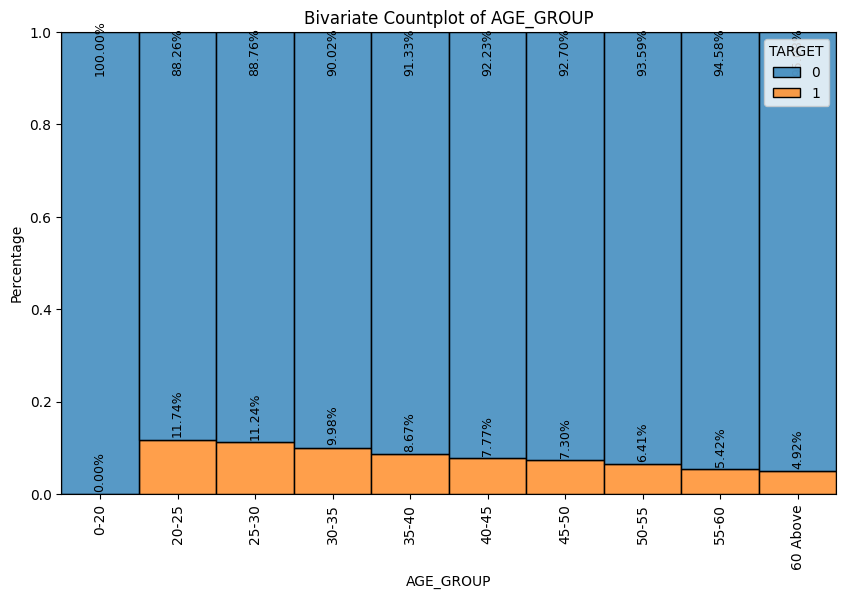

In [82]:
bivariate(curr_df, 'AGE_GROUP',rotate=True)

From the above 2 plots for AGE_GROUP, 
    
    - As age increases, the percentage of default decreases.

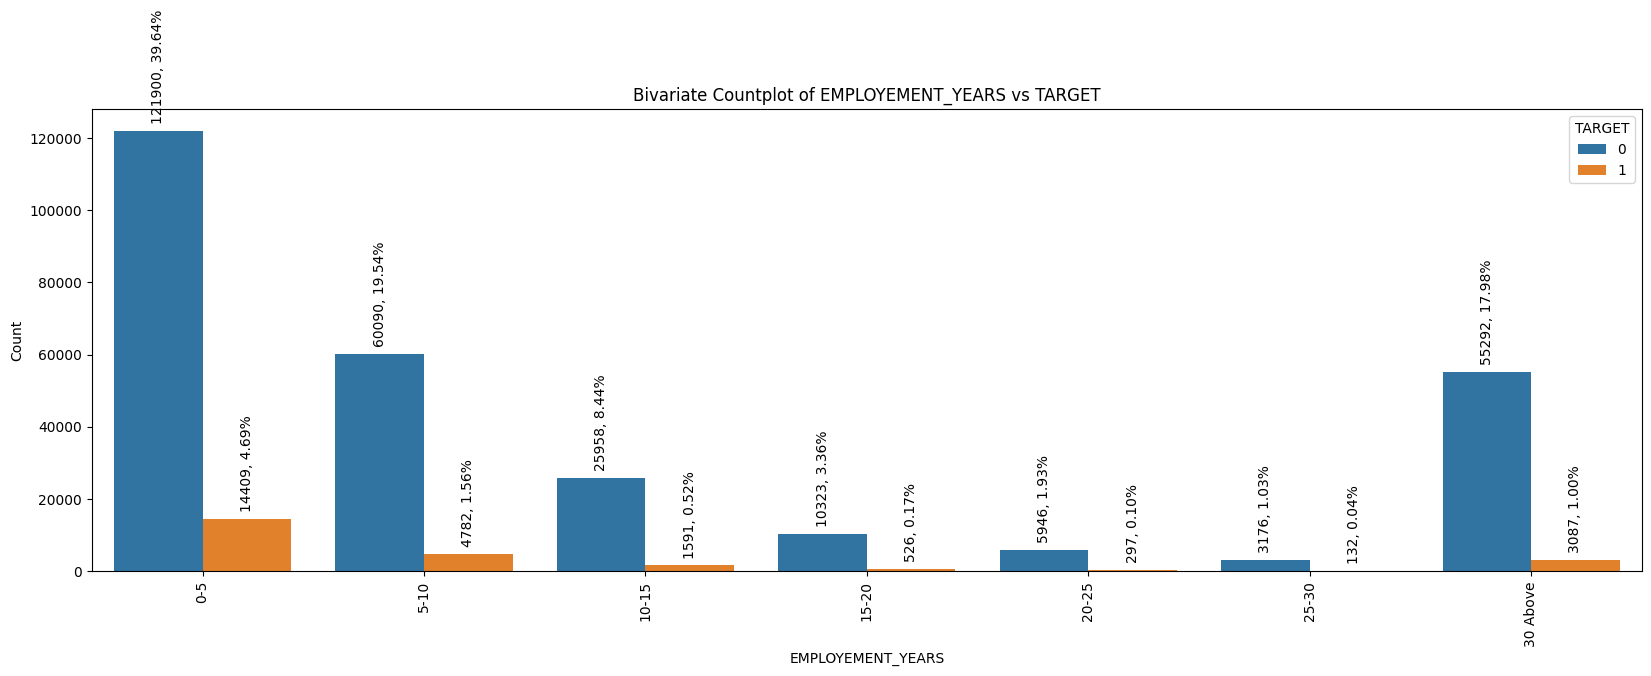

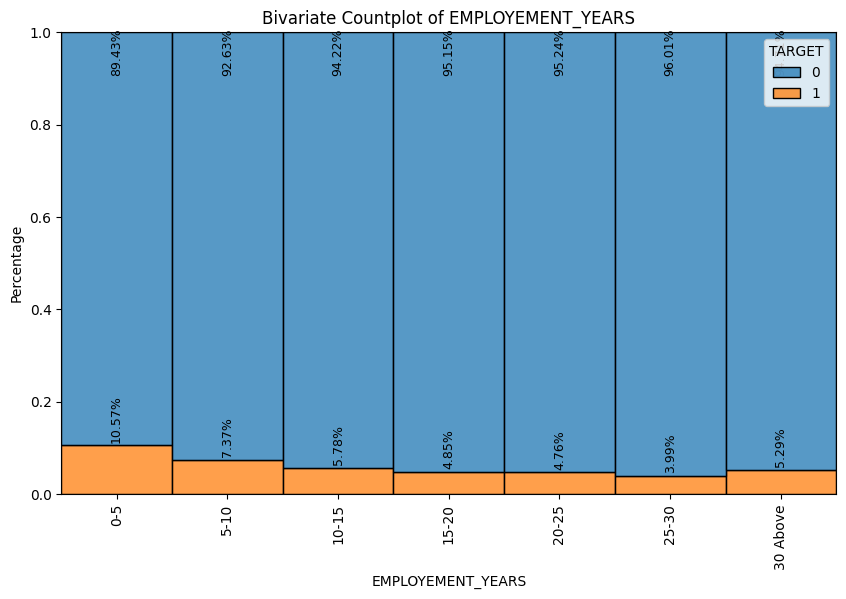

In [83]:
bivariate(curr_df, 'EMPLOYEMENT_YEARS',rotate=True)

From the above 2 plots for EMPLOYEMENT_YEARS, 
    
    - Most clients have been employed for less than 5 years which also have the highest default rate
    - Clients that have been employed for 25-to years are least likely to have payment issues.

### Multivariate

In [85]:
curr_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0      100002       1         Cash loans           M            N  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0               Y           No          202500.0    406597.5      24700.5  \
1               N           No          270000.0   1293502.5      35698.5   
2               Y           No           67500.0    135000.0       6750.0   
3               Y           No          135000.0    312682.5      29686.5   
4               Y           No          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE   
0         351000.0   Unaccompanied          Working  \
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE   
0  Secondary / secondary special  Single / not married  House / apartment  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION   
0                    0.018801        9461            637             3648.0  \
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL   
0             2120               1                0           1           0  \
1              291               1                0           1           0   
2             2531               1                1           1           0   
3             2437               1                0           0           0   
4             3458               1                0           0           0   

  OCCUPATION_TYPE CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY   
0        Laborers             1.0                            2  \
1      Core staff             2.0                            1   
2        Laborers             1.0                            2   
3        Laborers             2.0                            2   
4      Core staff             1.0                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY   
0                  WEDNESDAY                       10                       0  \
1                     MONDAY                       11                       0   
2                     MONDAY                        9                       0   
3                  WEDNESDAY                       17                       0   
4                   THURSDAY                       11                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE   
0                       0                        0  Business Entity Type 3  \
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   

   EXT_SOURCE_2  EXT_SOURCE_

In [86]:
def multi_bar(feature,y,hue='TARGET',df=curr_df,rotate=False):
    plt.figure(figsize=(20, 6))
    ax = sns.barplot(x=feature, y=y, hue=hue, data=df)
    plt.title(f'Multivariate Barplot of {feature} vs {y}')
    plt.xlabel(feature)
    plt.ylabel(y)
    plt.legend(title=hue)
    
    if rotate:
        plt.xticks(rotation=90) 

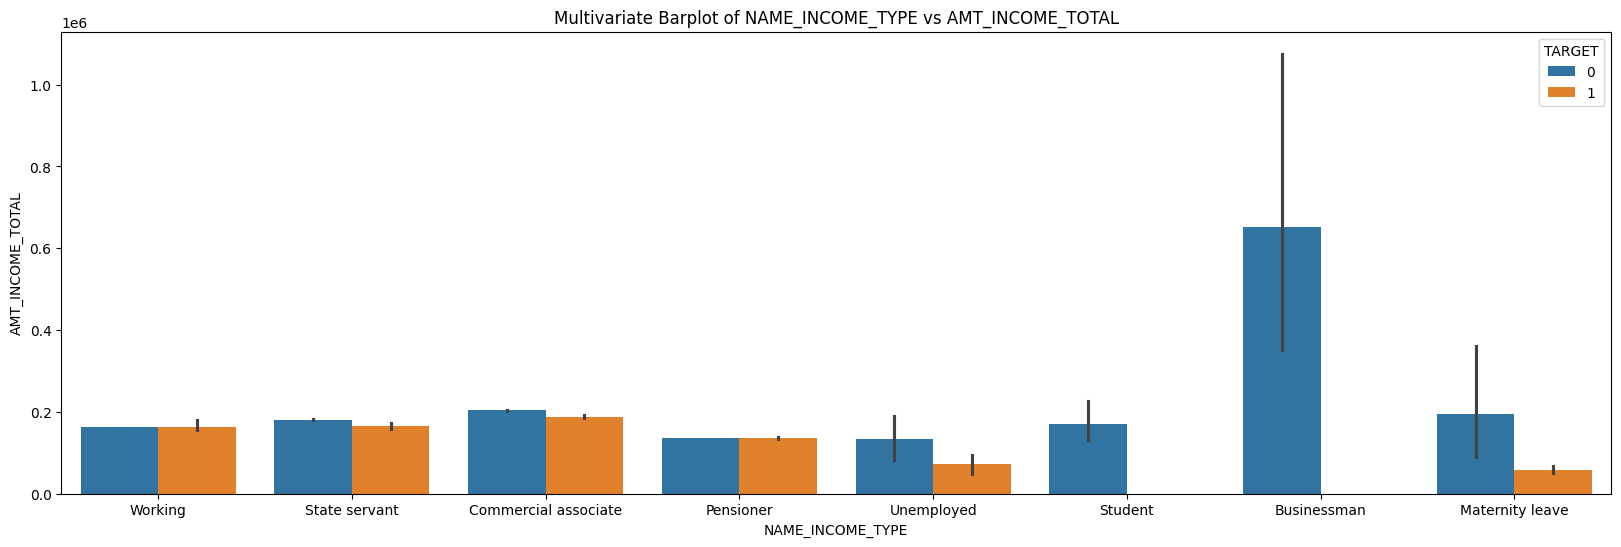

In [87]:
multi_bar('NAME_INCOME_TYPE','AMT_INCOME_TOTAL')

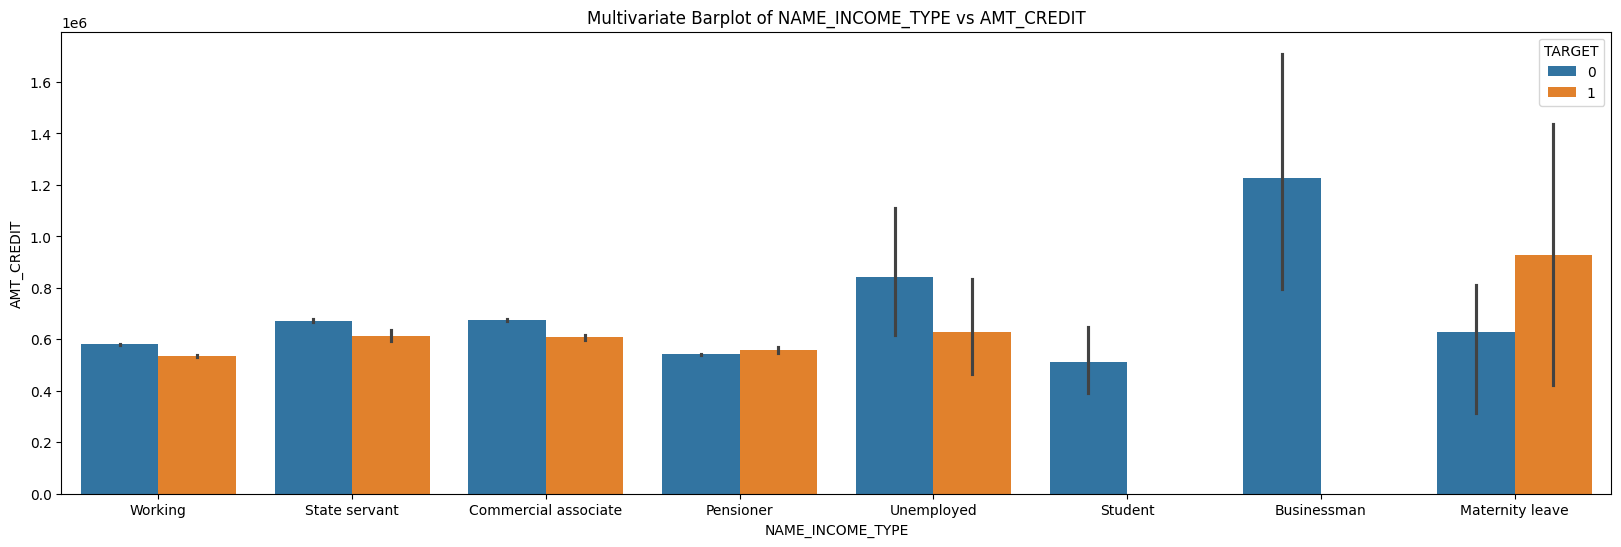

In [88]:
multi_bar('NAME_INCOME_TYPE','AMT_CREDIT')

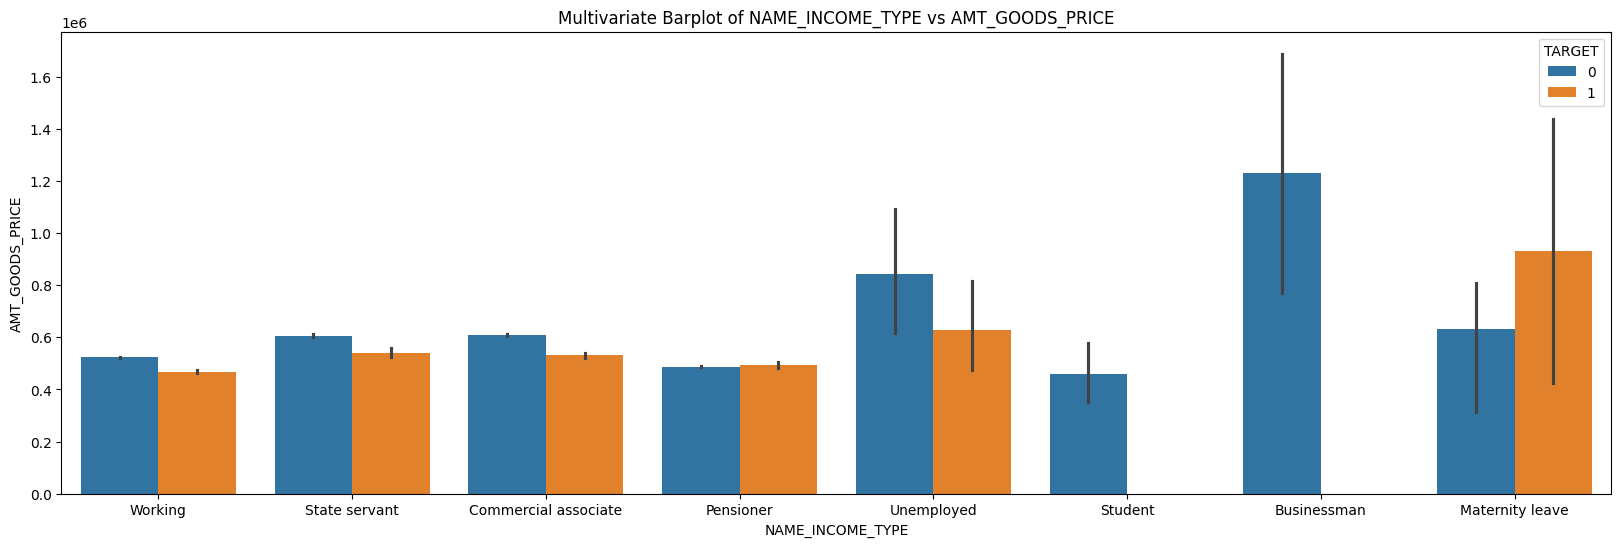

In [89]:
multi_bar('NAME_INCOME_TYPE','AMT_GOODS_PRICE')

From the above 3 plots

    - Businessman have the highest income and also take the highest credit on average
    - Clients on maternity leave with low income on average and high good's value have the highest default credit amount.

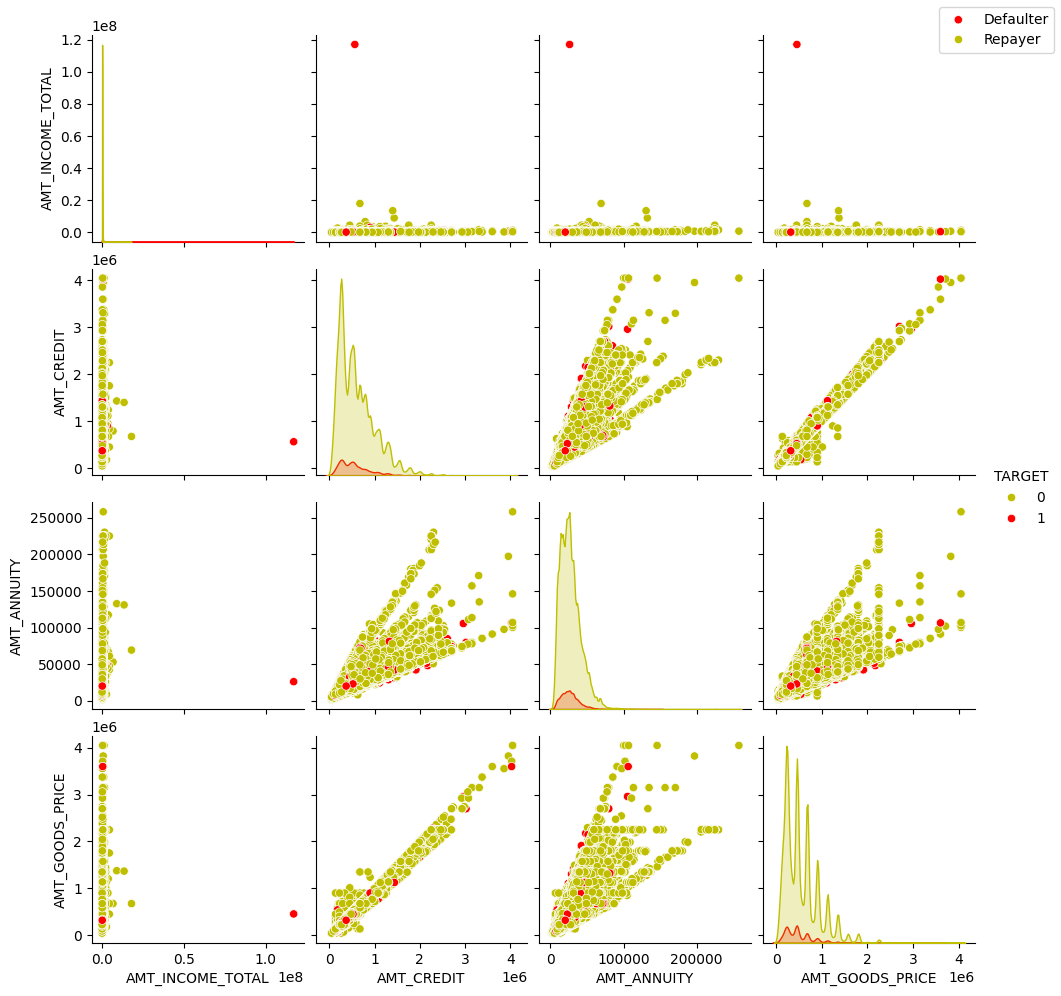

In [90]:
amount = curr_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(amount,hue="TARGET",palette=["y","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

From the pairplot

    - We can see that AMT_GOODS_PRICE and AMT_CREDIT have a positive linear relationship
    - There are only a few defaults once the goods value is more than 1M

In [93]:
Defaulter_df = curr_df[curr_df['TARGET']==1]
Repayer_df = curr_df[curr_df['TARGET']==0]

In [104]:
corr_Defaulter = Defaulter_df.corr(numeric_only=True)
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)


VAR1                    VAR2  Correlation
820           YEARS_EMPLOYED           DAYS_EMPLOYED     1.000000
148          AMT_GOODS_PRICE              AMT_CREDIT     0.983108
569  LIVE_CITY_NOT_WORK_CITY  REG_CITY_NOT_WORK_CITY     0.778540
149          AMT_GOODS_PRICE             AMT_ANNUITY     0.752878
119              AMT_ANNUITY              AMT_CREDIT     0.752195
837           YEARS_EMPLOYED         FLAG_DOCUMENT_6     0.617646
733          FLAG_DOCUMENT_6           DAYS_EMPLOYED     0.617646
239            DAYS_EMPLOYED              DAYS_BIRTH     0.582185
819           YEARS_EMPLOYED              DAYS_BIRTH     0.582185
539   REG_CITY_NOT_WORK_CITY  REG_CITY_NOT_LIVE_CITY     0.472052

In [105]:
corr_df_Defaulter.tail(10)

VAR1                         VAR2  Correlation
835               YEARS_EMPLOYED              FLAG_DOCUMENT_3    -0.272169
675              FLAG_DOCUMENT_3                DAYS_EMPLOYED    -0.272169
479      HOUR_APPR_PROCESS_START  REGION_RATING_CLIENT_W_CITY    -0.275703
441  REGION_RATING_CLIENT_W_CITY   REGION_POPULATION_RELATIVE    -0.446977
748              FLAG_DOCUMENT_6              FLAG_DOCUMENT_3    -0.475807
777              FLAG_DOCUMENT_8              FLAG_DOCUMENT_3    -0.528927
326               FLAG_EMP_PHONE                   DAYS_BIRTH    -0.578519
736              FLAG_DOCUMENT_6               FLAG_EMP_PHONE    -0.617421
327               FLAG_EMP_PHONE                DAYS_EMPLOYED    -0.999705
823               YEARS_EMPLOYED               FLAG_EMP_PHONE    -0.999705

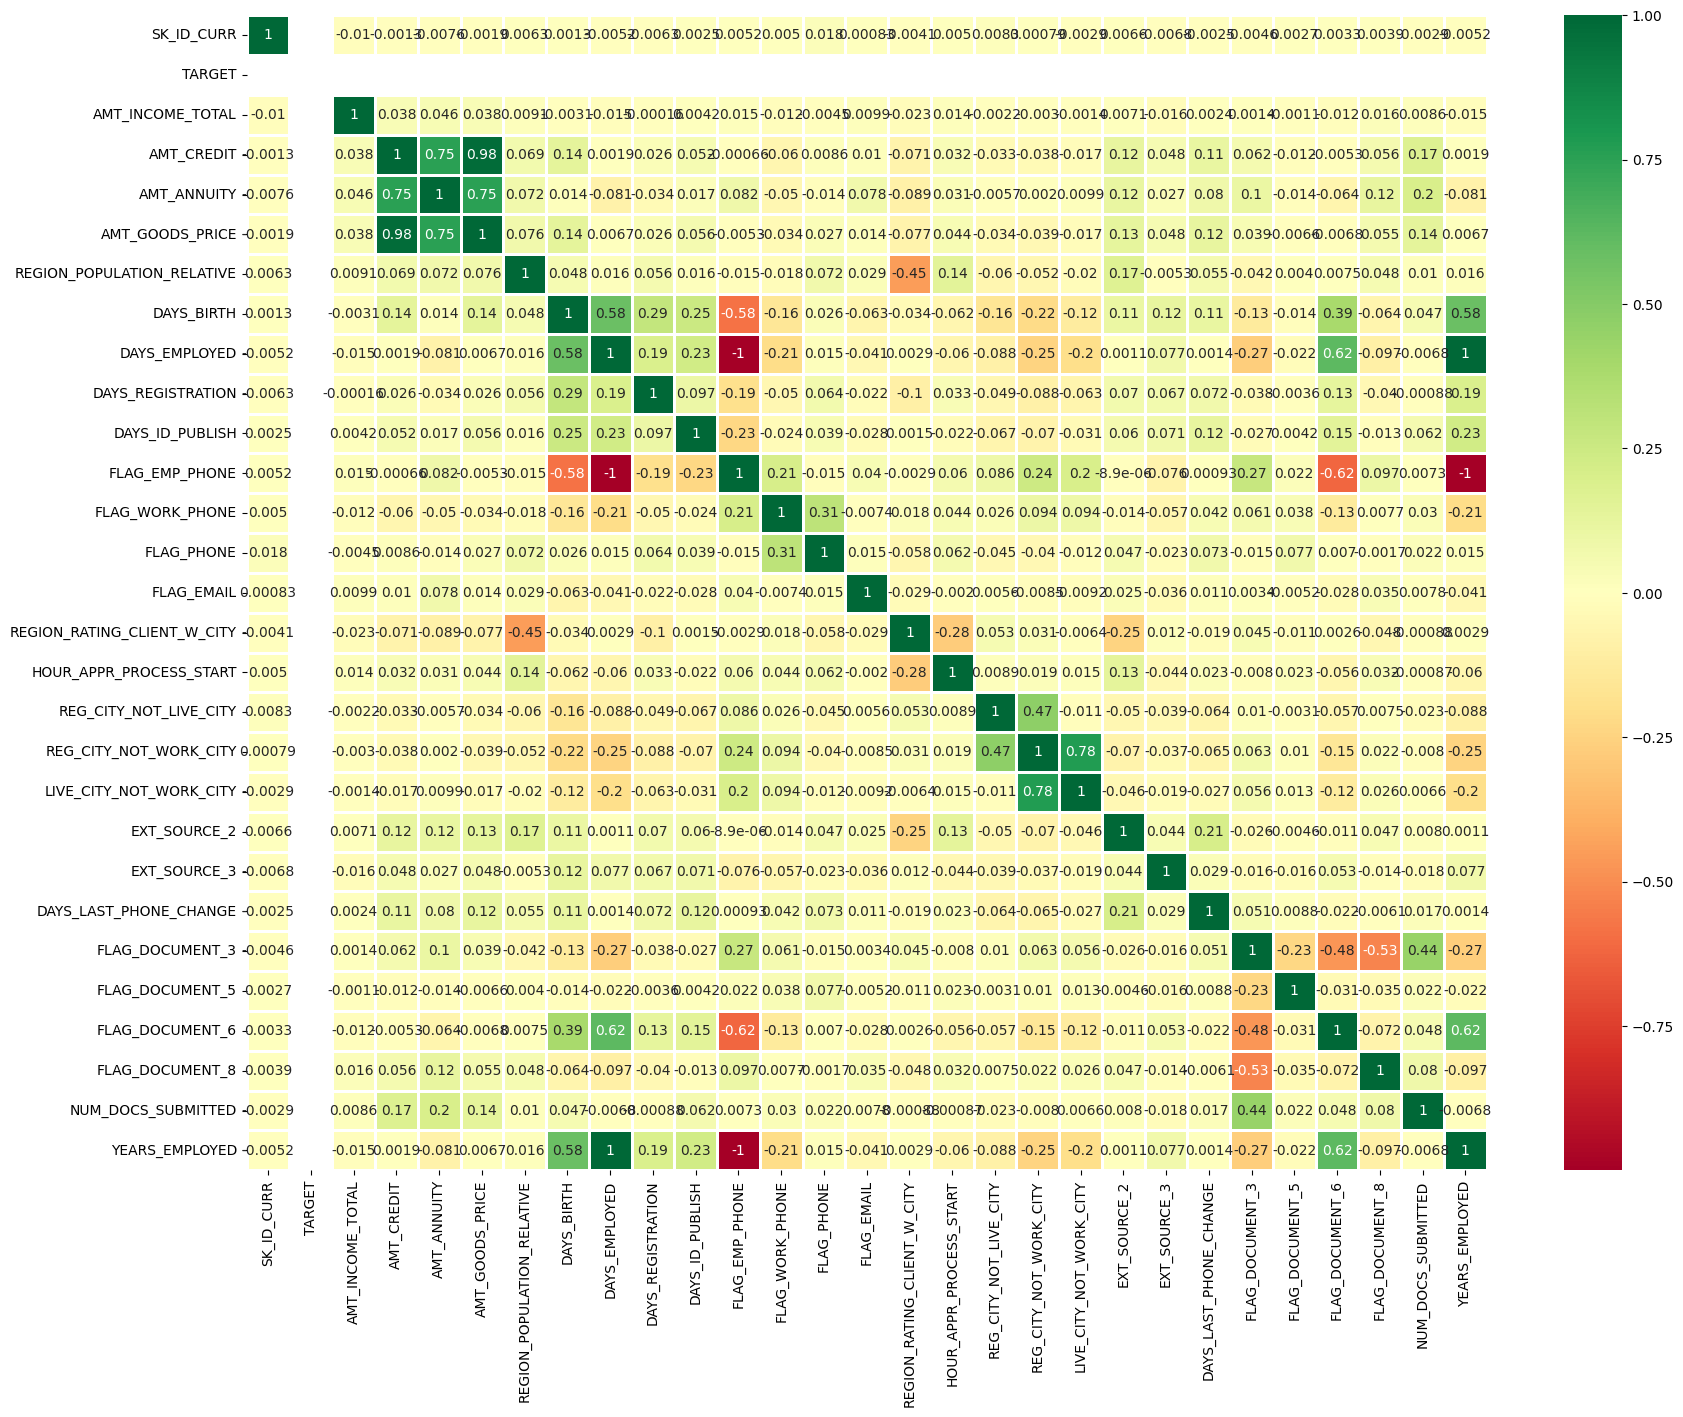

In [102]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Defaulter_df.corr(numeric_only=True), cmap="RdYlGn",annot=True,linewidth =1)

Inferences:

1. Credit amount is highly correlated with:
  - Goods Price Amount
  - Loan Annuity
  - Total Income
2. Document 6 is highly corelated to how long a client is employed
3. Years employed is negatively related to whether they provide work phone

In [134]:
corr_repayer = Repayer_df.corr(numeric_only=True)
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

VAR1                    VAR2  Correlation
820           YEARS_EMPLOYED           DAYS_EMPLOYED     1.000000
148          AMT_GOODS_PRICE              AMT_CREDIT     0.987253
569  LIVE_CITY_NOT_WORK_CITY  REG_CITY_NOT_WORK_CITY     0.830381
149          AMT_GOODS_PRICE             AMT_ANNUITY     0.776848
119              AMT_ANNUITY              AMT_CREDIT     0.771302
239            DAYS_EMPLOYED              DAYS_BIRTH     0.626114
819           YEARS_EMPLOYED              DAYS_BIRTH     0.626114
733          FLAG_DOCUMENT_6           DAYS_EMPLOYED     0.596277
837           YEARS_EMPLOYED         FLAG_DOCUMENT_6     0.596277
806       NUM_DOCS_SUBMITTED         FLAG_DOCUMENT_3     0.452107

In [135]:
corr_df_repayer.tail(10)

VAR1                         VAR2  Correlation
479      HOUR_APPR_PROCESS_START  REGION_RATING_CLIENT_W_CITY    -0.262874
329               FLAG_EMP_PHONE              DAYS_ID_PUBLISH    -0.275468
595                 EXT_SOURCE_2  REGION_RATING_CLIENT_W_CITY    -0.285968
777              FLAG_DOCUMENT_8              FLAG_DOCUMENT_3    -0.461071
748              FLAG_DOCUMENT_6              FLAG_DOCUMENT_3    -0.486422
441  REGION_RATING_CLIENT_W_CITY   REGION_POPULATION_RELATIVE    -0.537301
736              FLAG_DOCUMENT_6               FLAG_EMP_PHONE    -0.596060
326               FLAG_EMP_PHONE                   DAYS_BIRTH    -0.622073
823               YEARS_EMPLOYED               FLAG_EMP_PHONE    -0.999756
327               FLAG_EMP_PHONE                DAYS_EMPLOYED    -0.999756

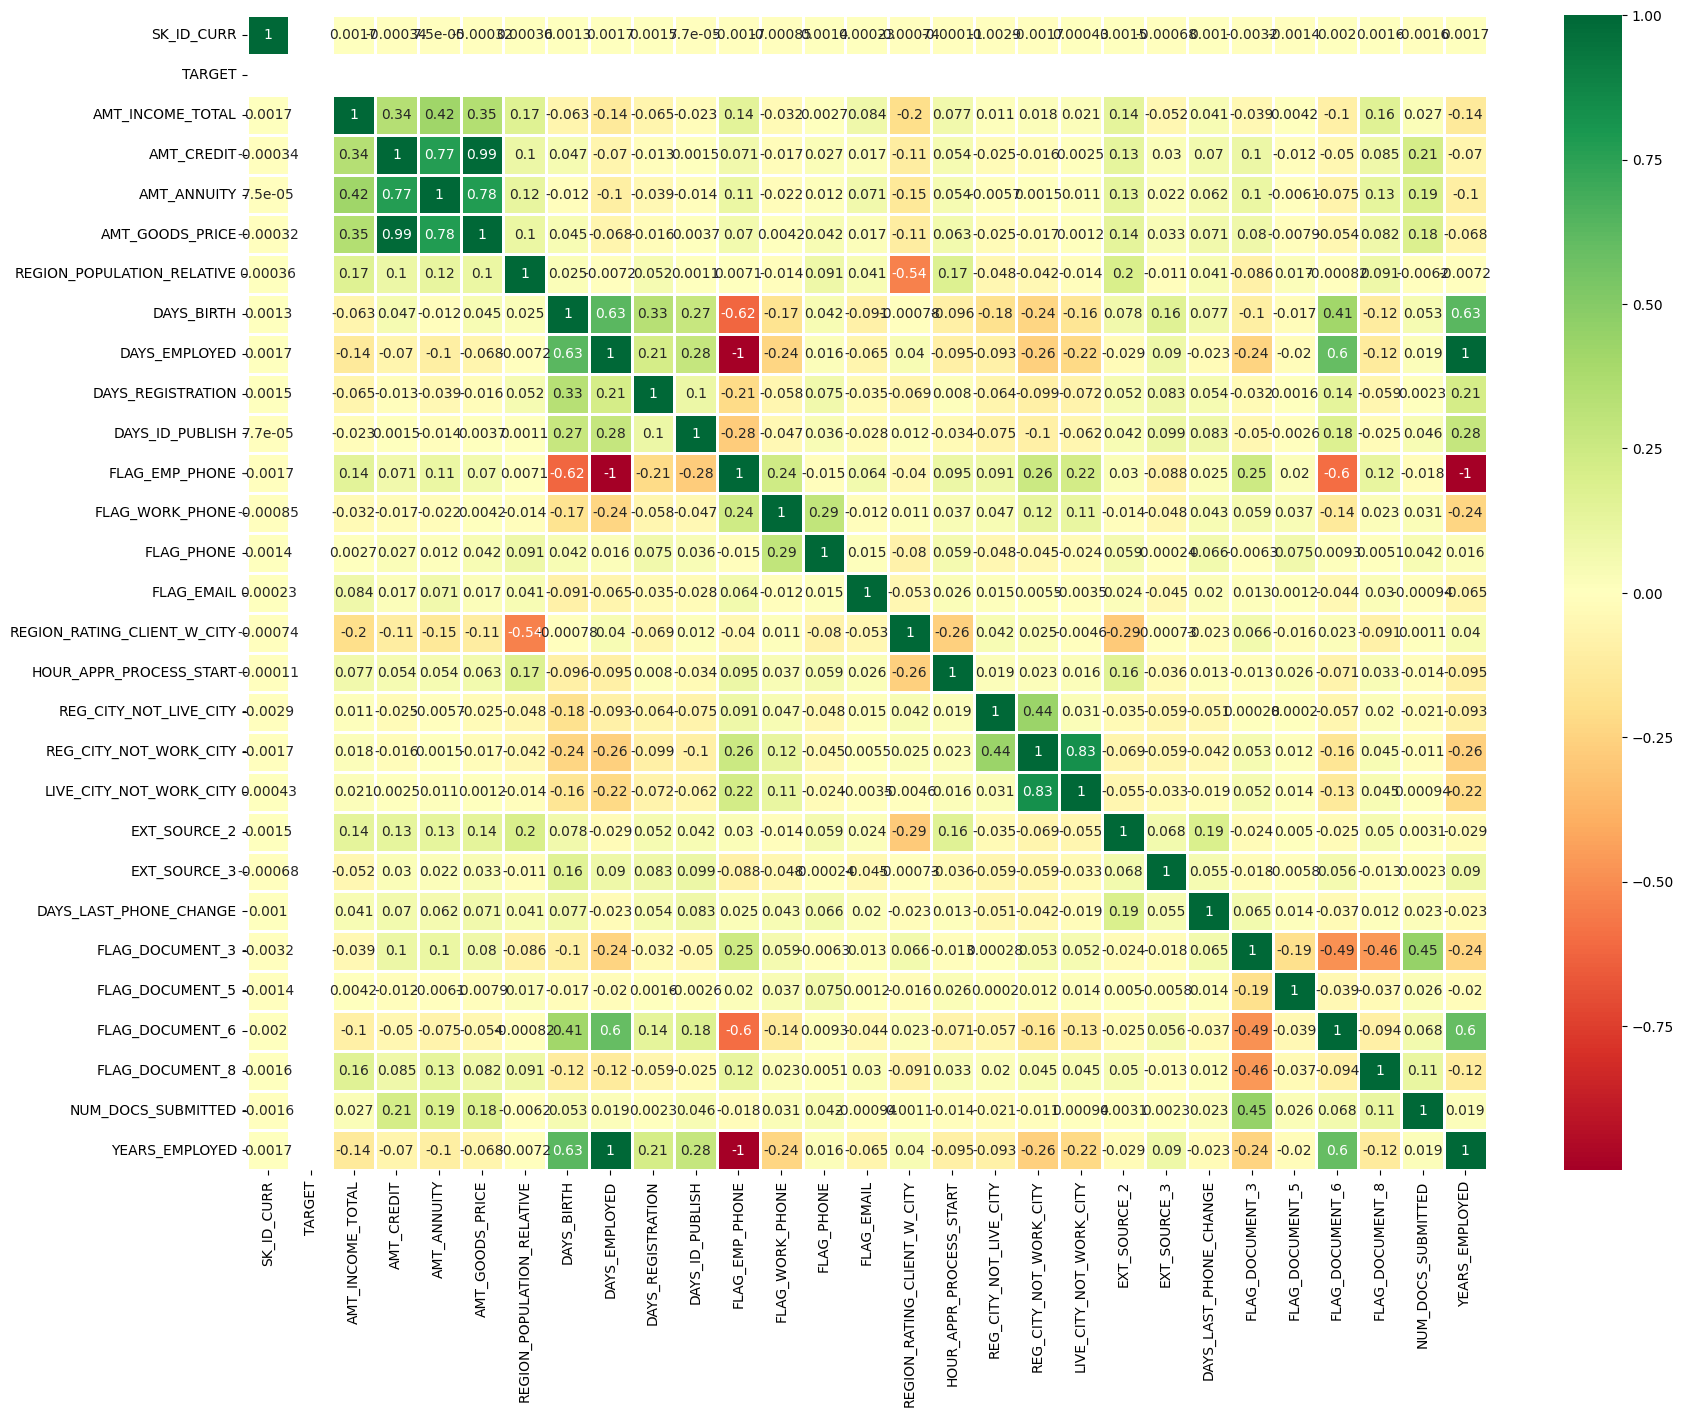

In [138]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Repayer_df.corr(numeric_only=True), cmap="RdYlGn",annot=True,linewidth =1)

Inferences:

    Credit amount is highly correlated with good price amount which is same as repayers.
    Loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77).
    We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).

### Previous Application

In [139]:
null_percentage = prev_df[prev_df.columns[prev_df.isnull().any()]].isnull().sum()/prev_df.shape[0]*100
null_percentage

AMT_ANNUITY                  22.286665
AMT_CREDIT                    0.000060
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [140]:
prev_df.drop(list(null_percentage[null_percentage>50].index),axis=1,inplace=True)
prev_df.isnull().sum()/len(prev_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [150]:
prev_df['AMT_GOODS_PRICE'].fillna(prev_df['AMT_GOODS_PRICE'].mode()[0], inplace=True)
prev_df['AMT_ANNUITY'].fillna(prev_df['AMT_ANNUITY'].median(),inplace = True)
prev_df["NAME_TYPE_SUITE"] = prev_df["NAME_TYPE_SUITE"].fillna("NA")



In [156]:
prev_df.loc[prev_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Series([], Name: count, dtype: int64)

In [152]:
prev_df['CNT_PAYMENT'].fillna(0,inplace = True)


In [153]:
days_column = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

prev_df[days_column].describe() 

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE   
count   1.670214e+06       997149.000000   997149.000000  \
mean    8.806797e+02       342340.056543    15949.224065   
std     7.790997e+02        88413.495220    72007.270877   
min     1.000000e+00            2.000000        2.000000   
25%     2.800000e+02       365243.000000      475.000000   
50%     5.810000e+02       365243.000000      921.000000   
75%     1.300000e+03       365243.000000     1825.000000   
max     2.922000e+03       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
count              997149.000000  997149.000000     997149.000000  
mean                35163.363265   78152.730207      83505.775017  
std                106405.950190  148833.342466     152484.418802  
min                     0.000000       2.000000          2.000000  
25%                   257.000000     455.000000        447.000000  
50%                   741.000000    1155.000000       1171.000000  
75%                  1735.000000    2418.000000       2501.000000  
max                365243.000000  365243.000000     365243.000000

In [154]:
prev_df[days_column] = abs(prev_df[days_column])


In [155]:
irr = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

prev_df.drop(irr,axis =1, inplace = True)

## Merged Analysis

In [157]:
merged_df = pd.merge(curr_df,prev_df, how='inner', on='SK_ID_CURR')
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR   
0      100002       1           Cash loans           M            N  \
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x   
0               Y           No          202500.0      406597.5        24700.5  \
1               N           No          270000.0     1293502.5        35698.5   
2               N           No          270000.0     1293502.5        35698.5   
3               N           No          270000.0     1293502.5        35698.5   
4               Y           No           67500.0      135000.0         6750.0   

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE   
0           351000.0     Unaccompanied          Working  \
1          1129500.0            Family    State servant   
2          1129500.0            Family    State servant   
3          1129500.0            Family    State servant   
4           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE   
0  Secondary / secondary special  Single / not married  House / apartment  \
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION   
0                    0.018801        9461            637             3648.0  \
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL   
0             2120               1                0           1           0  \
1              291               1                0           1           0   
2              291               1                0           1           0   
3              291               1                0           1           0   
4             2531               1                1           1           0   

  OCCUPATION_TYPE CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY   
0        Laborers             1.0                            2  \
1      Core staff             2.0                            1   
2      Core staff             2.0                            1   
3      Core staff             2.0                            1   
4        Laborers             1.0                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY   
0                  WEDNESDAY                       10                       0  \
1                     MONDAY                       11                       0   
2                     MONDAY                       11                       0   
3                     MONDAY                       11                       0   
4                     MONDAY                        9                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE   
0                       0                        0  Business Entity Type 3  \
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4                       0                      

In [ ]:
# Split into 2 df
# Repayers
L0 = merged_df[merged_df['TARGET']==0] 
# Defaulters
L1 = merged_df[merged_df['TARGET']==1] 

TARGET                        0          1
NAME_CONTRACT_STATUS                      
Approved              92.411345   7.588655
Canceled              90.826431   9.173569
Refused               88.003586  11.996414
Unused offer          91.748276   8.251724


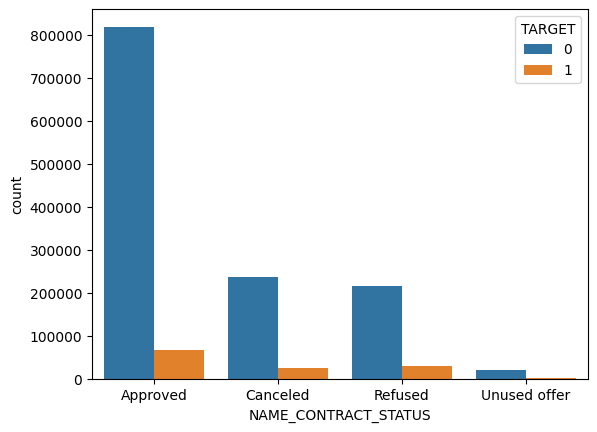

In [172]:
Temp = merged_df.groupby(['NAME_CONTRACT_STATUS', 'TARGET']).size().unstack()
sns.countplot(x=merged_df['NAME_CONTRACT_STATUS'],hue=merged_df['TARGET'])
percentage = Temp.div(Temp.sum(axis=1), axis=0) * 100

print(percentage)

    90% of the previously cancelled client have actually repayed the loan. Revising the interest rates would increase business opportunity for these clients
    
    88% of the clients who have been previously refused a loan has payed back the loan in current case.
    
    Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.

## Conclusion

#### Decisive Factor whether an applicant will be Defaulter:

1. CODE_GENDER
    - Male applicants are more likely to default
2. NAME_TYPE_SUITE
    - Those accompanied by Other_B
3. NAME_INCOME_TYPE
    - Those who are unemployed or on maternity leave
4. NAME_EDUCATION_TYPE
    - Those who have lower secondary education only
5. NAME_FAMILY_STATUS
    - Those who are Single or in Civil Marriage
6. NAME_HOUSING_TYPE
    - Those who have rented apartments or stay with their parents
7. OCCUPATION_TYPE
    - Those who are Low-skill labourers
8. ORGANIZATION_TYPE
    - Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
9. FLAG_DOCUMENT_6
    - Those who dont provide this document have a higher chance of default
10. AMT_INCOME_RANGE
    - Clients with income of 450k to 475k have the highest chance of default at 8.8% followed closely by those with income of 100k to 125k.
11. AMT_CREDIT_RANGE
    - Clients with credit of 300k-450k have the highest chance of default at 10.42% followed closely by those with credit of 450k-600k.
12. AMT_GOODS_PRICE_RANGE
    - Clients that purchase goods that are 300k-450k range have the highest chance of default at 12.25% followed closely by 150k-300k range.
13. AGE_GROUP
    - The younger the client, the higher the chance to default
14. EMPLOYEMENT_YEARS
    - Employed less than 5 years or more than 30 years

#### Decisive Factor whether an applicant will be Repayer:

1. CODE_GENDER
    - Female applicants are more likely to Repay
2. NAME_TYPE_SUITE
    - Those accompanied by their children
3. NAME_INCOME_TYPE
    - Those who are students or businessman
4. NAME_EDUCATION_TYPE
    - Those who have academic degree
5. NAME_FAMILY_STATUS
    - Those who are Widow
6. NAME_HOUSING_TYPE
    - Those who have office apartments House/apartments of their own
7. OCCUPATION_TYPE
    - Those who are Accountants and HR staff
8. ORGANIZATION_TYPE
    - Trade Type 4 and 5, Industry type 8
9. FLAG_DOCUMENT_6
    - Those who provide this document.
10. AMT_INCOME_RANGE
    - Clients with income of more than 475K
11. AMT_CREDIT_RANGE
    - Clients with credit of 1.35M and above
12. AMT_GOODS_PRICE_RANGE
    - Clients that purchase goods that are 2M and above
13. AGE_GROUP
    - The older the client, the less payment issues.
14. EMPLOYEMENT_YEARS
    - Employed for 10 to 30 years